# 1.Basic information
## 1.1 Group information:
|Student ID| Name |
|----------|------|
|23127130|Nguyễn Hữu Anh Trí|
|23127057|Cao Tấn Hoàng Huy| 

## 1.2 Libraries used:


In [1]:
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from collections import defaultdict


# 2.1 Data Collection

## What subject is your data about?
* **Describe the topic, domain, or phenomenon**
    
    The dataset covers **personal health indicators** and their relationship to heart disease. The domain encompasses **healthcare, epidemiology, and public health**. It includes relevant variables such as BMI, smoking habits, alcohol drinking, stroke history, physical health, and mental health status to determine risk factors for heart disease.
* **What real-world context does this represent?**
    
    This data represents the health status of the **adult population in the United States** based on the **2022 annual CDC survey**. It provides a real-world snapshot of public health, highlighting that heart disease is a leading cause of death across most races in the U.S.

## What is the source of your data?
* **Platform name (Kaggle, UCI, etc.) and full URL**
    * **Platform:** Kaggle
    * **URL:** [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
* **Original author(s) or organization**
    The original data source is the **Centers for Disease Control and Prevention (CDC)**. The dataset was curated and uploaded to Kaggle by **Kamil Pytlak**.
* **Publication/collection date**
    The specific files selected for this project are from the **2022 update** (`heart_2022_no_nans.csv` or `heart_2022_with_nans.csv`), representing the **2022 annual survey**.

### Is this data licensed for your use?
* **What license does the dataset have?**
    
    The dataset is licensed under **CC0: Public Domain**.
* **Are you permitted to use it for educational purposes?**
    
    **Yes**, the Public Domain license allows for unrestricted use for educational, research, and commercial purposes.
* **Document any usage restrictions or attribution requirements**
    
    There are **no usage restrictions**. While attribution is not legally required by the license, standard academic practice requires citing the CDC and the Kaggle dataset provider.

### How was this data collected?
* **Collection method (survey, sensors, administrative records, web scraping, etc.)**
    
    The data was collected via **annual telephone surveys** conducted by the **Behavioral Risk Factor Surveillance System (BRFSS)**.
* **Target population and sampling approach**
    
    The target population is **adults (18+) in the United States**. The BRFSS collects data from all 50 states, the District of Columbia, and three U.S. territories. This dataset includes over **400,000** adult interviews.
* **Time period of data collection**
    
    The data corresponds to the **2022** survey period.
* **Any known limitations or biases in collection**
    
    * **Class Imbalance:** The classes are unbalanced (significantly more "No" responses for heart disease than "Yes"), meaning standard model accuracy might be misleading without techniques like undersampling or weighting.
    * **Self-Reporting:** As a telephone survey, the data relies on self-reported information, which can be subject to recall bias.

## Why did you choose this dataset?
* **What interests your group about this topic?**
    
    Heart disease is a critical public health issue and a leading cause of death. We are interested in applying machine learning to see if we can detect patterns in lifestyle and health factors (like high blood pressure, cholesterol, and smoking) that predict a patient's condition.
* **What potential questions or insights could this data provide?**
    
    * Can we accurately predict the likelihood of heart disease based on the 40 selected variables?
    * Which factors (e.g., BMI vs. Smoking) have the most significant effect on heart disease risk?
    * How do machine learning models perform on unbalanced medical data?
    * What is the age group that is most likely to have heart disease across different states?  

## 2.1.1 Dataset download method and instructions

### Libraries requirements:

If you haven't installed the required libraries, run these commands in your terminal or a separate notebook cell:

```bash
pip install kagglehub pandas
```

### Customization option

- **Change the target folder**: Modify the `target_folder` variable to your preferred location
- **Relative vs Absolute paths**: 
  - `"./my_heart_disease_data"` - creates folder in current directory
  - `"../data/heart_disease"` - creates folder in parent directory
  - `"C:/Users/YourName/Documents/heart_data"` - absolute path (Windows)
  - `"/home/username/projects/heart_data"` - absolute path (Linux/Mac)

In [2]:
cache_path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

target_folder = "./my_heart_disease_data"
os.makedirs(target_folder, exist_ok=True)
shutil.copytree(cache_path, target_folder, dirs_exist_ok=True)

print(f"Dataset files are now available in: {target_folder}")
print(os.listdir(target_folder))

Dataset files are now available in: ./my_heart_disease_data
['2020', '2022']


### File structure after download

The dataset has been organized into the following directory structure:

```
[target_folder] (In this case is: my_heart_disease_data)/
├── 2020/
│   └── heart_2020_cleaned.csv
└── 2022/
    ├── heart_2022_no_nans.csv
    └── heart_2022_with_nans.csv
```

### Dataset files description

| File | Description | Use Case |
|------|-------------|----------|
| **`heart_2020_cleaned.csv`** | 2020 CDC survey data, pre-cleaned | Good for historicaldcomparison and baseline analysis |
| **`heart_2022_no_nans.csv`** | 2022 CDC survey data with missing values removed | Ready for immediate analysis, smaller dataset |
| **`heart_2022_with_nans.csv`** | 2022 CDC survey data with original missing values intact | Best for comprehensive analysis and missing data handling strategies |

### 2.1.2 Dataset choosen:

For this project, we are using **`heart_2022_with_nans.csv`** because:
- Contains the most recent data (2022)
- Preserves original data integrity (includes missing values)
- Allows us to implement and demonstrate proper missing data handling techniques
- Provides more comprehensive dataset for analysis

# 2.2 Data Exploration

## 2.2.1 Basic information

In [2]:
# Load the chosen dataset (heart_2022_with_nans.csv)
df = pd.read_csv("my_heart_disease_data/2022/heart_2022_with_nans.csv")

### How many rows does your dataset have?

In [4]:
num_rows = len(df)
print(f"Number of rows: {num_rows:,}")

Number of rows: 445,132


### How many columns does your dataset have?

In [5]:
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 40


### What does each row represent?
- Each rows represents: One individual adult survey respondent from the 2022 CDC BRFSS survey
- Each record contains health indicators and demographics for a single person

### What is the overall size of the dataset? 

In [6]:
dataset_size_cells = df.size
memory_usage_bytes = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage_bytes / (1024 * 1024)

print(f"Dataset dimensions: {num_rows:,} rows × {num_columns} columns")
print(f"Total data points: {dataset_size_cells:,} cells")
print(f"Memory usage: {memory_usage_mb:.2f} MB")

Dataset dimensions: 445,132 rows × 40 columns
Total data points: 17,805,280 cells
Memory usage: 820.56 MB


### What are the column names?

In [ ]:
print("All column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All column names in the dataset:
 1. State
 2. Sex
 3. GeneralHealth
 4. PhysicalHealthDays
 5. MentalHealthDays
 6. LastCheckupTime
 7. PhysicalActivities
 8. SleepHours
 9. RemovedTeeth
10. HadHeartAttack
11. HadAngina
12. HadStroke
13. HadAsthma
14. HadSkinCancer
15. HadCOPD
16. HadDepressiveDisorder
17. HadKidneyDisease
18. HadArthritis
19. HadDiabetes
20. DeafOrHardOfHearing
21. BlindOrVisionDifficulty
22. DifficultyConcentrating
23. DifficultyWalking
24. DifficultyDressingBathing
25. DifficultyErrands
26. SmokerStatus
27. ECigaretteUsage
28. ChestScan
29. RaceEthnicityCategory
30. AgeCategory
31. HeightInMeters
32. WeightInKilograms
33. BMI
34. AlcoholDrinkers
35. HIVTesting
36. FluVaxLast12
37. PneumoVaxEver
38. TetanusLast10Tdap
39. HighRiskLastYear
40. CovidPos


## 2.2.2 Data integrity
<ol>
    <li> Are there any duplicated rows? If yes, how many? 
    <li> Should duplicates be kept or removed? (Justify your decision) 
    <li> Are all rows complete, or are some entirely empty? 
<ol>

### Are there any duplicated rows? If yes, how many?

In [8]:
print(f"Total rows in dataset: {len(df):,}")
print(f"Duplicate rows found: {df.duplicated().sum():,}")
print(f"Percentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Total rows in dataset: 445,132
Duplicate rows found: 157
Percentage of duplicates: 0.04%


### Should duplicates be kept or removed? (Justify your decision) 
&rarr; They should be removed

In [9]:
print(f"\n....Remove duplicates rows")
df = df.drop_duplicates()
print(f"Duplicates removed. New dataset has {len(df):,} rows.")


....Remove duplicates rows
Duplicates removed. New dataset has 444,975 rows.


### Are all rows complete or some entirely empty?

In [10]:
# Check for completely empty rows
print(f"Completely empty rows: {df.isnull().all(axis=1).sum():,}")

missing_per_row = df.isnull().sum(axis=1)
rows_with_missing = (missing_per_row > 0).sum()
percentage_rows_with_missing = (rows_with_missing / len(df)) * 100

print(f"Rows with at least one missing value: {rows_with_missing:,}")
print(f"Percentage of rows with missing data: {percentage_rows_with_missing:.2f}%")

Completely empty rows: 0
Rows with at least one missing value: 198,962
Percentage of rows with missing data: 44.71%


## 2.2.3 Column Inventory 


### What is the meaning/definition of each columns?
We can categorize 40 columns into 7 main groups:
- **Group 1** *Demographics and basic information*:
    - **State**: US State where survey was conducted - Geographic identifier
    - **Sex**: Gender of respondent (Male/Female) - Demographic variable  
    - **AgeCategory**: Age group categories (e.g., 18-24, 25-29, etc.) - Key demographic
    - **RaceEthnicityCategory**: Race and ethnicity classification - Demographic variable

- **Group 2** *Related heart conditions*:
    - **HadHeartAttack**: Whether respondent ever had heart attack - PRIMARY OUTCOME
    - **HadAngina**: History of angina (chest pain) - Related heart condition
    - **HadStroke**: History of stroke - Cardiovascular risk factor

- **Group 3** *Physical health metrics*:
    - **GeneralHealth**: Self-reported overall health status - Key health indicator
    - **PhysicalHealthDays**: Days of poor physical health in past 30 days - Health quality measure
    - **MentalHealthDays**: Days of poor mental health in past 30 days - Mental health indicator
    - **BMI**: Body Mass Index (calculated) - Key obesity/health metric
    - **HeightInMeters**: Height measurement - Used for BMI calculation
    - **WeightInKilograms**: Weight measurement - Used for BMI calculation

- **Group 4** *Chronic conditions*
    - **HadAsthma**: History of asthma - Respiratory condition
    - **HadSkinCancer**: History of skin cancer - Cancer indicator
    - **HadCOPD**: Chronic Obstructive Pulmonary Disease - Respiratory condition
    - **HadDepressiveDisorder**: History of depression - Mental health condition
    - **HadKidneyDisease**: History of kidney disease - Chronic condition
    - **HadArthritis**: History of arthritis - Joint/inflammatory condition
    - **HadDiabetes**: Diabetes status - Major metabolic risk factor

- **Group5** *Disabilities and limitations*:
    - **DeafOrHardOfHearing**: Hearing impairment status - Disability indicator
    - **BlindOrVisionDifficulty**: Vision impairment status - Disability indicator
    - **DifficultyConcentrating**: Cognitive difficulties - Functional limitation
    - **DifficultyWalking**: Mobility limitations - Physical disability
    - **DifficultyDressingBathing**: Self-care limitations - Functional disability
    - **DifficultyErrands**: Difficulty with errands/shopping - Functional limitation

- **Group 6** *Lifestyle and behaviours*
    - **SmokerStatus**: Smoking history/status - Major cardiovascular risk factor
    - **ECigaretteUsage**: Electronic cigarette usage - Modern smoking behavior
    - **AlcoholDrinkers**: Alcohol consumption status - Lifestyle risk factor
    - **PhysicalActivities**: Regular physical activity participation - Protective factor
    - **SleepHours**: Average hours of sleep per day - Lifestyle factor

- **Group 7** *Healthcare and preventions*:
    - **LastCheckupTime**: Time since last medical checkup - Healthcare access indicator
    - **RemovedTeeth**: Number of teeth removed - Oral health/overall health indicator
    - **ChestScan**: Recent chest scan/X-ray - Healthcare utilization
    - **HIVTesting**: HIV testing history - Preventive healthcare behavior
    - **FluVaxLast12**: Flu vaccination in last 12 months - Preventive care
    - **PneumoVaxEver**: Ever received pneumonia vaccine - Preventive care
    - **TetanusLast10Tdap**: Tetanus vaccination status - Preventive care
    - **HighRiskLastYear**: High-risk behavior in last year - Risk assessment
    - **CovidPos**: COVID-19 positive status - Recent health event

### Which columns are relevant to potential analysis? 

- We can have some important columns due to some categories:
    - Relevant heart-disease factors: `HadHeartAttack, HadAngina, HadStroke, HadDiabetes`
    - Key health indicators:  `GeneralHealth, BMI, SmokerStatus, PhysicalActivities`
    - Important demographic: `AgeCategory, Sex, State, RaceEthnicityCategory`
    - Relevant conditions: `HadCOPD, HadKidneyDisease, PhysicalHealthDays`
    - Lifestyle factors: `AlcoholDrinkers, SleepHours, MentalHealthDays, LastCheckupTime`
    - Physical limitations: `DifficultyWalking, DifficultyErrands`
    - Recent pandemic: `CovidPos` 

### Are there any columns that should be dropped? Why? 

| Category | Columns | Reason | Recommendation |
|----------|---------|--------|----------------|
| **Redudant features** | HeightInMeters, WeightInKilograms | BMI is already calculated from these values | DROP - Keep BMI only |
| **Preventive care (Low signal)** | FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap | Vaccination status has weak connection to heart disease | Consider DROPPING - Low predictive value |
| **Highly specific disabilities** | BlindOrVisionDifficulty, DeafOrHardOfHearing, DifficultyDressingBathing | Very specific conditions with indirect heart disease connection | Consider DROPPING - Unless studying comorbidity patterns |
| **Oral health(Indirect)** | RemovedTeeth | While oral health connects to heart disease, removed teeth count is indirect | Consider DROPPING - Indirect indicator |



### 2.2.4 Data types: 

### What is the current data type of each column? 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

### Are there columns with inappropriate data types?  


In [3]:
# Categorize columns by their expected vs actual types
categorical_expected = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

numerical_expected = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters',
    'WeightInKilograms', 'BMI'
]

print("Checking for type mismatches:")

# Vectorized approach: Get all dtypes at once
all_dtypes = df.dtypes
type_issues = []

# CATEGORICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Categorical Columns (Expected: object/string):")
cat_cols_present = [col for col in categorical_expected if col in df.columns]
if cat_cols_present:
    # Get dtypes for all categorical columns at once
    cat_dtypes = all_dtypes[cat_cols_present]
    cat_analysis = pd.DataFrame({
        'column': cat_cols_present,
        'dtype': cat_dtypes.astype(str),
        'is_object': cat_dtypes == 'object'
    })
    
    # Display results
    for _, row in cat_analysis.iterrows():
        status = "CORRECT" if row['is_object'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_object']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'object/categorical',
                'issue': 'Should be categorical/string type'
            })

# NUMERICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Numerical columns (Expected: int64/float64):")
num_cols_present = [col for col in numerical_expected if col in df.columns]
if num_cols_present:
    # Get dtypes for all numerical columns at once
    num_dtypes = all_dtypes[num_cols_present]
    numeric_types = ['int64', 'float64', 'int32', 'float32']
    num_analysis = pd.DataFrame({
        'column': num_cols_present,
        'dtype': num_dtypes.astype(str),
        'is_numeric': num_dtypes.astype(str).isin(numeric_types)
    })
    
    # Display results
    for _, row in num_analysis.iterrows():
        status = "CORRECT" if row['is_numeric'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_numeric']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'numeric (int64/float64)',
                'issue': 'Should be numeric type'
            })

# BINARY VARIABLES ANALYSIS (Vectorized)
print(f"\nBinary variables analysis:")
# Filter categorical columns that exist in dataframe
cat_cols_in_df = [col for col in categorical_expected if col in df.columns]

# Vectorized unique value counting
binary_analysis = pd.DataFrame({
    'column': cat_cols_in_df,
    'nunique': [df[col].dropna().nunique() for col in cat_cols_in_df]
})
binary_cols = binary_analysis[binary_analysis['nunique'] == 2]['column'].tolist()

# Check binary patterns vectorized
binary_candidates = []
yes_no_patterns = {'yes', 'no', 'true', 'false', '1', '0'}

for col in binary_cols:
    unique_vals = df[col].dropna().unique()
    if set(str(v).lower() for v in unique_vals) <= yes_no_patterns:
        binary_candidates.append(col)
        print(f" {col}: Binary variable with values {unique_vals} - Could be converted to boolean")

# NUMERIC DATA STORED AS OBJECTS (Vectorized)
print(f"\nChecking for numeric data stored as objects:")
# Get all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Vectorized numeric detection
numeric_as_object = []
for col in object_cols:
    sample_data = df[col].dropna().head(100)
    if len(sample_data) > 0:
        # Try converting entire sample at once
        try:
            pd.to_numeric(sample_data, errors='raise')
            numeric_as_object.append(col)
            print(f"   {col}: Stored as object but appears to be numeric")
        except (ValueError, TypeError):
            pass  # It's truly categorical

# SUMMARY (Using pandas operations)
summary_conditions = [
    len(type_issues) > 0,
    len(numeric_as_object) > 0, 
    len(binary_candidates) > 0
]

if any(summary_conditions):
    print(f"\n Inappropriate data types summary:")
    
    if type_issues:
        print(f"   • Columns with wrong data types: {len(type_issues)}")
        # Using list comprehension instead of loop
        issues_formatted = [f"     - {issue['column']}: {issue['current_type']} should be {issue['expected_type']}" 
                           for issue in type_issues]
        print('\n'.join(issues_formatted))
    
    if numeric_as_object:
        print(f"   • Numeric columns stored as objects: {len(numeric_as_object)}")
        # Using list comprehension and join
        numeric_formatted = [f"     - {col}: Should be converted to numeric" for col in numeric_as_object]
        print('\n'.join(numeric_formatted))
    
    if binary_candidates:
        print(f"   • Binary variables that could be boolean: {len(binary_candidates)}")
        # Using list comprehension and join
        binary_formatted = [f"     - {col}: Could be converted to boolean for efficiency" for col in binary_candidates]
        print('\n'.join(binary_formatted))
            
    print(f"\n Solutions:")
    print("   1. Convert numeric columns stored as objects to proper numeric types")
    print("   2. Consider converting binary Yes/No columns to boolean for memory efficiency")
    print("   3. Ensure all categorical columns are properly typed as 'object' or 'category'")
    print("   4. Validate data types after conversion to prevent analysis errors")
else:
    print(f"\n No inappropriate data types detected")
    print("   All columns appear to have appropriate data types for their content")

Checking for type mismatches:

 Categorical Columns (Expected: object/string):
   State                          object          CORRECT
   Sex                            object          CORRECT
   GeneralHealth                  object          CORRECT
   LastCheckupTime                object          CORRECT
   PhysicalActivities             object          CORRECT
   RemovedTeeth                   object          CORRECT
   HadHeartAttack                 object          CORRECT
   HadAngina                      object          CORRECT
   HadStroke                      object          CORRECT
   HadAsthma                      object          CORRECT
   HadSkinCancer                  object          CORRECT
   HadCOPD                        object          CORRECT
   HadDepressiveDisorder          object          CORRECT
   HadKidneyDisease               object          CORRECT
   HadArthritis                   object          CORRECT
   HadDiabetes                    object          C

### Which columns need type conversion? 


| Column | From | To |
| :--- | :--- | :--- |
| PhysicalActivities | object | bool |
| HadHeartAttack | object | bool |
| HadAngina | object | bool |
| HadStroke | object | bool |
| HadAsthma | object | bool |
| HadSkinCancer | object | bool |
| HadCOPD | object | bool |
| HadDepressiveDisorder | object | bool |
| HadKidneyDisease | object | bool |
| HadArthritis | object | bool |
| DeafOrHardOfHearing | object | bool |
| BlindOrVisionDifficulty | object | bool |
| DifficultyConcentrating | object | bool |
| DifficultyWalking | object | bool |
| DifficultyDressingBathing | object | bool |
| DifficultyErrands | object | bool |
| ChestScan | object | bool |
| AlcoholDrinkers | object | bool |
| HIVTesting | object | bool |
| FluVaxLast12 | object | bool |
| PneumoVaxEver | object | bool |
| HighRiskLastYear | object | bool |
| State | object | category |
| Sex | object | category |
| GeneralHealth | object | category |
| LastCheckupTime | object | category |
| PhysicalActivities | object | category |

## 2.2.5 Numerical column investigations

### Find all numerical columns

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns detected: {numerical_columns}")


Numerical columns detected: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


#### Distribution & Central Tendency: 
- What is the distribution shape? (normal, skewed, bimodal, uniform) 
- Create visualizations: histograms, box plots, density plots,... 
- Calculate: mean, median, standard deviation 

In [49]:
df_numerical = df[numerical_columns]
df_numerical_des = df_numerical.describe()

* **Draw histograms (with KDE line)** : to demonstrate the distributions of each columns, store the shape to an Data frame and show at last in this part.

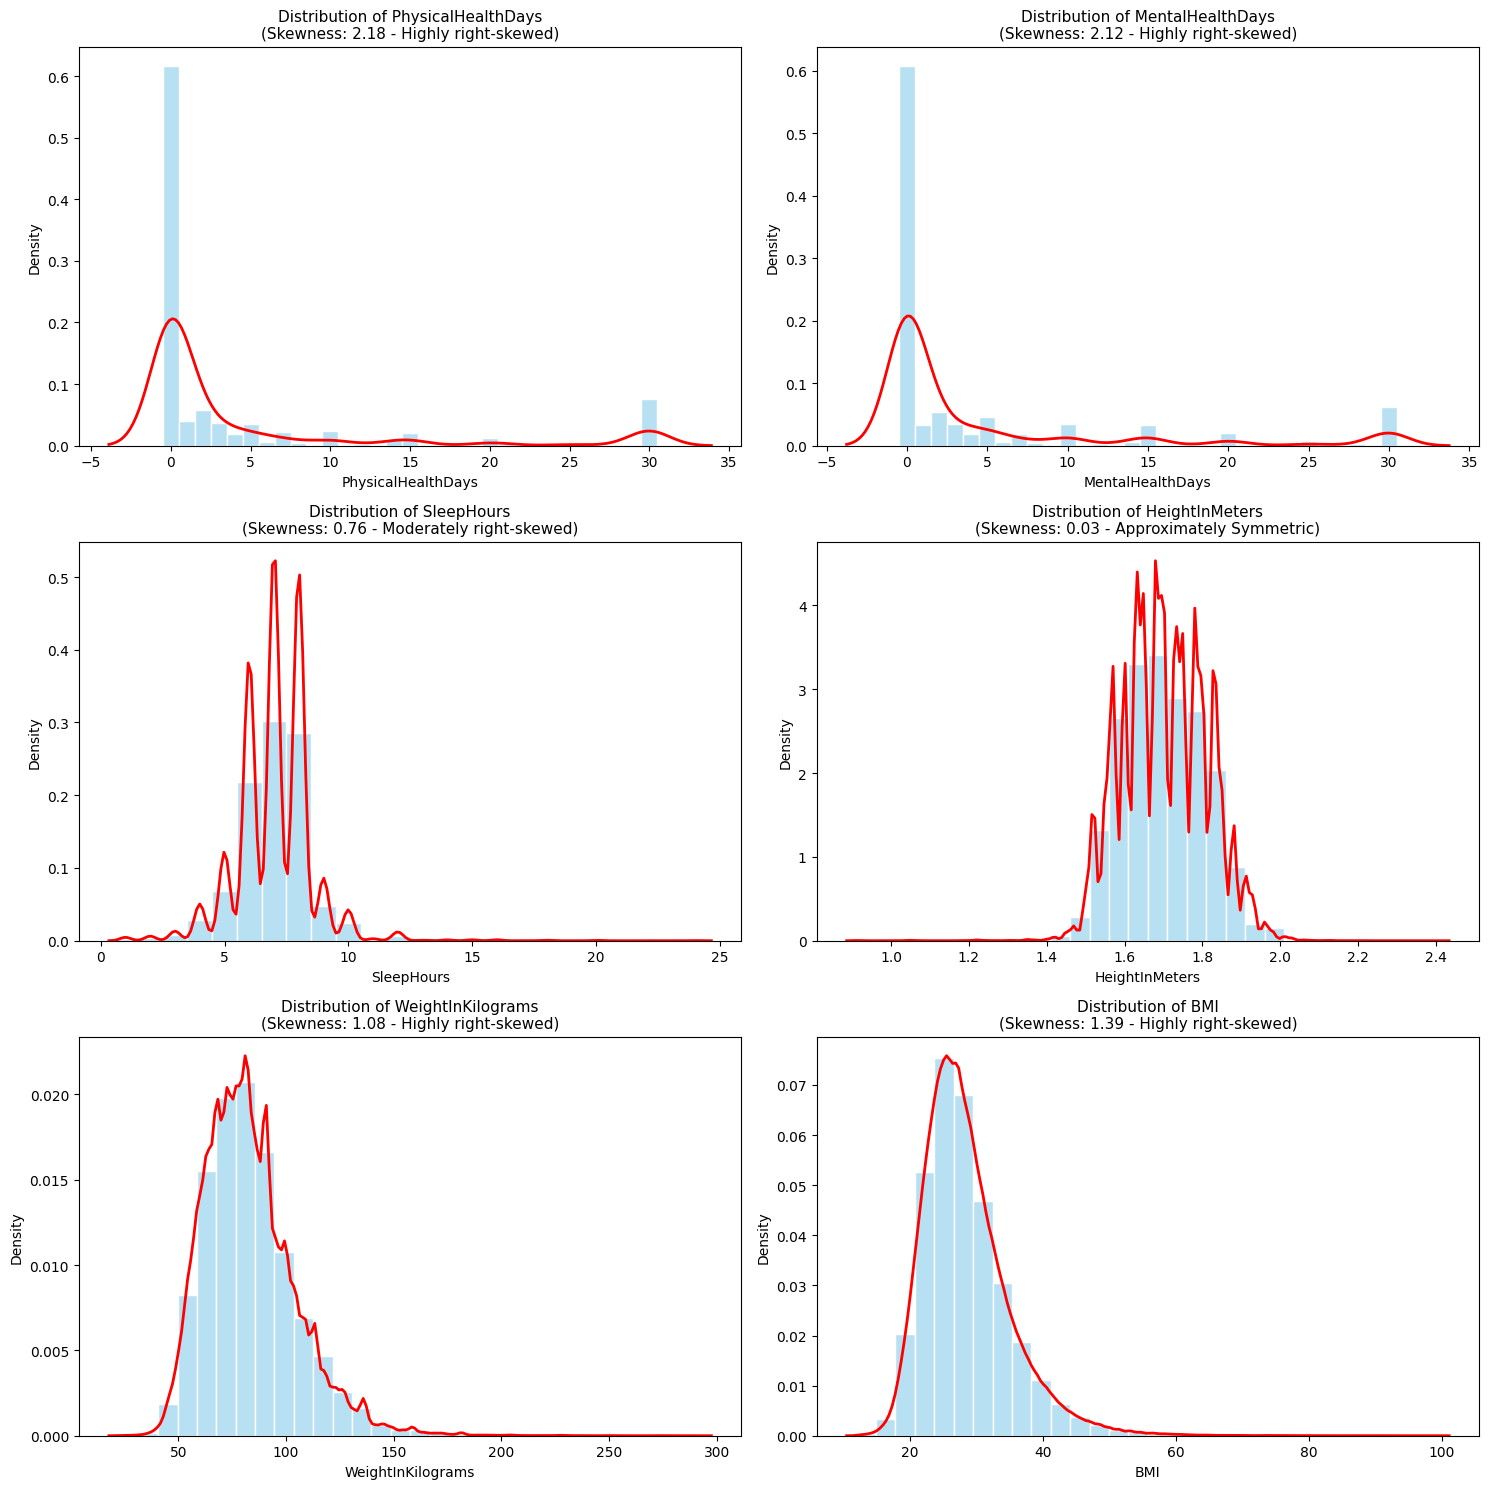

In [50]:
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  
distribution_shapes = {}

for i, col in enumerate(numerical_columns):
    # Setup Data
    data = df[col].dropna()
    
    
    if len(data) == 0:
        fig.delaxes(axes[i]) 
        continue
    
    # Calculate Skewness
    skew_val = data.skew()
    
    # Determine Shape String
    if skew_val > 1:
        shape_desc = "Highly right-skewed"
    elif skew_val < -1:
        shape_desc = "Highly left-skewed"
    elif 0.5 < skew_val <= 1:
        shape_desc = "Moderately right-skewed"
    elif -1 <= skew_val < -0.5:
        shape_desc = "Moderately left-skewed"
    else:
        shape_desc = "Approximately Symmetric"
    
    # Lưu vào dictionary
    distribution_shapes[col] = shape_desc
    
    ax = axes[i]  # Lấy subplot hiện tại
    
    is_discrete = data.nunique() <= 50
    
    if is_discrete:
        # For discrete data: set ax=ax
        sns.histplot(data, stat="density", discrete=True, color='skyblue', alpha=0.6, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, bw_adjust=2.0, ax=ax)
    else:
        # For continuous data: set ax=ax
        sns.histplot(data, stat="density", bins=30, color='skyblue', alpha=0.6, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, ax=ax)
    
    ax.set_title(f'Distribution of {col}\n(Skewness: {skew_val:.2f} - {shape_desc})', fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

df_numerical_des.loc['dis_shape'] = pd.Series(distribution_shapes)


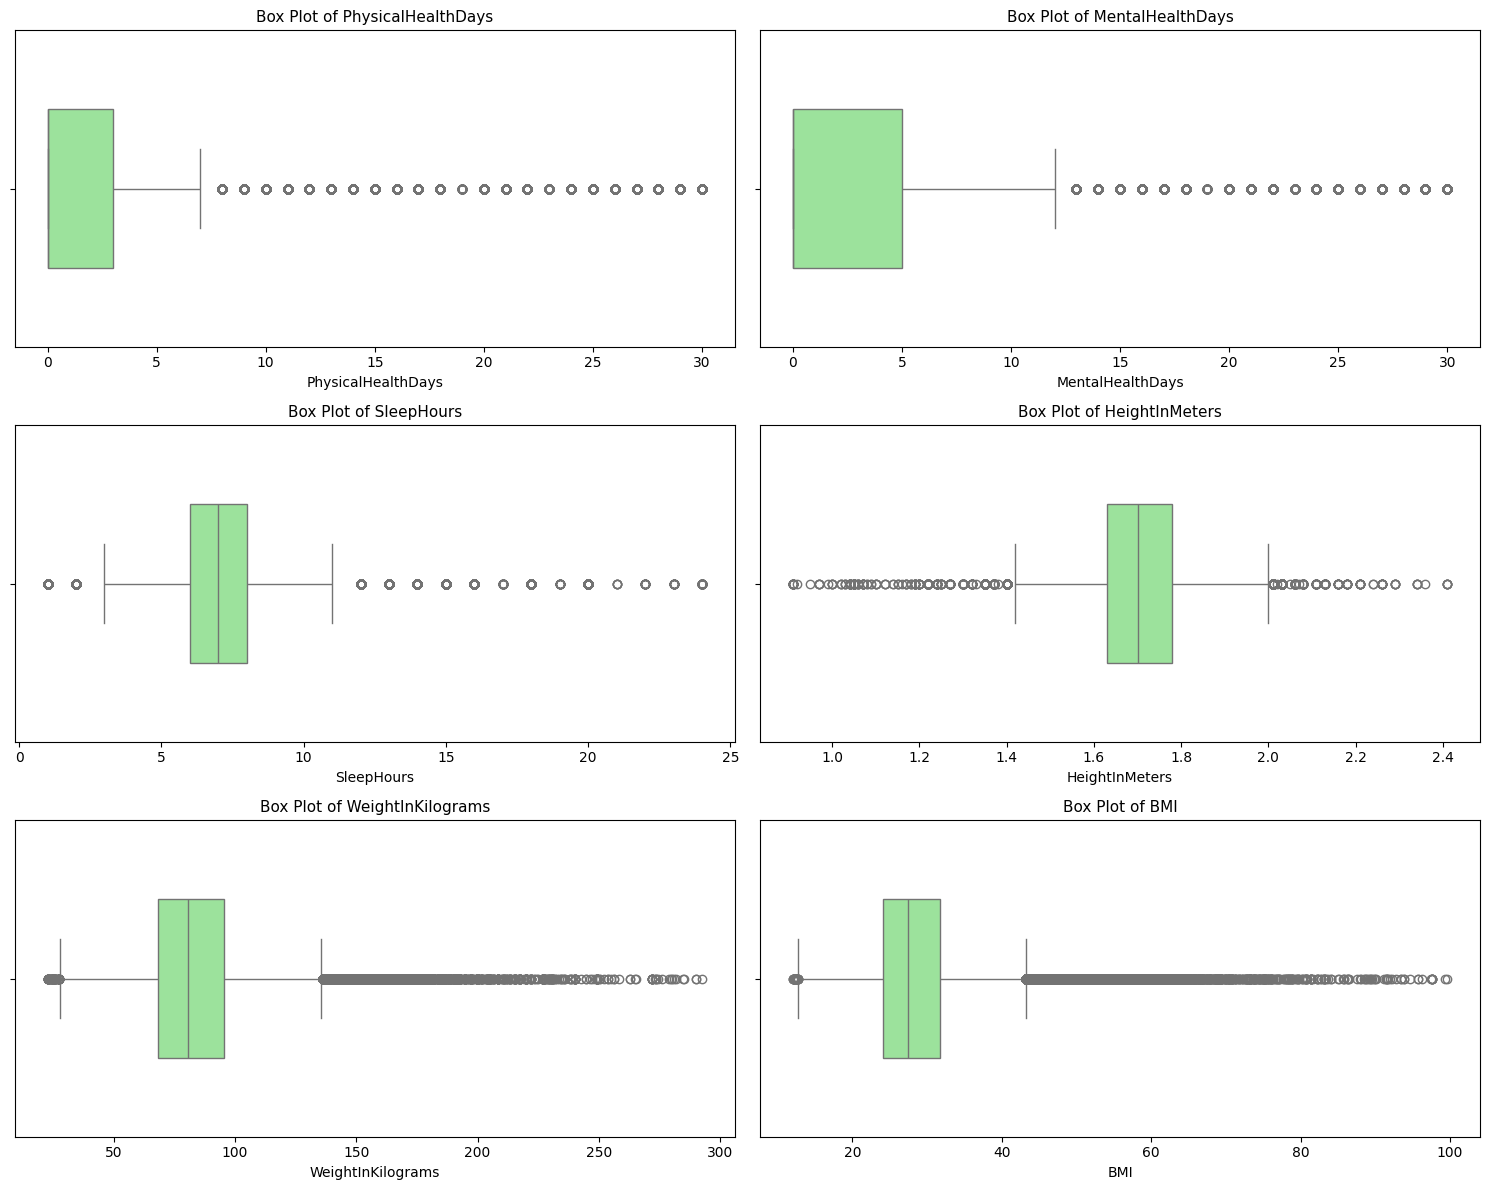

In [47]:
n_cols = 2 
n_rows = math.ceil(len(numerical_columns) / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    
    # Setup Data
    data = df[col].dropna()
    
    if len(data) == 0:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center')
        continue
        
    sns.boxplot(x=data, ax=ax, color='lightgreen', width=0.5)
    
    ax.set_title(f'Box Plot of {col}', fontsize=11)
    ax.set_xlabel(col)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [51]:
df_numerical_des

PhysicalHealthDays     MentalHealthDays               SleepHours  \
count                 434053.0             435913.0                 439527.0   
mean                  4.349372             4.384164                 7.022909   
std                   8.689968             8.388541                 1.502618   
min                        0.0                  0.0                      1.0   
25%                        0.0                  0.0                      6.0   
50%                        0.0                  0.0                      7.0   
75%                        3.0                  5.0                      8.0   
max                       30.0                 30.0                     24.0   
dis_shape  Highly right-skewed  Highly right-skewed  Moderately right-skewed   

                    HeightInMeters    WeightInKilograms                  BMI  
count                     416470.0             403044.0             396316.0  
mean                       1.70269            83.074632            28.529907  
std                       0.107178            21.448241             6.554917  
min                           0.91                22.68                12.02  
25%                           1.63                68.04                24.13  
50%                            1.7                80.74                27.44  
75%                           1.78                95.25                31.75  
max                           2.41               292.57                99.64  
dis_shape  Approximately Symmetric  Highly right-skewed  Highly right-skewed

#### Range & Outliers: 
- What are the minimum and maximum values? 
- Are min/max values reasonable, or do they indicate errors? 
- Identify outliers using box plots, IQR method, or z-scores 
- Are outliers genuine extreme values or data entry errorissing

In [54]:
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30, "days/month"),
    'MentalHealthDays':   (0, 30, "days/month"),
    'SleepHours':         (1, 24, "hours/day"),
    'HeightInMeters':     (0.5, 2.8, "meters"),
    'WeightInKilograms':  (25, 640, "kg"),
    'BMI':                (10, 150, "index")
}

summary_rows = []

for col in numerical_columns:
    data = df[col].dropna()
    if len(data) == 0:
        continue

    min_val = data.min()
    max_val = data.max()
    

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    low_outliers = data[data < lower_bound]
    high_outliers = data[data > upper_bound]
    total_outliers = len(low_outliers) + len(high_outliers)
    pct_outliers = (total_outliers / len(data)) * 100
    
    limit_info = REAL_LIFE_LIMITS.get(col)
    
    verdict = "Normal Distribution" # Mặc định
    note = ""
    
    if len(high_outliers) > 0:
        if limit_info:
            real_min, real_max, unit = limit_info
            
            # Logic so sánh với giới hạn thực tế
            if max_val <= real_max:
                verdict = "Genuine Extreme"
                note = f"High statistical outliers but within real limit ({real_max} {unit})"
            else:
                verdict = "Data Error"
                note = f"Values exceed physical limit ({real_max} {unit})"
        else:
            verdict = "Statistical Outlier (No Limit Info)"
            note = "Outliers exist but no real-life limit defined to check"
    elif len(low_outliers) > 0:
         verdict = "Statistical Outlier (Low)"

    # 4. Lưu vào dictionary
    row = {
        'Column': col,
        'Min': min_val,
        'Max': max_val,
        'IQR_Lower': lower_bound,
        'IQR_Upper': upper_bound,
        'Outliers_Low': len(low_outliers),
        'Outliers_High': len(high_outliers),
        'Total_Outliers_Pct': f"{pct_outliers:.2f}%",
        'Real_Limit_Max': limit_info[1] if limit_info else None,
        'Unit': limit_info[2] if limit_info else None,
        'Verdict': verdict,
        'Note': note
    }
    summary_rows.append(row)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)    
df_outlier_analysis = pd.DataFrame(summary_rows)
df_outlier_analysis

Column    Min     Max  IQR_Lower  IQR_Upper  Outliers_Low  Outliers_High Total_Outliers_Pct  Real_Limit_Max        Unit          Verdict                                                             Note
0  PhysicalHealthDays   0.00   30.00     -4.500      7.500             0          72268             16.65%            30.0  days/month  Genuine Extreme  High statistical outliers but within real limit (30 days/month)
1    MentalHealthDays   0.00   30.00     -7.500     12.500             0          60389             13.85%            30.0  days/month  Genuine Extreme  High statistical outliers but within real limit (30 days/month)
2          SleepHours   1.00   24.00      3.000     11.000          2703           4557              1.65%            24.0   hours/day  Genuine Extreme   High statistical outliers but within real limit (24 hours/day)
3      HeightInMeters   0.91    2.41      1.405      2.005           659            897              0.37%             2.8      meters  Genuine Extreme     High statistical outliers but within real limit (2.8 meters)
4   WeightInKilograms  22.68  292.57     27.225    136.065            51           9592              2.39%           640.0          kg  Genuine Extreme         High statistical outliers but within real limit (640 kg)
5                 BMI  12.02   99.64     12.700     43.180            45          12294              3.11%           150.0       index  Genuine Extreme      High statistical outliers but within real limit (150 index)

#### Data Quality: 
- What percentage of values are missing? 
- Are there any impossible values? (e.g., negative ages, prices = 0) 
- Are there placeholder values? (e.g., 999, -1, 0 used to indicate missing) 

In [55]:
SUSPICIOUS_PLACEHOLDERS = [-1, -9, -99, -999, 999, 9999, 0]
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30),
    'MentalHealthDays':   (0, 30),
    'SleepHours':         (0, 24),
    'HeightInMeters':     (0.3, 3.0),
    'WeightInKilograms':  (20, 650),
    'BMI':                (10, 150)
}

quality_report_rows = []

for col in numerical_columns:
    # 1. Setup Data
    data_all = df[col]
    data_clean = df[col].dropna()
    total_len = len(data_all)
    
    if len(data_clean) == 0:
        continue

    # --- A. Missing Values ---
    missing_count = data_all.isnull().sum()
    missing_pct = (missing_count / total_len) * 100
    
    # --- B. Impossible Values (Real-world limits) ---
    min_limit, max_limit = REAL_LIFE_LIMITS.get(col, (None, None))
    imp_low_count = 0
    imp_high_count = 0
    imp_values_detail = ""
    
    if min_limit is not None:
        imp_low = data_clean[data_clean < min_limit]
        imp_low_count = len(imp_low)
        imp_high = data_clean[data_clean > max_limit]
        imp_high_count = len(imp_high)
        
        if imp_low_count > 0:
            imp_values_detail += f"Low({imp_low_count}): {imp_low.iloc[:3].tolist()}... "
        if imp_high_count > 0:
            imp_values_detail += f"High({imp_high_count}): {imp_high.nlargest(3).tolist()}..."

    total_impossible = imp_low_count + imp_high_count
    
    found_placeholders = []
    for p in SUSPICIOUS_PLACEHOLDERS:
        count = (data_clean == p).sum()
        if count > 0:
            pct = (count / len(data_clean)) * 100
            found_placeholders.append(f"{p} ({pct:.1f}%)")
            
    placeholders_str = ", ".join(found_placeholders) if found_placeholders else "None"
    
    zero_pct = ((data_clean == 0).sum() / len(data_clean)) * 100

    issues = []
    if missing_pct > 5:
        issues.append("High Missing Rate")
    if total_impossible > 0:
        issues.append("Impossible Values")
    if len(found_placeholders) > 0:
        issues.append("Suspicious Placeholders")
    if zero_pct > 10 and 0 in SUSPICIOUS_PLACEHOLDERS:
        issues.append("High Zero Rate")
        
    verdict = ", ".join(issues) if issues else "Good Quality"

    row = {
        'Column': col,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Limit_Range': f"[{min_limit}-{max_limit}]" if min_limit else "N/A",
        'Impossible_Count': total_impossible,
        'Impossible_Examples': imp_values_detail if imp_values_detail else "None",
        'Sus_Placeholders': placeholders_str,
        'Zero_Pct': f"{zero_pct:.1f}%",
        'Quality_Verdict': verdict
    }
    quality_report_rows.append(row)

df_quality_report = pd.DataFrame(quality_report_rows)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_quality_report

Column Missing_Pct Limit_Range  Impossible_Count Impossible_Examples Sus_Placeholders Zero_Pct                          Quality_Verdict
0  PhysicalHealthDays       2.45%         N/A                 0                None        0 (61.7%)    61.7%  Suspicious Placeholders, High Zero Rate
1    MentalHealthDays       2.04%         N/A                 0                None        0 (60.8%)    60.8%  Suspicious Placeholders, High Zero Rate
2          SleepHours       1.22%         N/A                 0                None             None     0.0%                             Good Quality
3      HeightInMeters       6.41%   [0.3-3.0]                 0                None             None     0.0%                        High Missing Rate
4   WeightInKilograms       9.42%    [20-650]                 0                None             None     0.0%                        High Missing Rate
5                 BMI      10.94%    [10-150]                 0                None             None     0.0%                        High Missing Rate

### 2.2.6 Categorical columns analysis 

### Finding all categorical columns

In [56]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns detected: {categorical_columns}")


Categorical columns detected: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


### Value Distribution: 


- How many unique/distinct values are there? 
- What are the top 5-10 most frequent values?

- Create visualizations: bar charts, count plots 
- Is the distribution balanced or highly imbalanced? 

In [62]:
CATEGORY_LABEL_MAPS = {
    'LastCheckupTime': {
        'Within past year (anytime less than 12 months ago)': '< 1 year',
        'Within past 2 years (1 year but less than 2 years ago)': '1-2 years',
        'Within past 5 years (2 years but less than 5 years ago)': '2-5 years',
        '5 or more years ago': '5+ years',
        'Never': 'Never'
    },
    'RemovedTeeth': {
        'None of them': 'None',
        '1 to 5': '1-5',
        '6 or more, but not all': '6+ but not all',
        'All': 'All'
    }
   
}

def get_short_labels(col_name, labels):
    mapping = CATEGORY_LABEL_MAPS.get(col_name, {})
    new_labels = []
    for label in labels:
        str_label = str(label)
        if str_label in mapping:
            new_labels.append(mapping[str_label])
        else:
            new_labels.append(str_label[:15] + '...' if len(str_label) > 15 else str_label)
    return new_labels

In [66]:
stats_rows = []

for col in categorical_columns:
    # 1. Vectorized basic statistics
    col_data = df[col].values
    is_missing = pd.isna(col_data)
    total_values = len(col_data)
    non_missing_mask = ~is_missing
    non_missing_data = col_data[non_missing_mask]
    
    missing_count = np.sum(is_missing)
    missing_pct = (missing_count / total_values) * 100
    
    # Fast unique count
    unique_values, counts = np.unique(non_missing_data, return_counts=True)
    unique_count = len(unique_values)
    
    # 2. Top Values Analysis
    top_values = df[col].value_counts().head(10)
    
    # Format chuỗi: "Giá trị (Số lượng - Tỷ lệ %)"
    # Ví dụ: Male (209152 - 47.0%)
    top_values_list = [
        f"{val} ({cnt:,} | {cnt/total_values:.1%})" 
        for val, cnt in top_values.items()
    ]

    # 3. Distribution Balance (Gini)
    proportions = counts / len(non_missing_data)
    most_freq_pct = np.max(proportions) * 100
    gini = 1 - np.sum(proportions ** 2)
    
    if most_freq_pct > 90: status = "Extremely imbalanced"
    elif most_freq_pct > 70: status = "Highly imbalanced"
    elif most_freq_pct > 50: status = "Moderately imbalanced"
    else: status = "Relatively balanced"

    # Lưu vào danh sách
    row = {
        'Column': col,
        'Unique': unique_count,
        'Missing': f"{missing_count} ({missing_pct:.1f}%)",
        'Top_Values': " , ".join(top_values_list),
        'Balance_Status': status,
        'Gini_Score': f"{gini:.3f}"
    }
    stats_rows.append(row)

df_cat_info = pd.DataFrame(stats_rows)

# Hiển thị đẹp
pd.set_option('display.max_colwidth', None)
# Áp dụng style để hiển thị xuống dòng
styled_df = df_cat_info.style.set_properties(**{
    'text-align': 'left',       # Căn trái văn bản
    'white-space': 'pre-wrap',  # Quan trọng: Hiển thị \n thành xuống dòng thật
    'vertical-align': 'top'     # Đẩy nội dung lên trên cùng ô
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')] # Căn trái tiêu đề cột
}])
styled_df

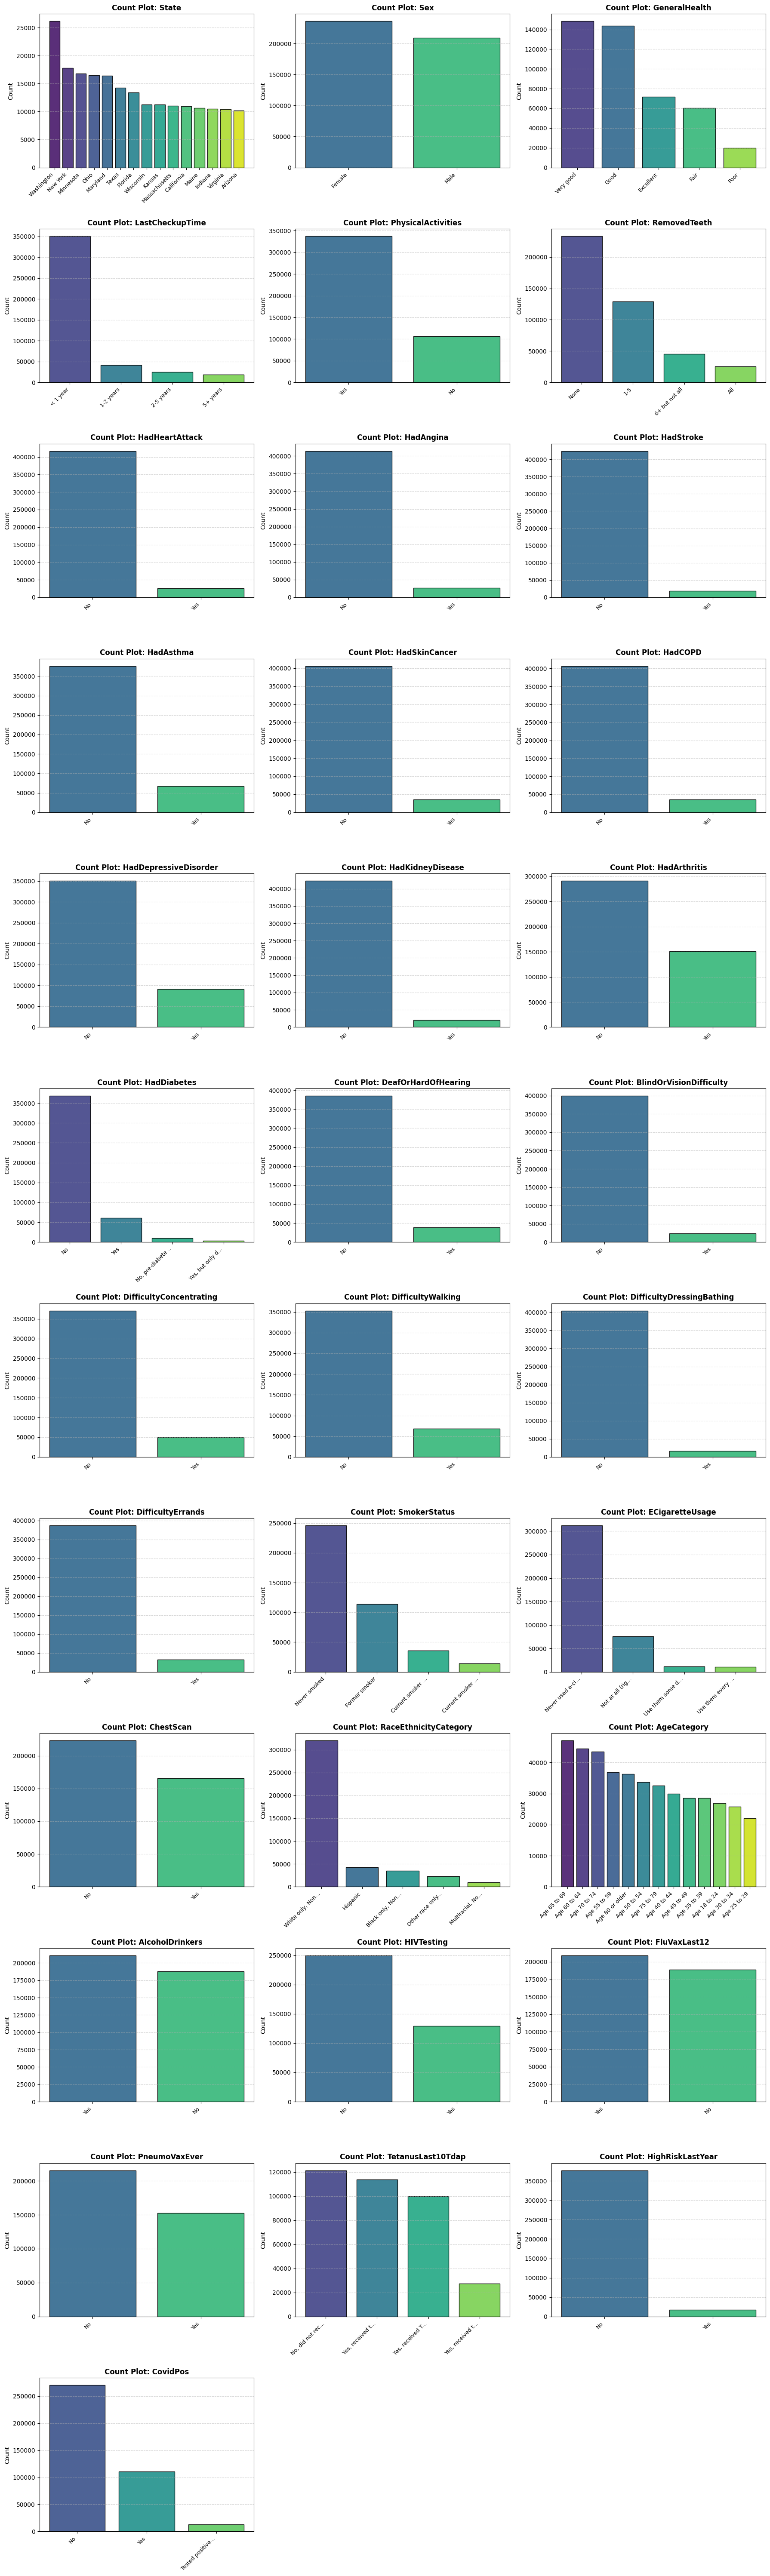

In [68]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    
    # Sort descending
    sort_idx = np.argsort(-counts)
    max_cats = min(15, len(unique_vals)) 
    plot_vals = unique_vals[sort_idx[:max_cats]]
    plot_counts = counts[sort_idx[:max_cats]]
    
    # Get Short Labels
    short_labels = get_short_labels(col, plot_vals)
    
    # Bạn có thể thay 'viridis' bằng: 'husl', 'Spectral', 'coolwarm', 'magma'
    colors = sns.color_palette("viridis", len(plot_counts))
    
    ax.bar(range(len(plot_counts)), plot_counts, color=colors, alpha=0.9, edgecolor='black')
    # ------------------------------
    ax.set_xticks(range(len(short_labels)))
    ax.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
    ax.set_title(f'Count Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.5)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

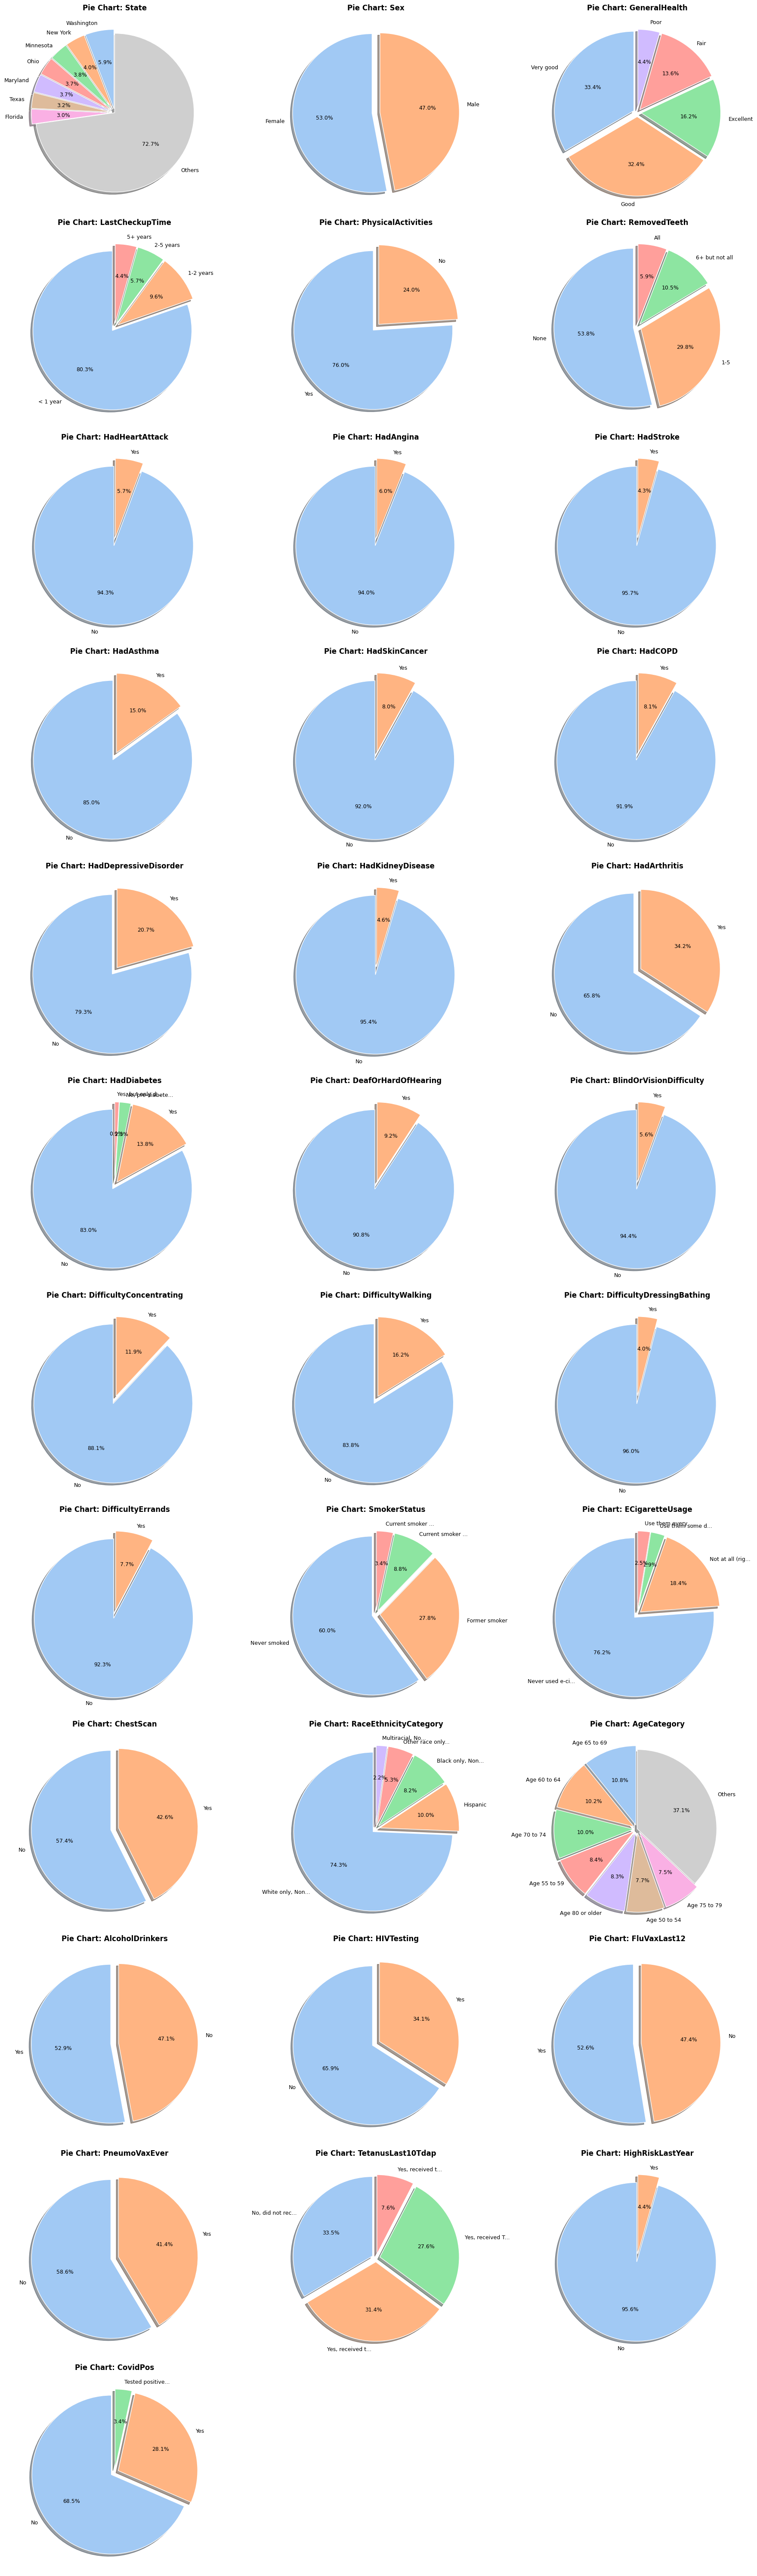

In [70]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    sort_idx = np.argsort(-counts) # Descending
    
    sorted_vals = unique_vals[sort_idx]
    sorted_counts = counts[sort_idx]
    
    # Logic for "Others" grouping
    if len(sorted_vals) <= 8:
        pie_labels = get_short_labels(col, sorted_vals)
        pie_counts = sorted_counts
        explode = [0.05] * len(sorted_vals) 
    else:
        # Group Top 7 + Others
        top_7_vals = sorted_vals[:7]
        top_7_counts = sorted_counts[:7]
        others_count = np.sum(sorted_counts[7:])
        
        pie_labels = get_short_labels(col, top_7_vals) + ['Others']
        pie_counts = np.append(top_7_counts, others_count)
        explode = [0.05] * 7 + [0] 

    colors = sns.color_palette('pastel', len(pie_counts))
    
    # Plot Pie Chart
    ax.pie(pie_counts, 
           labels=pie_labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           explode=explode, 
           shadow=True,
           colors=colors,  
           textprops={'fontsize': 9},
           wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    
    ax.set_title(f'Pie Chart: {col}', fontsize=12, fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data Quality: 
<ol>
    <li> What percentage of values are missing? 
    <li> Are there inconsistencies in categories?(Example: "Male", "male", "M", "m" all meaning the same thing, Typos or variations in spelling)
    <li> Are there unexpected or abnormal values? 
    <li> Are there categories with very few observations? Should they be grouped?
<ol>

In [72]:
quality_rows = []

for col in categorical_columns:
    # 1. Setup Data
    col_data = df[col]
    total_count = len(col_data)
    non_missing = col_data.dropna()
    missing_count = col_data.isnull().sum()
    
    # --- A. Missing Values Analysis ---
    missing_pct = (missing_count / total_count) * 100
    
    if missing_pct == 0: missing_qual = "Excellent"
    elif missing_pct < 5: missing_qual = "Good"
    elif missing_pct < 15: missing_qual = "Moderate"
    else: missing_qual = "Poor"

    # --- B. Inconsistency Detection ---
    if len(non_missing) > 0:
        unique_values = non_missing.unique()
        normalized_groups = defaultdict(list)
        
        for value in unique_values:
            # Normalize: lowercase, alphanumeric only
            normalized = re.sub(r'[^a-zA-Z0-9]', '', str(value).lower().strip())
            normalized_groups[normalized].append(str(value))
        
        # Count groups with variants > 1
        inconsistencies = [variants for k, variants in normalized_groups.items() if len(variants) > 1]
        inconsistency_count = len(inconsistencies)
    else:
        unique_values = []
        inconsistency_count = 0

    # --- C. Abnormal Values ---
    abnormal_patterns = []
    if len(unique_values) > 0:
        # Check numeric-like codes
        num_like = [v for v in unique_values if str(v).isdigit() and len(str(v)) > 2]
        if num_like: abnormal_patterns.append("Numeric Codes")
        
        # Check very long strings
        long_str = [v for v in unique_values if len(str(v)) > 50]
        if long_str: abnormal_patterns.append("Long Strings (>50)")
        
        # Check special chars
        spec_chars = [v for v in unique_values if re.search(r'[^\w\s\-\(\)\/\.]', str(v))]
        if spec_chars: abnormal_patterns.append("Special Chars")
    
    abnormal_str = ", ".join(abnormal_patterns) if abnormal_patterns else "None"

    # --- D. Rare Categories ---
    if len(non_missing) > 0:
        val_counts = non_missing.value_counts()
        rare_threshold = 0.01
        rare_cats = val_counts[val_counts / len(non_missing) < rare_threshold]
        rare_count = len(rare_cats)
        rare_pct_total = (rare_cats.sum() / len(non_missing)) * 100
    else:
        rare_count = 0
        rare_pct_total = 0

    # --- E. Scoring & Recommendations ---
    # Scores
    score_miss = max(0, 100 - missing_pct * 2)
    score_consist = max(0, 100 - inconsistency_count * 10)
    score_abnorm = max(0, 100 - len(abnormal_patterns) * 15)
    
    unique_len = len(unique_values) if len(unique_values) > 0 else 1
    score_balance = min(100, (1 - (rare_count / unique_len)) * 100)
    
    overall_score = (score_miss + score_consist + score_abnorm + score_balance) / 4
    
    # Grade
    if overall_score >= 90: grade = "A (Excellent)"
    elif overall_score >= 80: grade = "B (Good)"
    elif overall_score >= 70: grade = "C (Fair)"
    elif overall_score >= 60: grade = "D (Poor)"
    else: grade = "F (Very Poor)"
    
    # Solutions
    solutions = []
    if missing_pct > 5: solutions.append("Impute Missing")
    if inconsistency_count > 0: solutions.append("Standardize Names")
    if abnormal_patterns: solutions.append("Clean Abnormal Values")
    if rare_count > 10: solutions.append("Group Rare Cats")
    
    sol_str = ", ".join(solutions) if solutions else "None"

    # --- F. Save Row ---
    row = {
        'Column': col,
        'Missing': f"{missing_pct:.1f}% ({missing_qual})",
        'Inconsistencies': f"{inconsistency_count} groups" if inconsistency_count > 0 else "None",
        'Abnormal_Issues': abnormal_str,
        'Rare_Categories': f"{rare_count} cats ({rare_pct_total:.1f}% data)",
        'Score': round(overall_score, 1),
        'Grade': grade,
        'Actions_Needed': sol_str
    }
    quality_rows.append(row)

# Tạo DataFrame
df_data_quality = pd.DataFrame(quality_rows)
# Cấu hình hiển thị
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
df_data_quality

Column           Missing Inconsistencies                    Abnormal_Issues      Rare_Categories  Score          Grade                         Actions_Needed
0                       State  0.0% (Excellent)            None                               None  10 cats (7.8% data)   95.4  A (Excellent)                                   None
1                         Sex  0.0% (Excellent)            None                               None   0 cats (0.0% data)  100.0  A (Excellent)                                   None
2               GeneralHealth       0.3% (Good)            None                               None   0 cats (0.0% data)   99.9  A (Excellent)                                   None
3             LastCheckupTime       1.9% (Good)            None                 Long Strings (>50)   0 cats (0.0% data)   95.3  A (Excellent)                  Clean Abnormal Values
4          PhysicalActivities       0.2% (Good)            None                               None   0 cats (0.0% data)   99.9  A (Excellent)                                   None
5                RemovedTeeth       2.6% (Good)            None                      Special Chars   0 cats (0.0% data)   95.0  A (Excellent)                  Clean Abnormal Values
6              HadHeartAttack       0.7% (Good)            None                               None   0 cats (0.0% data)   99.7  A (Excellent)                                   None
7                   HadAngina       1.0% (Good)            None                               None   0 cats (0.0% data)   99.5  A (Excellent)                                   None
8                   HadStroke       0.3% (Good)            None                               None   0 cats (0.0% data)   99.8  A (Excellent)                                   None
9                   HadAsthma       0.4% (Good)            None                               None   0 cats (0.0% data)   99.8  A (Excellent)                                   None
10              HadSkinCancer       0.7% (Good)            None                               None   0 cats (0.0% data)   99.6  A (Excellent)                                   None
11                    HadCOPD       0.5% (Good)            None                               None   0 cats (0.0% data)   99.8  A (Excellent)                                   None
12      HadDepressiveDisorder       0.6% (Good)            None                               None   0 cats (0.0% data)   99.7  A (Excellent)                                   None
13           HadKidneyDisease       0.4% (Good)            None                               None   0 cats (0.0% data)   99.8  A (Excellent)                                   None
14               HadArthritis       0.6% (Good)            None                               None   0 cats (0.0% data)   99.7  A (Excellent)                                   None
15                HadDiabetes       0.2% (Good)            None                      Special Chars   1 cats (0.9% data)   89.9       B (Good)                  Clean Abnormal Values
16        DeafOrHardOfHearing       4.6% (Good)            None                               None   0 cats (0.0% data)   97.7  A (Excellent)                                   None
17    BlindOrVisionDifficulty       4.8% (Good)            None                               None   0 cats (0.0% data)   97.6  A (Excellent)                                   None
18    DifficultyConcentrating   5.4% (Moderate)            None                               None   0 cats (0.0% data)   97.3  A (Excellent)                         Impute Missing
19          DifficultyWalking   5.4% (Moderate)            None                               None   0 cats (0.0% data)   97.3  A (Excellent)                         Impute Missing
20  DifficultyDressingBathing   5.3% (Moderate)            None                               None   0 cats (0.0% data)   97.3  A (Excellent)                         Impute Missing
21          DifficultyErrands   5.7% (Mod

## 2.2.7 Missing value analysis

### Overall Assessment: 
<ol>
    <li> Create a missing values summary: column name, count, and percentage missing 
    <li> Visualize missing data patterns (heatmap or bar chart) 
    <li> Are missing values random, or is there a pattern?  
    <li> Do certain rows or groups have more missing values?
<ol> 

In [4]:
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Total_Count': len(df),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.reset_index(drop=True)
missing_summary

Column  Missing_Count  Total_Count  Missing_Percentage
0               GeneralHealth           1198       445132            0.269134
1          PhysicalHealthDays          10927       445132            2.454777
2            MentalHealthDays           9067       445132            2.036924
3             LastCheckupTime           8308       445132            1.866413
4          PhysicalActivities           1093       445132            0.245545
5                  SleepHours           5453       445132            1.225030
6                RemovedTeeth          11360       445132            2.552052
7              HadHeartAttack           3065       445132            0.688560
8                   HadAngina           4405       445132            0.989594
9                   HadStroke           1557       445132            0.349784
10                  HadAsthma           1773       445132            0.398309
11              HadSkinCancer           3143       445132            0.706083
12                    HadCOPD           2219       445132            0.498504
13      HadDepressiveDisorder           2812       445132            0.631723
14           HadKidneyDisease           1926       445132            0.432681
15               HadArthritis           2633       445132            0.591510
16                HadDiabetes           1087       445132            0.244197
17        DeafOrHardOfHearing          20647       445132            4.638399
18    BlindOrVisionDifficulty          21564       445132            4.844406
19    DifficultyConcentrating          24240       445132            5.445576
20          DifficultyWalking          24012       445132            5.394355
21  DifficultyDressingBathing          23915       445132            5.372564
22          DifficultyErrands          25656       445132            5.763684
23               SmokerStatus          35462       445132            7.966626
24            ECigaretteUsage          35660       445132            8.011107
25                  ChestScan          56046       445132           12.590872
26      RaceEthnicityCategory          14057       445132            3.157940
27                AgeCategory           9079       445132            2.039620
28             HeightInMeters          28652       445132            6.436742
29          WeightInKilograms          42078       445132            9.452926
30                        BMI          48806       445132           10.964388
31            AlcoholDrinkers          46574       445132           10.462964
32                 HIVTesting          66127       445132           14.855593
33               FluVaxLast12          47121       445132           10.585849
34              PneumoVaxEver          77040       445132           17.307226
35          TetanusLast10Tdap          82516       445132           18.537423
36           HighRiskLastYear          50623       445132           11.372582
37                   CovidPos          50764       445132           11.404258

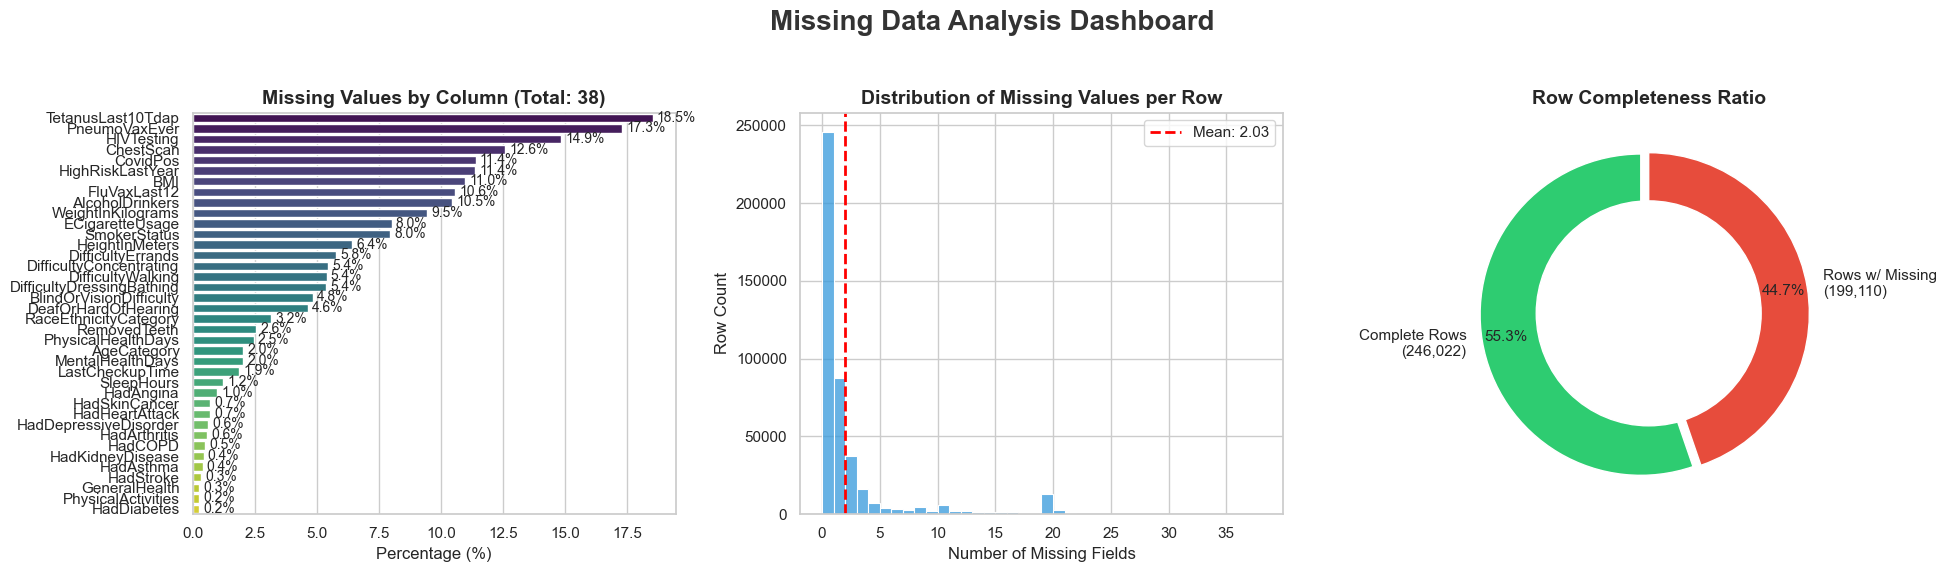

In [8]:
# 1. Cấu hình Style
sns.set_theme(style="whitegrid", context="notebook")

# 2. Chuẩn bị dữ liệu
plot_data = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_per_row = df.isnull().sum(axis=1)

# 3. Khởi tạo khung hình: 1 Dòng, 3 Cột (Bỏ Heatmap, giữ lại 3 biểu đồ kia)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tiêu đề lớn
plt.suptitle('Missing Data Analysis Dashboard', fontsize=20, fontweight='bold', color='#333333', y=0.98)

# Gán biến trục để dễ thao tác (ax1, ax2, ax3)
ax1, ax2, ax3 = axes.flatten()

# --- PLOT 1: Missing Values by Column (Bar Chart) ---
if not plot_data.empty:
    # FIX WARNING: Thêm hue='Column' và legend=False
    sns.barplot(data=plot_data, x='Missing_Percentage', y='Column', 
                ax=ax1, palette='viridis', hue='Column', legend=False)
    
    ax1.set_title(f'Missing Values by Column (Total: {len(plot_data)})', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Percentage (%)', fontsize=12)
    ax1.set_ylabel('')
    
    # Thêm nhãn số %
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)
else:
    ax1.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)

# --- PLOT 2: Missing per Row (Histogram) ---
# (Chuyển Histogram từ vị trí số 3 cũ lên vị trí số 2)
if missing_per_row.sum() > 0:
    sns.histplot(missing_per_row, kde=False, ax=ax2, color='#3498db', binwidth=1, edgecolor='white')
    
    mean_val = missing_per_row.mean()
    ax2.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    ax2.set_title('Distribution of Missing Values per Row', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Number of Missing Fields', fontsize=12)
    ax2.set_ylabel('Row Count', fontsize=12)
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'All Rows Complete', ha='center', va='center', fontsize=14)

# --- PLOT 3: Row Completeness (Donut Chart) ---
# (Chuyển Donut từ vị trí số 4 cũ lên vị trí số 3)
complete_count = (missing_per_row == 0).sum()
incomplete_count = len(df) - complete_count

if incomplete_count > 0:
    labels = [f'Complete Rows\n({complete_count:,})', f'Rows w/ Missing\n({incomplete_count:,})']
    sizes = [complete_count, incomplete_count]
    colors = ['#2ecc71', '#e74c3c'] # Xanh lá vs Đỏ
    
    wedges, texts, autotexts = ax3.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                       startangle=90, colors=colors, pctdistance=0.85, 
                                       explode=(0.05, 0), textprops={'fontsize': 11})
    
    # Tạo vòng tròn trắng ở giữa để thành Donut Chart
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax3.add_artist(centre_circle)
    
    ax3.set_title('Row Completeness Ratio', fontsize=14, fontweight='bold')
else:
    ax3.text(0.5, 0.5, '100% Data Complete', ha='center', va='center', fontsize=14, color='green')
    ax3.axis('off')

# 4. Căn chỉnh layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
  # 3. Analyze missing data patterns
total_missing_values = missing_summary['Missing_Count'].sum()
print("-" * 60)

# Check for patterns in missing values
print("Pattern Analysis:")

# Are missing values random or systematic?
if total_missing_values > 0:
    # Calculate missing value correlation
    missing_corr = df.isnull().corr()
    
    # Find highly correlated missing patterns (>0.5 correlation)
    high_corr_pairs = []
    for i in range(len(missing_corr.columns)):
        for j in range(i+1, len(missing_corr.columns)):
            corr_val = missing_corr.iloc[i, j]
            if abs(corr_val) > 0.5 and not np.isnan(corr_val):
                high_corr_pairs.append({
                    'col1': missing_corr.columns[i],
                    'col2': missing_corr.columns[j],
                    'correlation': corr_val
                })
    
    if high_corr_pairs:
        print("Strong correlations in missing patterns found:")
        for pair in high_corr_pairs:
            print(f"  - {pair['col1']} & {pair['col2']}: {pair['correlation']:.3f}")
        print("\nThis suggests SYSTEMATIC missing patterns (not random)")
    else:
        print("No strong correlations in missing patterns found")
        print("Missing values appear to be more RANDOM in nature")
    

    # Check if certain groups have more missing values
    print(f"\n4. GROUP-BASED MISSING PATTERNS")
    print("-" * 60)
    
    # Analyze missing patterns by key demographic variables
    demographic_cols = ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory']
    
    for col in demographic_cols:
        if col in df.columns and not df[col].isnull().all():
            print(f"\nMissing patterns by {col}:")
            
            # Calculate missing percentage by group
            group_missing = df.groupby(col)[missing_summary[missing_summary['Missing_Count'] > 0]['Column'].tolist()].apply(
                lambda x: x.isnull().sum() / len(x) * 100
            )
            
            if len(group_missing) > 0:
                # Show top 3 groups with most missing values
                total_missing_by_group = group_missing.sum(axis=1).sort_values(ascending=False)
                print(f"  Top 3 groups with most missing data:")
                for i, (group, missing_pct) in enumerate(total_missing_by_group.head(3).items()):
                    print(f"    {i+1}. {group}: {missing_pct:.1f}% average missing")
            else:
                print(f"  No missing patterns to analyze for {col}")

else:
    print("No missing values found in the dataset!")
    print("Data appears to be complete across all columns and rows.")

print("\n" + "=" * 80)

------------------------------------------------------------
Pattern Analysis:
Strong correlations in missing patterns found:
  - DeafOrHardOfHearing & BlindOrVisionDifficulty: 0.906
  - DeafOrHardOfHearing & DifficultyConcentrating: 0.850
  - DeafOrHardOfHearing & DifficultyWalking: 0.852
  - DeafOrHardOfHearing & DifficultyDressingBathing: 0.853
  - DeafOrHardOfHearing & DifficultyErrands: 0.822
  - DeafOrHardOfHearing & SmokerStatus: 0.691
  - DeafOrHardOfHearing & ECigaretteUsage: 0.690
  - DeafOrHardOfHearing & ChestScan: 0.538
  - DeafOrHardOfHearing & HeightInMeters: 0.720
  - DeafOrHardOfHearing & WeightInKilograms: 0.561
  - DeafOrHardOfHearing & BMI: 0.543
  - DeafOrHardOfHearing & AlcoholDrinkers: 0.597
  - DeafOrHardOfHearing & FluVaxLast12: 0.592
  - DeafOrHardOfHearing & HighRiskLastYear: 0.568
  - DeafOrHardOfHearing & CovidPos: 0.567
  - BlindOrVisionDifficulty & DifficultyConcentrating: 0.885
  - BlindOrVisionDifficulty & DifficultyWalking: 0.887
  - BlindOrVisionDiffi

### Per Column Strategy: 
<ol>
<li> Why might values be missing? (random, not applicable, data collection issue) 
<li> What is your plan to handle them? (remove, impute, keep as separate category) 
<ol>

In [10]:
# 1. Setup Data & Categories
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].copy()

column_categories = {
    'Demographics': ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory'],
    'Heart Conditions': ['HadHeartAttack', 'HadAngina', 'HadStroke'],
    'Physical Health Metrics': ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'BMI', 'HeightInMeters', 'WeightInKilograms'],
    'Chronic Conditions': ['HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'],
    'Disabilities': ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'],
    'Lifestyle': ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours'],
    'Healthcare & Prevention': ['LastCheckupTime', 'RemovedTeeth', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
}

# 2. Define Helper Functions
def get_strategy(missing_pct, is_categorical):
    if missing_pct < 5:
        if is_categorical:
            return "Drop Rows", "Removal", "df.dropna(subset=['{col}'])"
        else:
            return "Mean/Median Imputation", "Imputation", "df['{col}'].fillna(df['{col}'].median())"
    else:
        if is_categorical:
            return "Create 'Unknown' Cat", "New Category", "df['{col}'].fillna('Unknown')"
        else:
            return "Advanced (KNN/Model)", "Advanced Imputation", "KNNImputer(n_neighbors=5)"

def get_reasons(category):
    reasons = {
        "Demographics": "Privacy concerns; Data collection errors; Skip patterns",
        "Heart Conditions": "Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers",
        "Physical Health Metrics": "Measurement not taken; Equipment issues; Refusal",
        "Chronic Conditions": "Undiagnosed; Reluctance to disclose; Uncertainty",
        "Disabilities": "Sensitive topic; Interpretation issues; Not applicable",
        "Lifestyle": "Social desirability bias; Privacy concerns",
        "Healthcare & Prevention": "Recall bias (memory); Survey fatigue; Not applicable"
    }
    return reasons.get(category, "General non-response; Ambiguity; Random errors")

def get_impact_level(missing_pct):
    if missing_pct < 5: return "Low (Minimal bias risk)"
    elif missing_pct < 15: return "Moderate (Risk if dropped)"
    else: return "High (Major bias/data loss)"

# 3. Build the Report Data
strategy_rows = []

for idx, row in columns_with_missing.iterrows():
    col = row['Column']
    missing_count = row['Missing_Count']
    missing_pct = row['Missing_Percentage']
    
    # A. Determine Category
    category = "Uncategorized"
    for cat_name, cat_cols in column_categories.items():
        if col in cat_cols:
            category = cat_name
            break
            
    # B. Determine Data Type
    is_categorical = df[col].dtype == 'object'
    dtype_str = "Categorical" if is_categorical else "Numerical"
    
    # C. Get Strategy & Implementation
    rec_strategy, strat_type, implementation_code = get_strategy(missing_pct, is_categorical)
    
    # D. Get Reasons & Impact
    reason_text = get_reasons(category)
    impact_text = get_impact_level(missing_pct)
    
    # E. Current Value Context (Snapshot)
    if is_categorical:
        unique_vals = df[col].dropna().unique()
        context_str = f"{len(unique_vals)} unique values"
    else:
        min_v, max_v = df[col].min(), df[col].max()
        context_str = f"Range: {min_v:.1f} - {max_v:.1f}"

    # F. Append to list
    strategy_rows.append({
        'Column': col,
        'Category': category,
        'Data_Type': dtype_str,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Missing_Count': f"{missing_count:,}",
        'Likely_Reason': reason_text,
        'Recommended_Strategy': rec_strategy,
        'Code_Logic': implementation_code.format(col=col),
        'Impact_Level': impact_text
    })

# 4. Create DataFrame
df_missing_strategy = pd.DataFrame(strategy_rows)

# 5. Display Options (to see full text)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_missing_strategy

Column                 Category    Data_Type Missing_Pct Missing_Count                                                         Likely_Reason    Recommended_Strategy                                                          Code_Logic                 Impact_Level
0               GeneralHealth  Physical Health Metrics  Categorical       0.27%         1,198                      Measurement not taken; Equipment issues; Refusal               Drop Rows                                 df.dropna(subset=['GeneralHealth'])      Low (Minimal bias risk)
1          PhysicalHealthDays  Physical Health Metrics    Numerical       2.45%        10,927                      Measurement not taken; Equipment issues; Refusal  Mean/Median Imputation  df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].median())      Low (Minimal bias risk)
2            MentalHealthDays  Physical Health Metrics    Numerical       2.04%         9,067                      Measurement not taken; Equipment issues; Refusal  Mean/Median Imputation      df['MentalHealthDays'].fillna(df['MentalHealthDays'].median())      Low (Minimal bias risk)
3             LastCheckupTime  Healthcare & Prevention  Categorical       1.87%         8,308                  Recall bias (memory); Survey fatigue; Not applicable               Drop Rows                               df.dropna(subset=['LastCheckupTime'])      Low (Minimal bias risk)
4          PhysicalActivities                Lifestyle  Categorical       0.25%         1,093                            Social desirability bias; Privacy concerns               Drop Rows                            df.dropna(subset=['PhysicalActivities'])      Low (Minimal bias risk)
5                  SleepHours                Lifestyle    Numerical       1.23%         5,453                            Social desirability bias; Privacy concerns  Mean/Median Imputation                  df['SleepHours'].fillna(df['SleepHours'].median())      Low (Minimal bias risk)
6                RemovedTeeth  Healthcare & Prevention  Categorical       2.55%        11,360                  Recall bias (memory); Survey fatigue; Not applicable               Drop Rows                                  df.dropna(subset=['RemovedTeeth'])      Low (Minimal bias risk)
7              HadHeartAttack         Heart Conditions  Categorical       0.69%         3,065  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers               Drop Rows                                df.dropna(subset=['HadHeartAttack'])      Low (Minimal bias risk)
8                   HadAngina         Heart Conditions  Categorical       0.99%         4,405  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers               Drop Rows                                     df.dropna(subset=['HadAngina'])      Low (Minimal bias risk)
9                   HadStroke         Heart Conditions  Categorical       0.35%         1,557  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers               Drop Rows                                     df.dropna(subset=['HadStroke'])      Low (Minimal bias risk)
10                  HadAsthma       Chronic Conditions  Categorical       0.40%         1,773                      Undiagnosed; Reluctance to disclose; Uncertainty               Drop Rows                                     df.dropna(subset=['HadAsthma'])      Low (Minimal bias risk)
11              HadSkinCancer       Chronic Conditions  Categorical       0.71%         3,143                      Undiagnosed; Reluctance to disclose; Uncertainty               Drop Rows                                 df.dropna(subset=['HadSkinCancer'])      Low (Minimal bias risk)
12                    HadCOPD       Chronic Conditions  Categorical       0.50%         2,219                      Undiagnosed; Reluctance to disclose; Uncertainty               Drop Rows                                       df.dropna(subset=['HadCOPD'])      Low (Minimal bias risk)
13      HadDepressiveDisorder    

Preliminary Patterns: 

- Calculate correlation matrix for numerical variables 
- Create correlation heatmap 

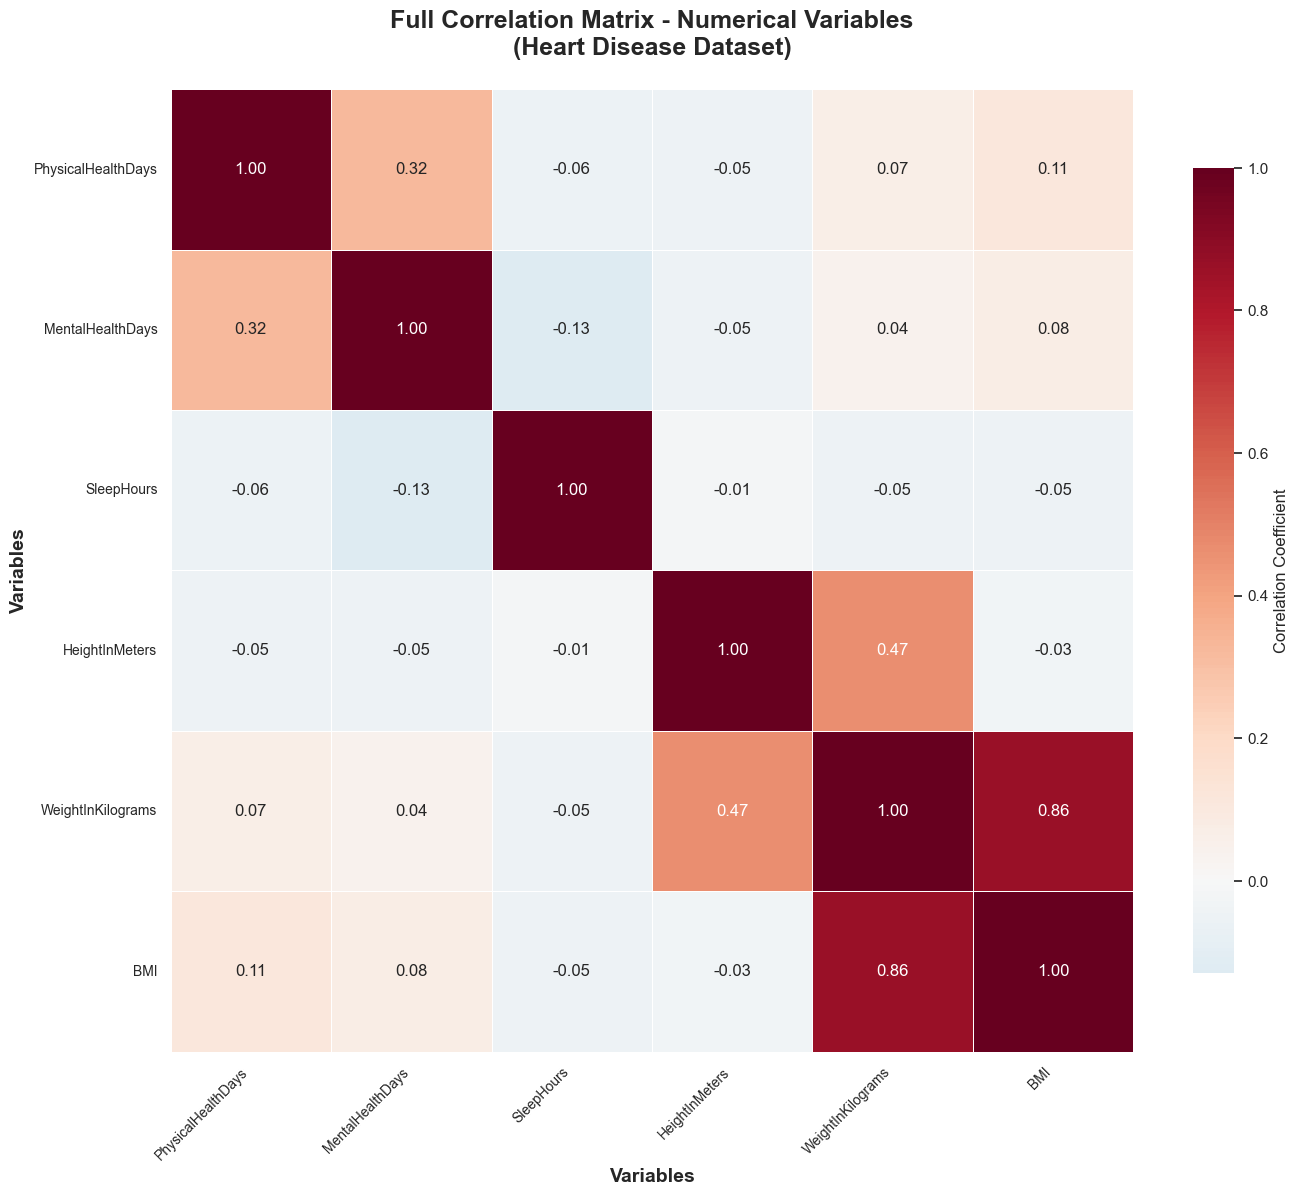

In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap - Full matrix (no masking)
plt.figure(figsize=(14, 12))

# Create a beautiful heatmap with full correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={
                'label': 'Correlation Coefficient',
                'shrink': 0.8,
                'aspect': 20
            })

plt.title('Full Correlation Matrix - Numerical Variables\n(Heart Disease Dataset)', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Variables', fontsize=14, fontweight='bold')
plt.ylabel('Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

- Identify strongly correlated pairs (positive or negative) 
- Are there any surprising relationships? 

### Strongly Correlated Pairs

**1. WeightInKilograms and BMI (Correlation Coefficient: 0.86)**
This is the strongest correlation observed in the entire matrix. A coefficient of 0.86 indicates a very strong positive linear relationship. This result is expected and mathematical rather than purely biological, as Body Mass Index (BMI) is a derived feature calculated directly from weight and height (specifically, weight divided by the square of height). Therefore, as an individual's weight increases, their BMI almost invariably increases, assuming height remains constant.

**2. HeightInMeters and WeightInKilograms (Correlation Coefficient: 0.47)**
There is a moderate positive correlation between height and weight. This indicates that taller individuals tend to weigh more, which is logical due to larger bone structure and muscle mass associated with increased height. However, the correlation is not perfect (it is not near 1.0), meaning there is significant variation; short individuals can be heavy, and tall individuals can be light.

---

### Surprising or counter-intuitive Relationships

**1. HeightInMeters and BMI (Correlation Coefficient: -0.03)**
This is arguably the most interesting data point in the matrix. Despite height being a component of the BMI formula (BMI = weight / height²), the correlation is near zero. Mathematically, since height is in the denominator, one might expect a negative correlation (as height goes up, BMI goes down).
* **Explanation:** This lack of correlation occurs because height is positively correlated with weight (0.47). Taller people tend to be heavier, which counteracts the mathematical reduction in BMI that would come from height alone. Consequently, knowing someone's height provides almost no information about their BMI in this dataset.

**2. SleepHours and MentalHealthDays (Correlation Coefficient: -0.13)**
This shows a weak negative correlation. The negative sign indicates that as sleep hours increase, the number of reported poor mental health days tends to decrease. While the value is small (-0.13), it aligns with medical literature suggesting that lack of sleep contributes to mental distress. However, the weakness of the correlation implies that sleep duration is just one of many variables affecting mental health status in this population.


Cross-tabulations: 
• For important categorical × categorical combinations, create frequency tables  
• For numerical × categorical combinations, create grouped summary statistics 

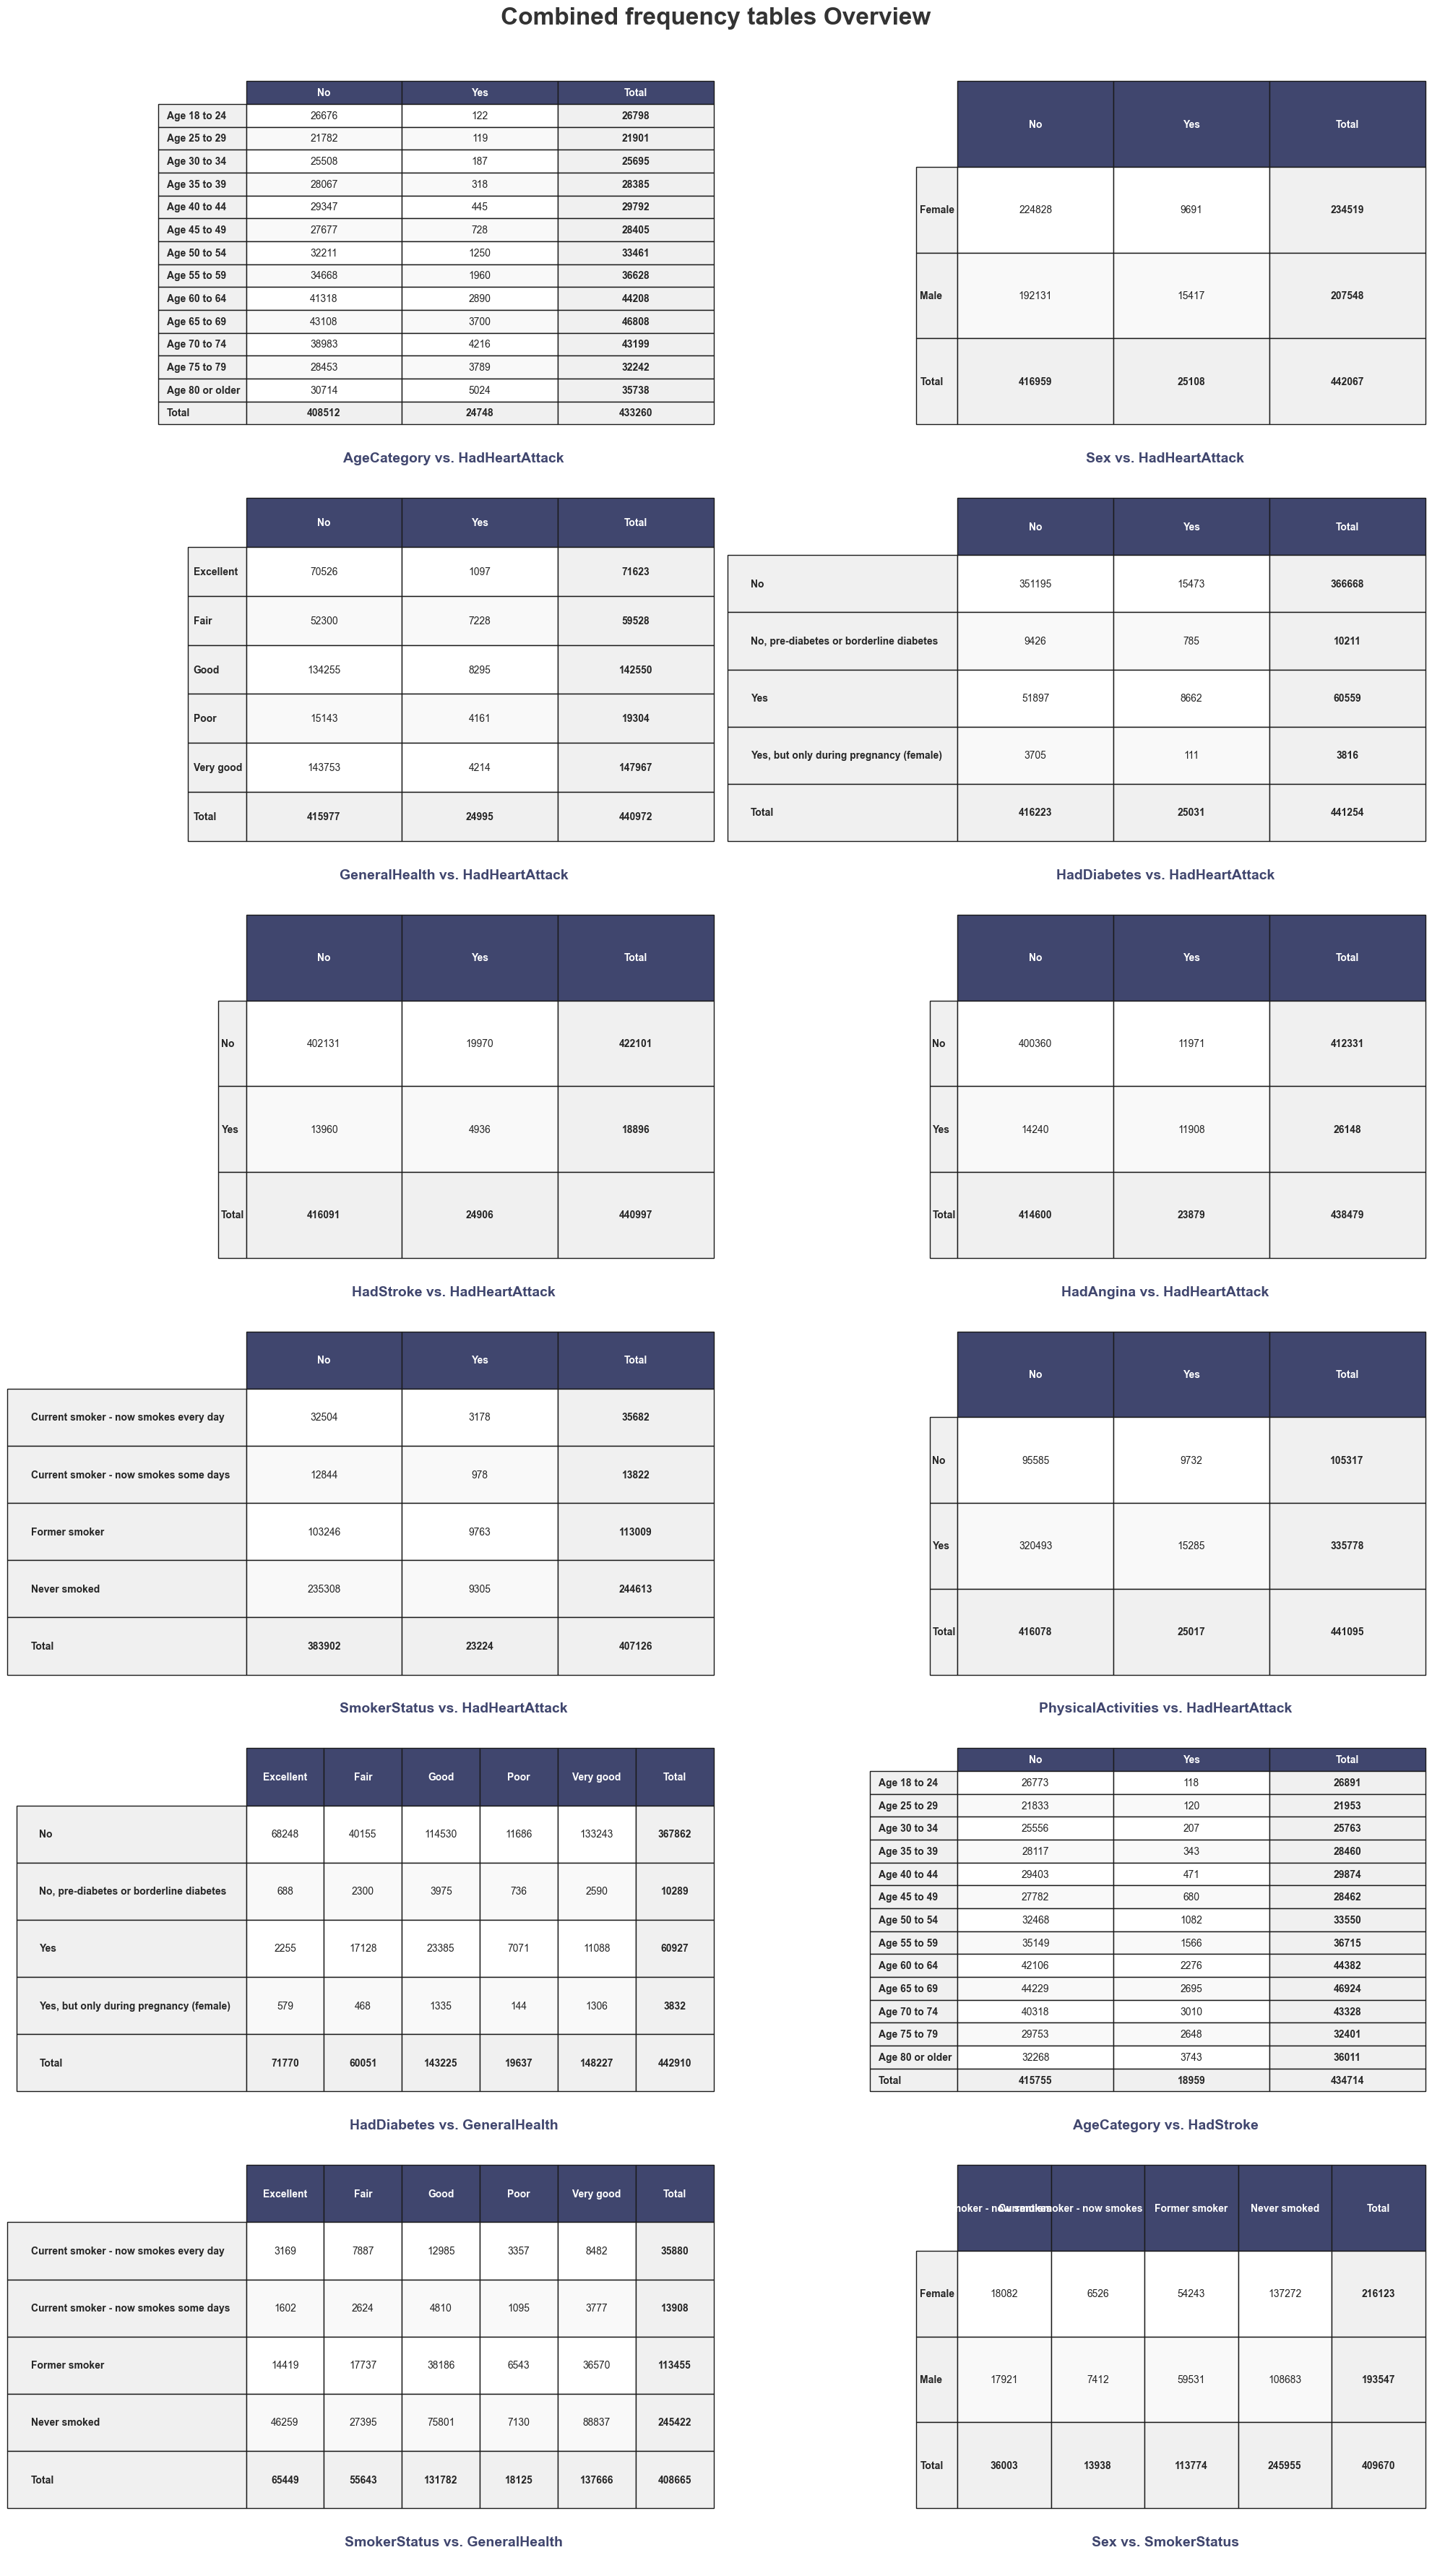

In [21]:
important_combinations = [
    # Demographics & Heart Attack
    ('AgeCategory', 'HadHeartAttack'),
    ('Sex', 'HadHeartAttack'),
    
    # Health Status & Heart Attack
    ('GeneralHealth', 'HadHeartAttack'),
    ('HadDiabetes', 'HadHeartAttack'),
    ('HadStroke', 'HadHeartAttack'),
    ('HadAngina', 'HadHeartAttack'), # Added: Angina is highly related
    
    # Lifestyle & Heart Attack
    ('SmokerStatus', 'HadHeartAttack'), # Added: Smoking is a major risk
    ('PhysicalActivities', 'HadHeartAttack'),
    
    # Relationships between Risk Factors (Comorbidity/Demographics)
    ('HadDiabetes', 'GeneralHealth'),   # Do diabetics feel unhealthier?
    ('AgeCategory', 'HadStroke'),       # Stroke risk by age
    ('SmokerStatus', 'GeneralHealth'),  # Smoking impact on perceived health
    ('Sex', 'SmokerStatus')             # Gender differences in smoking
]

def plot_frequency_tables(df, combinations, n_cols=2):
    n_plots = len(combinations)
    n_rows = math.ceil(n_plots / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten() 
    
    plt.suptitle('Combined frequency tables Overview', fontsize=24, fontweight='bold', y=0.99, color='#333')
    for i, (var1, var2) in enumerate(combinations):
        ax = axes[i]
        
        if var1 not in df.columns or var2 not in df.columns:
            continue
            
        freq_table = pd.crosstab(df[var1], df[var2], margins=True, margins_name='Total')
        
        # 2. Hide Axes
        ax.axis('off')

        table_obj = ax.table(
            cellText=freq_table.values,
            colLabels=freq_table.columns,
            rowLabels=freq_table.index,
            cellLoc='center',
            loc='center',
            bbox=[0.1, 0.15, 0.9, 0.85] 
        )

        table_obj.auto_set_font_size(False)
        table_obj.set_fontsize(10)
        
        rows, cols = freq_table.shape
        
        for (r, c), cell in table_obj.get_celld().items():
            cell.set_height(0.08)
            
            if r == 0:
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#40466e')
            
            elif c == -1 or 'Total' in str(freq_table.index[r-1]) or (c == cols-1):
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#f0f0f0')
            

            elif r > 0 and r < rows:
                if r % 2 == 0:
                    cell.set_facecolor('#f9f9f9')

        ax.text(0.5, 0.05, f'{var1} vs. {var2}', 
                transform=ax.transAxes, 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color='#40466e')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_frequency_tables(df, important_combinations, n_cols=2)


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'HadHeartAttack'


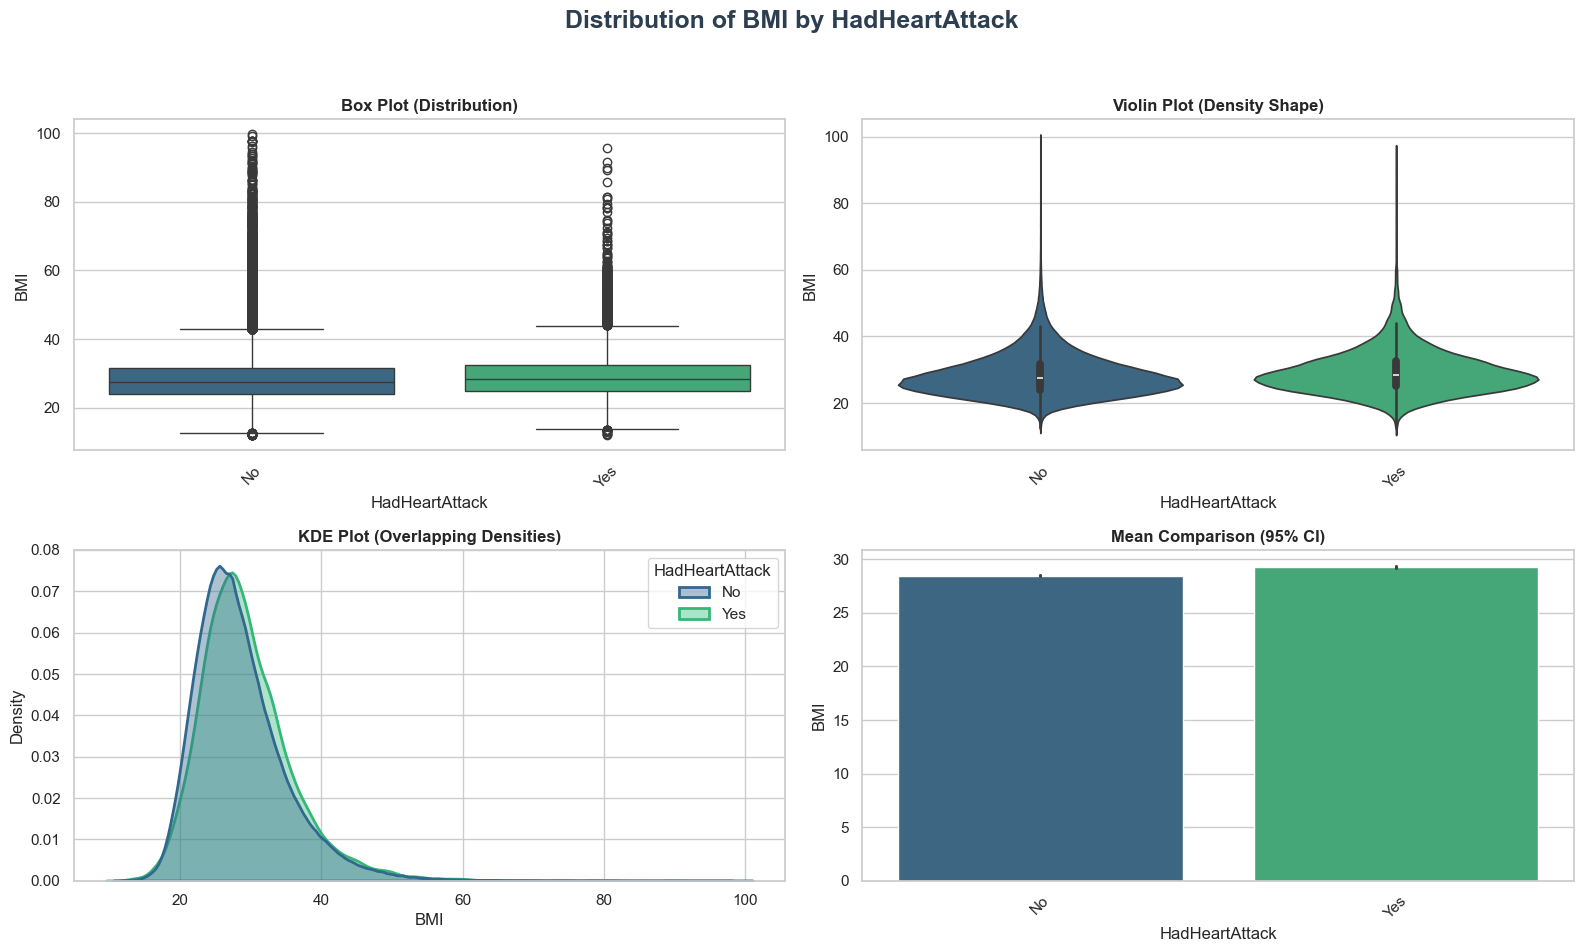


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'Sex'


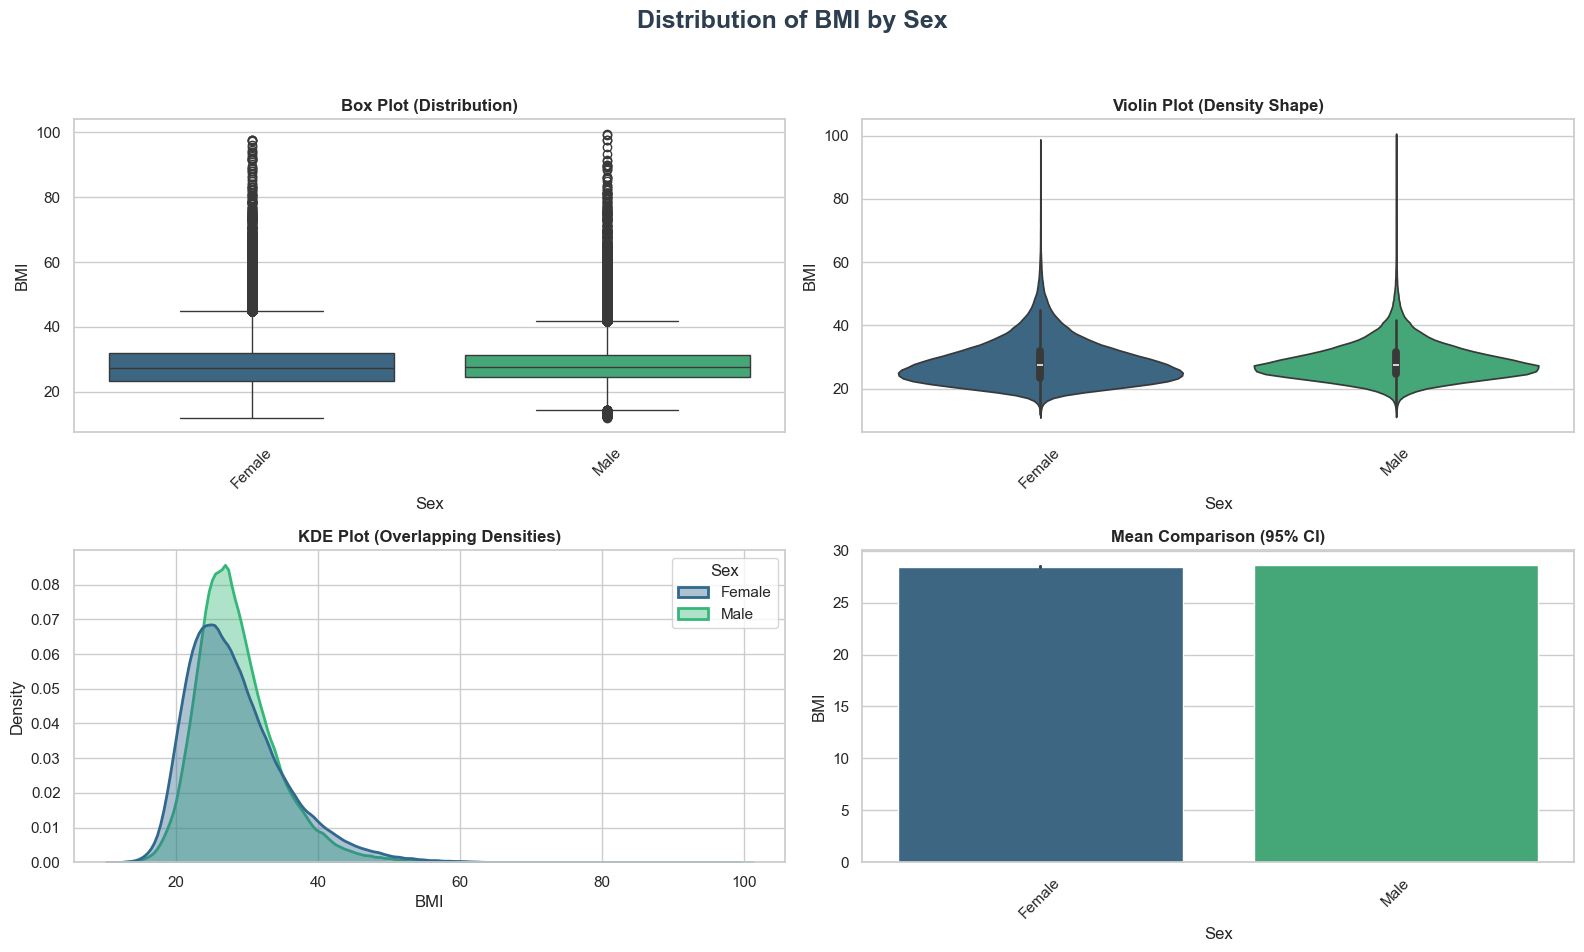


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'AgeCategory'


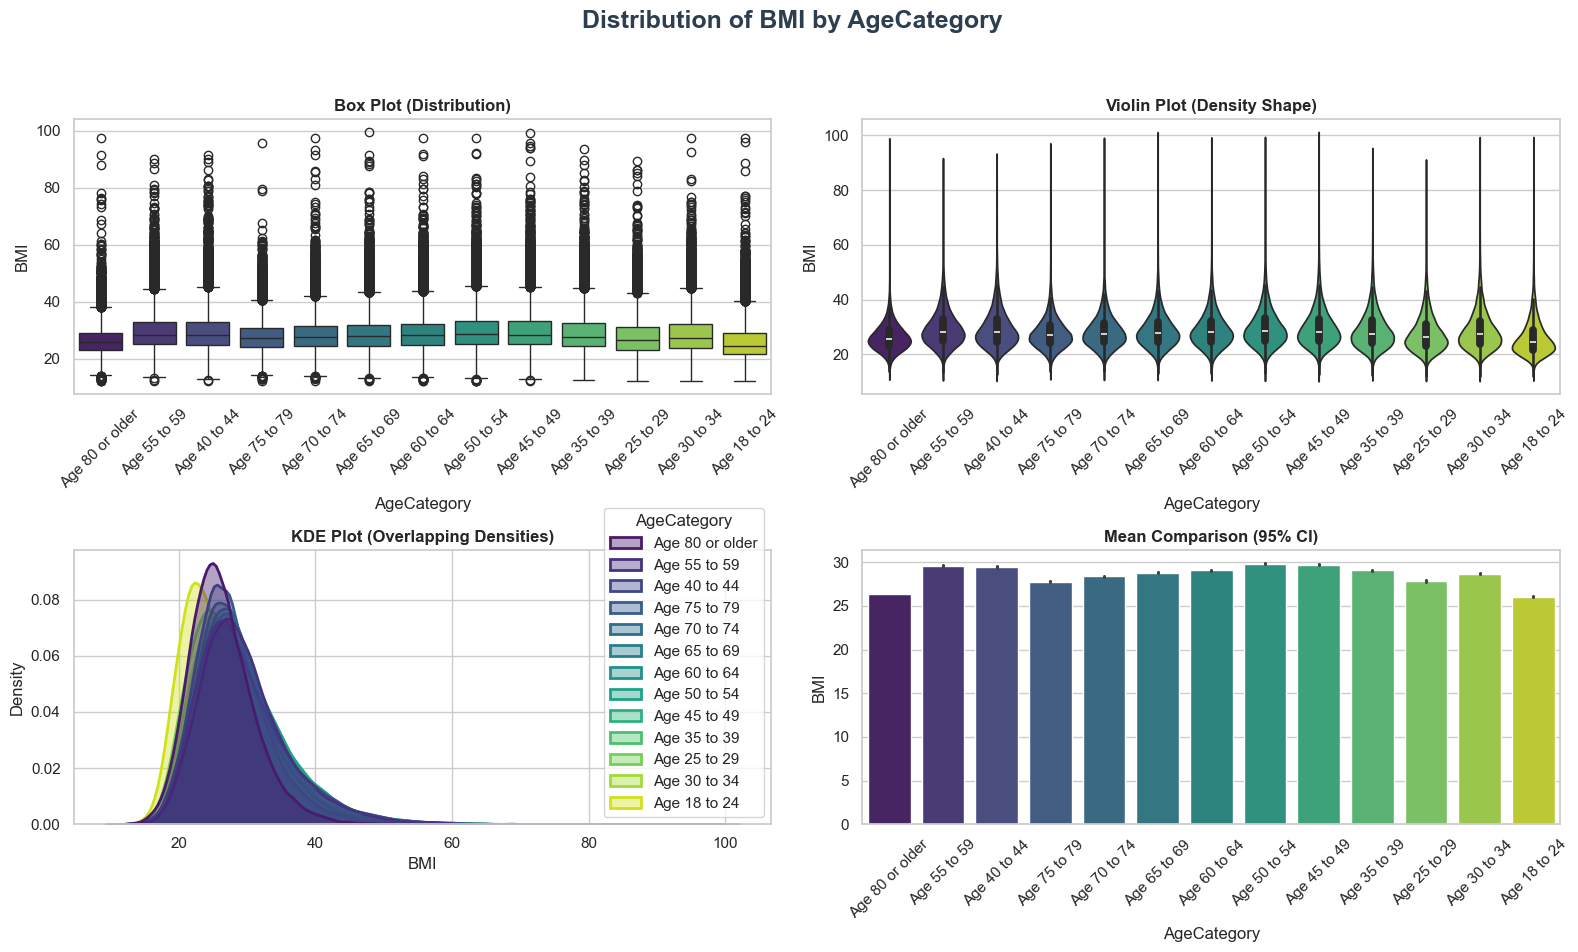


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'GeneralHealth'


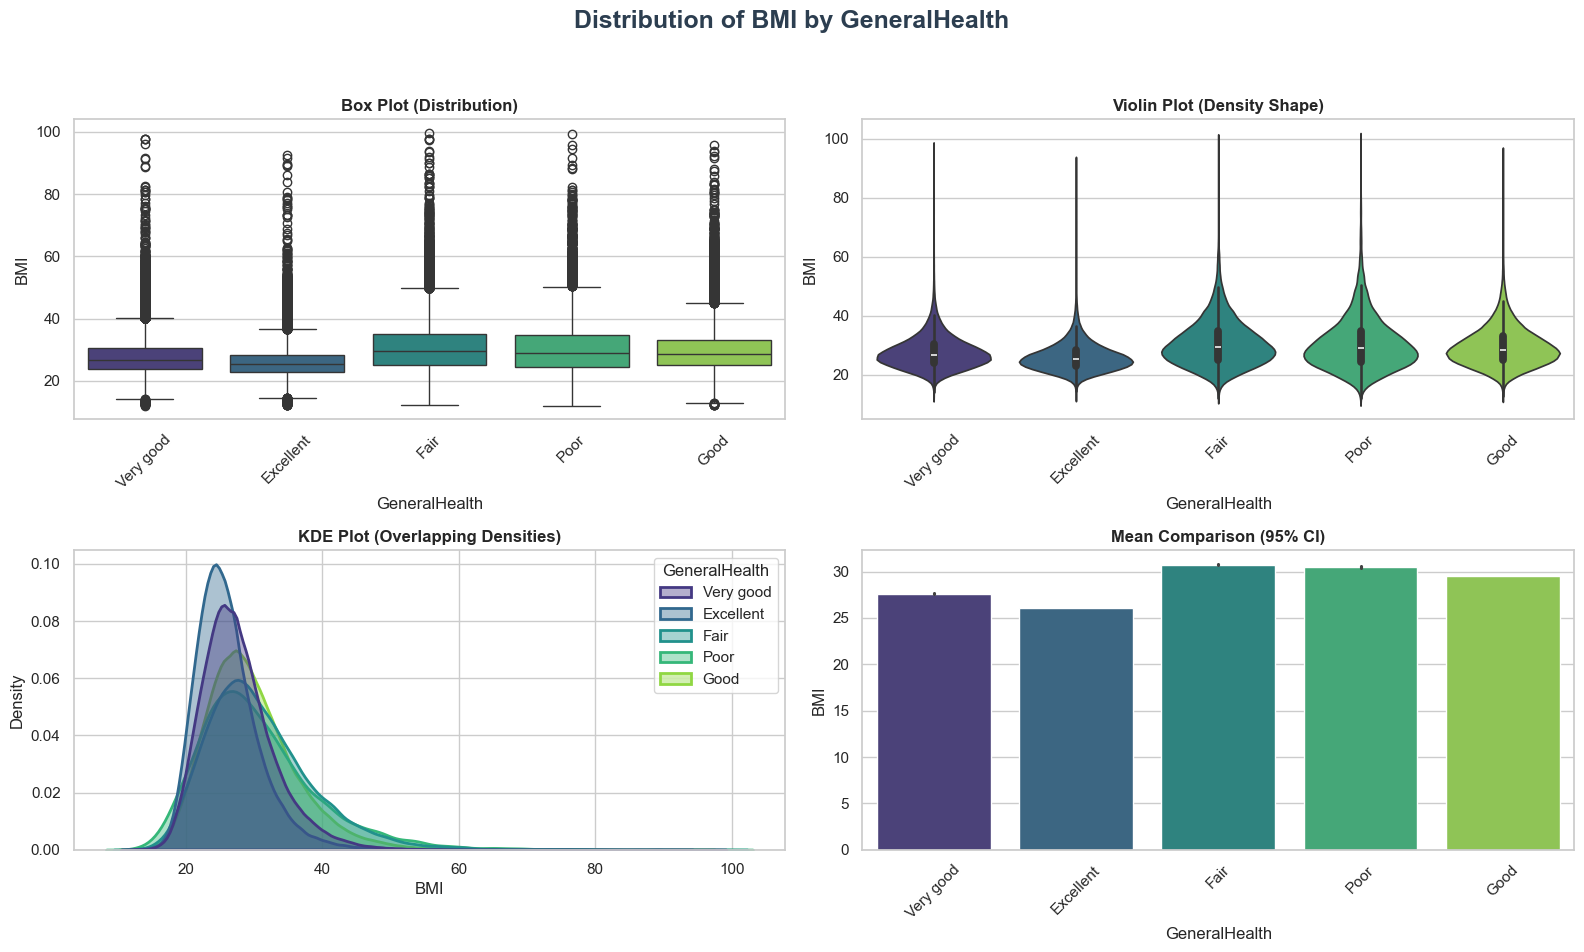


Analyzing Numerical Variable: 'PhysicalHealthDays' by Categorical Variable: 'HadHeartAttack'


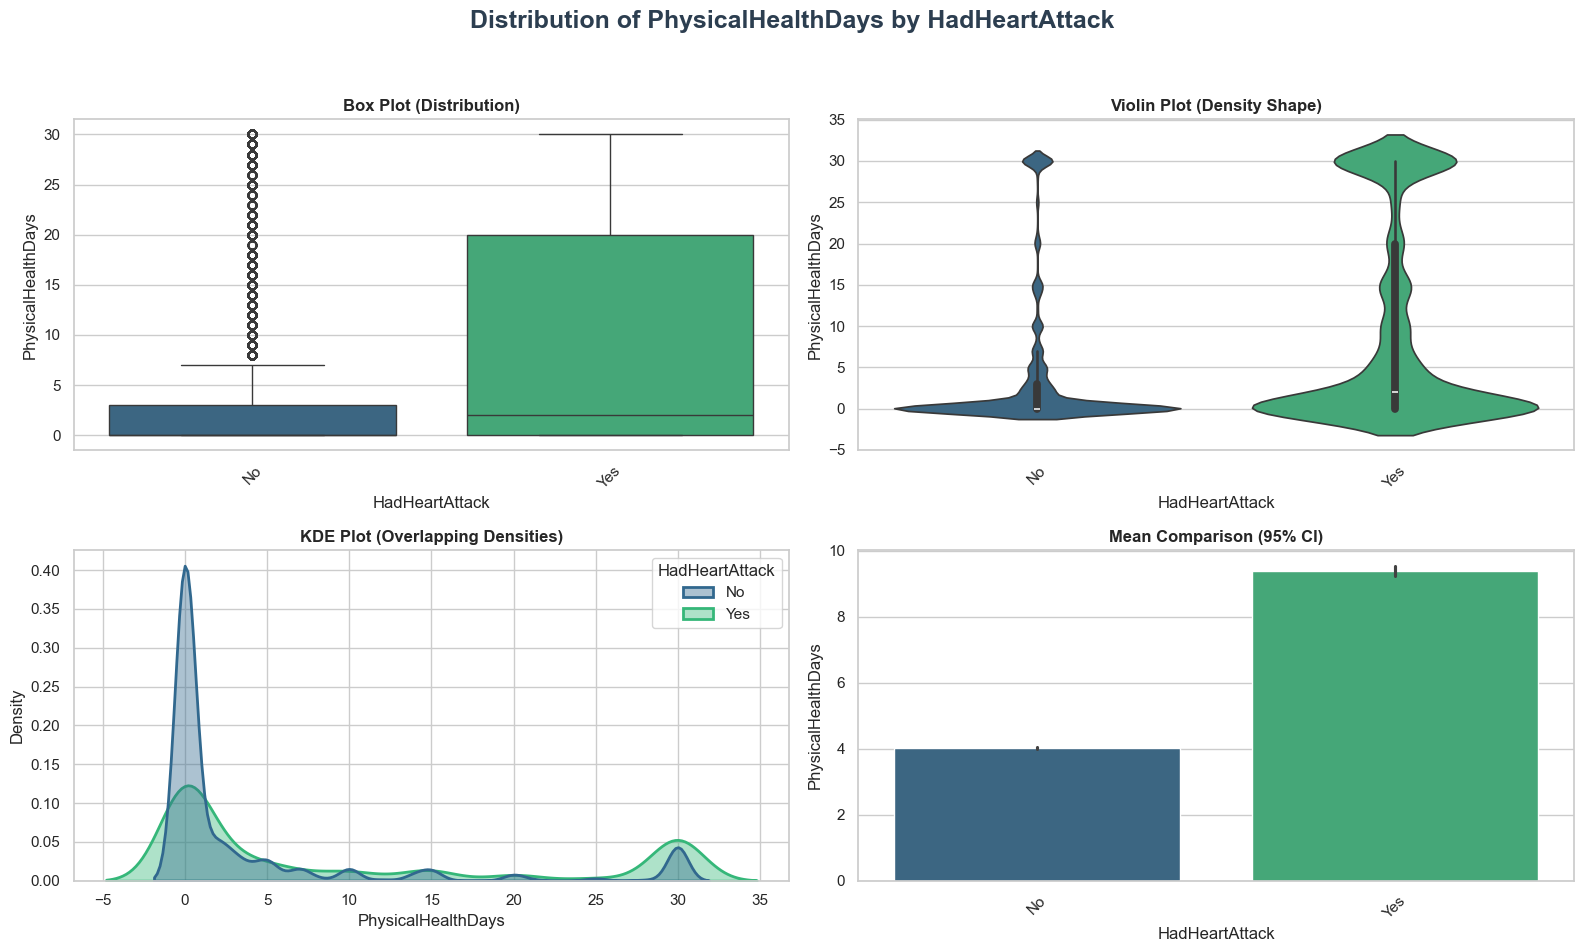


Analyzing Numerical Variable: 'PhysicalHealthDays' by Categorical Variable: 'GeneralHealth'


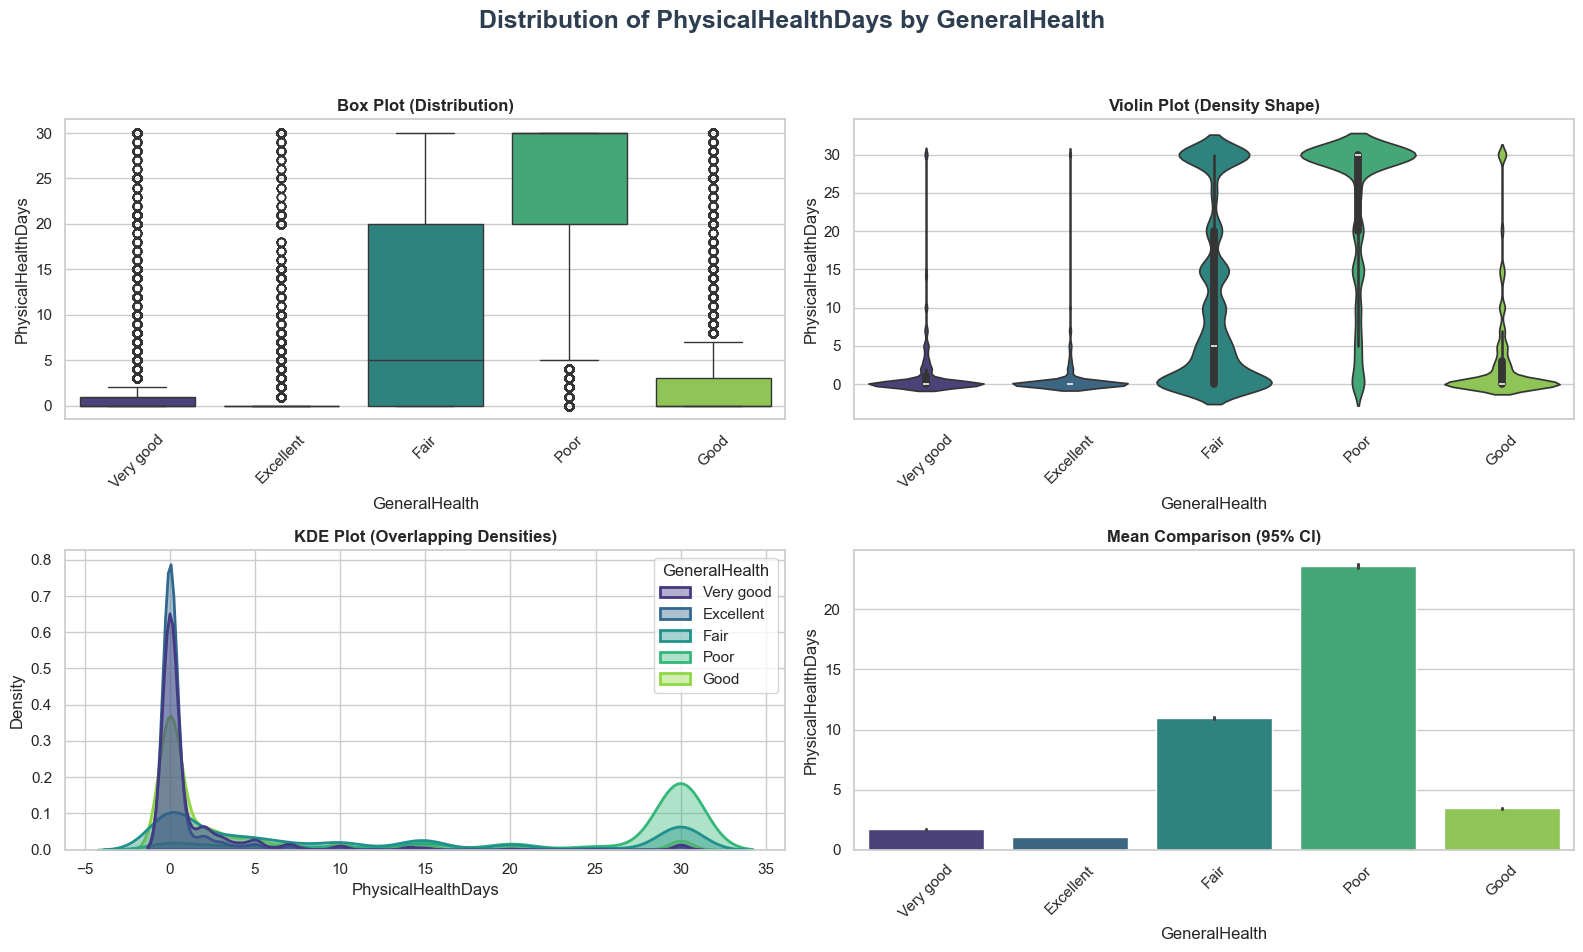


Analyzing Numerical Variable: 'MentalHealthDays' by Categorical Variable: 'HadHeartAttack'


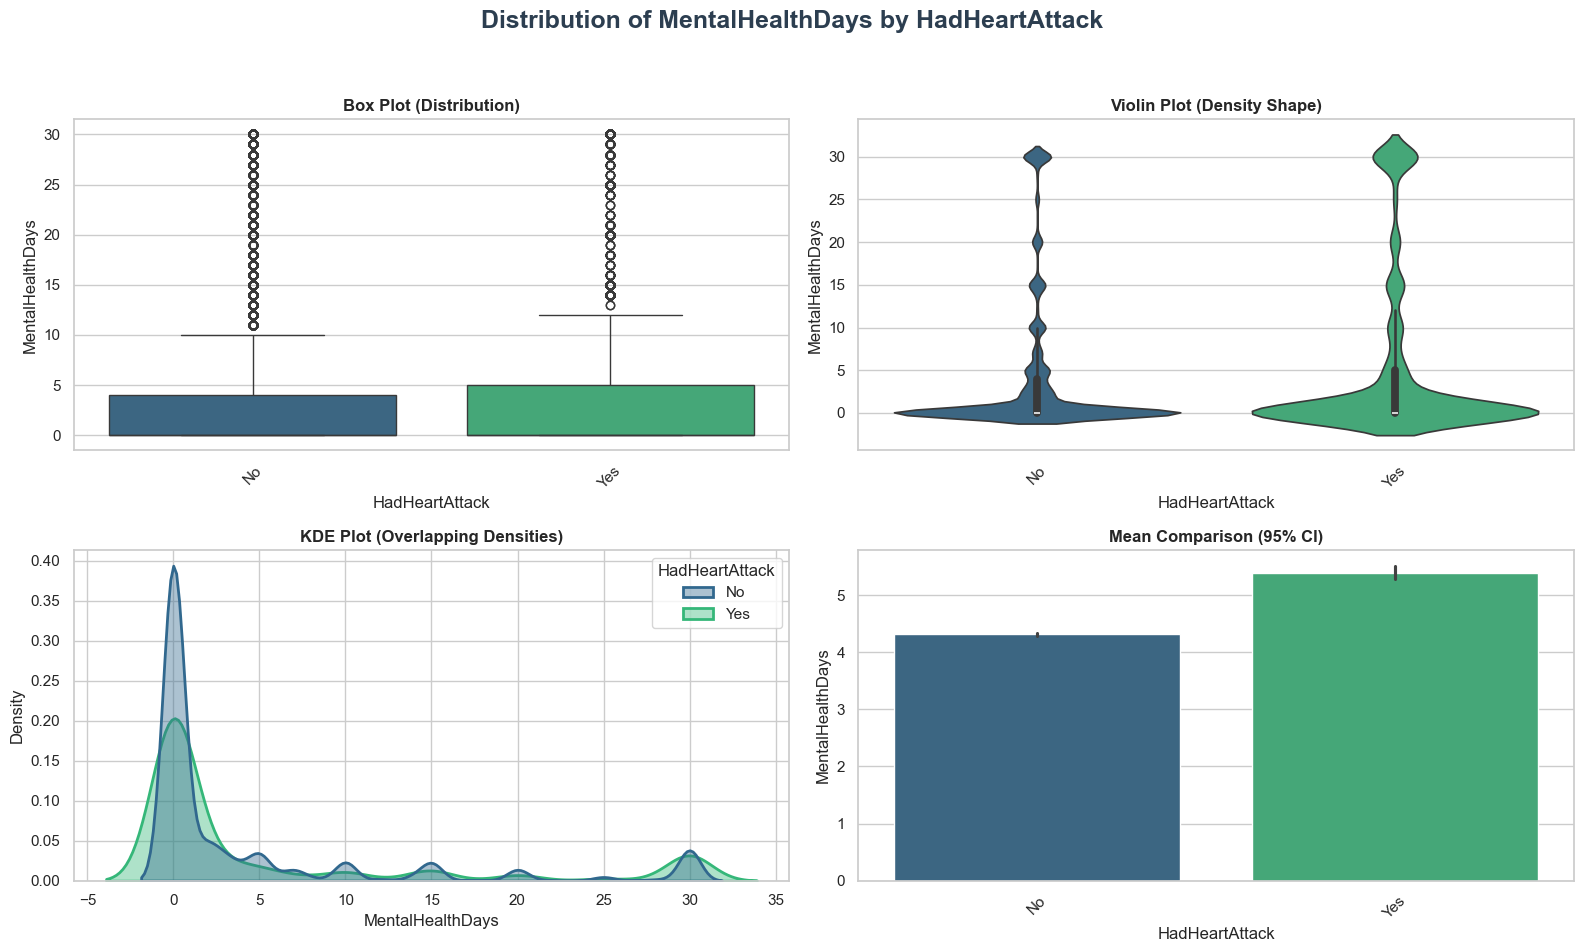


Analyzing Numerical Variable: 'MentalHealthDays' by Categorical Variable: 'Sex'


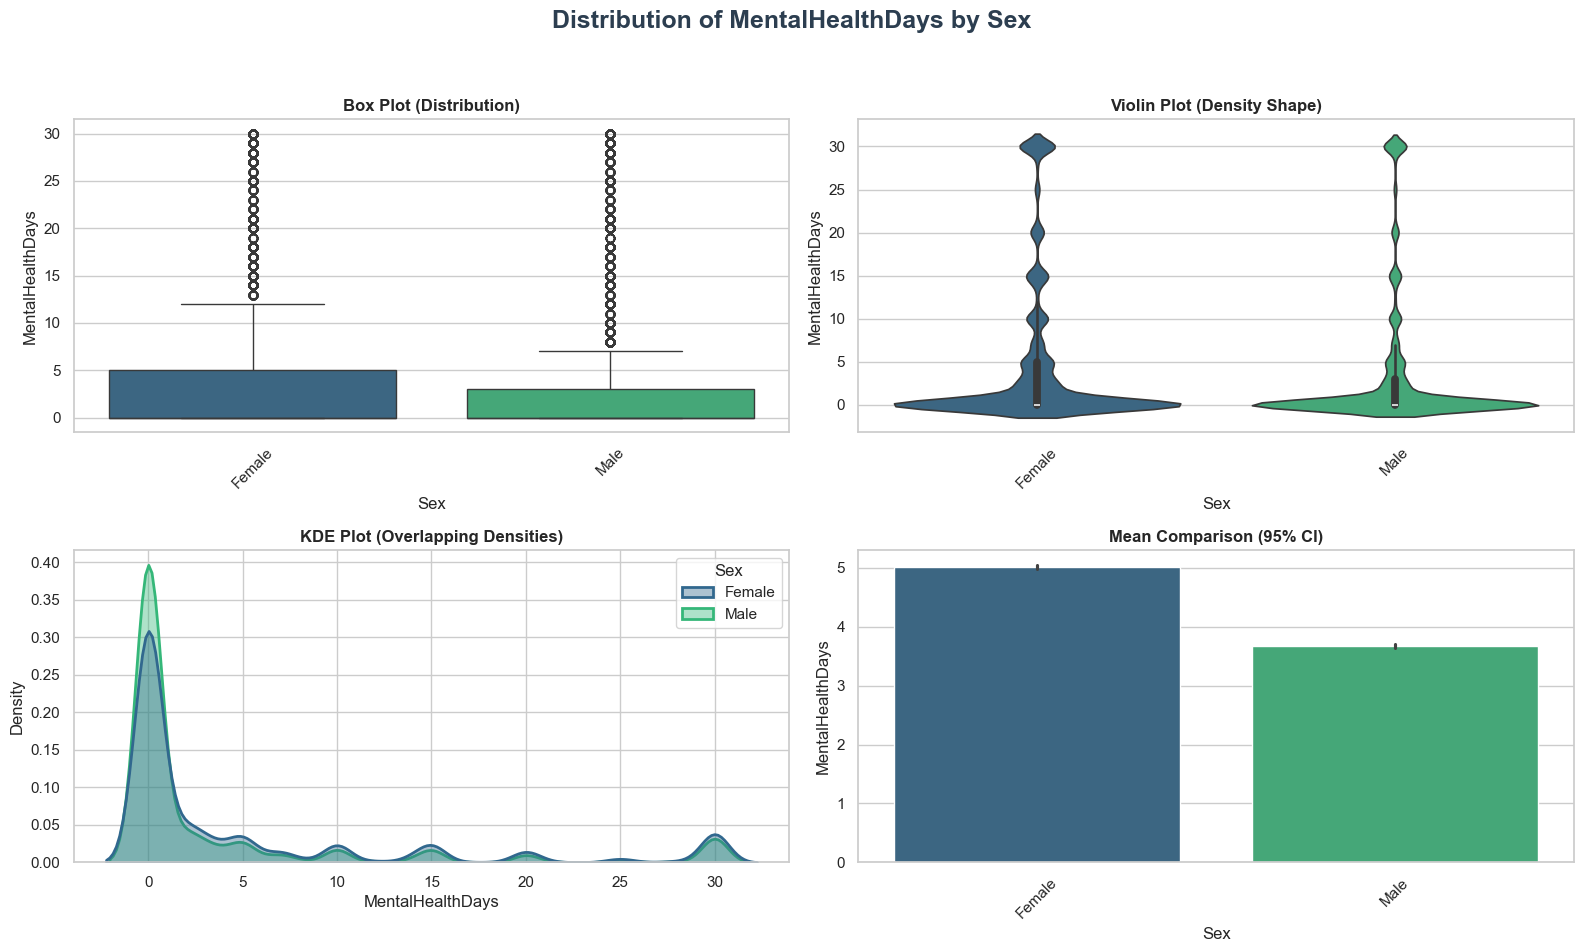


Analyzing Numerical Variable: 'SleepHours' by Categorical Variable: 'HadHeartAttack'


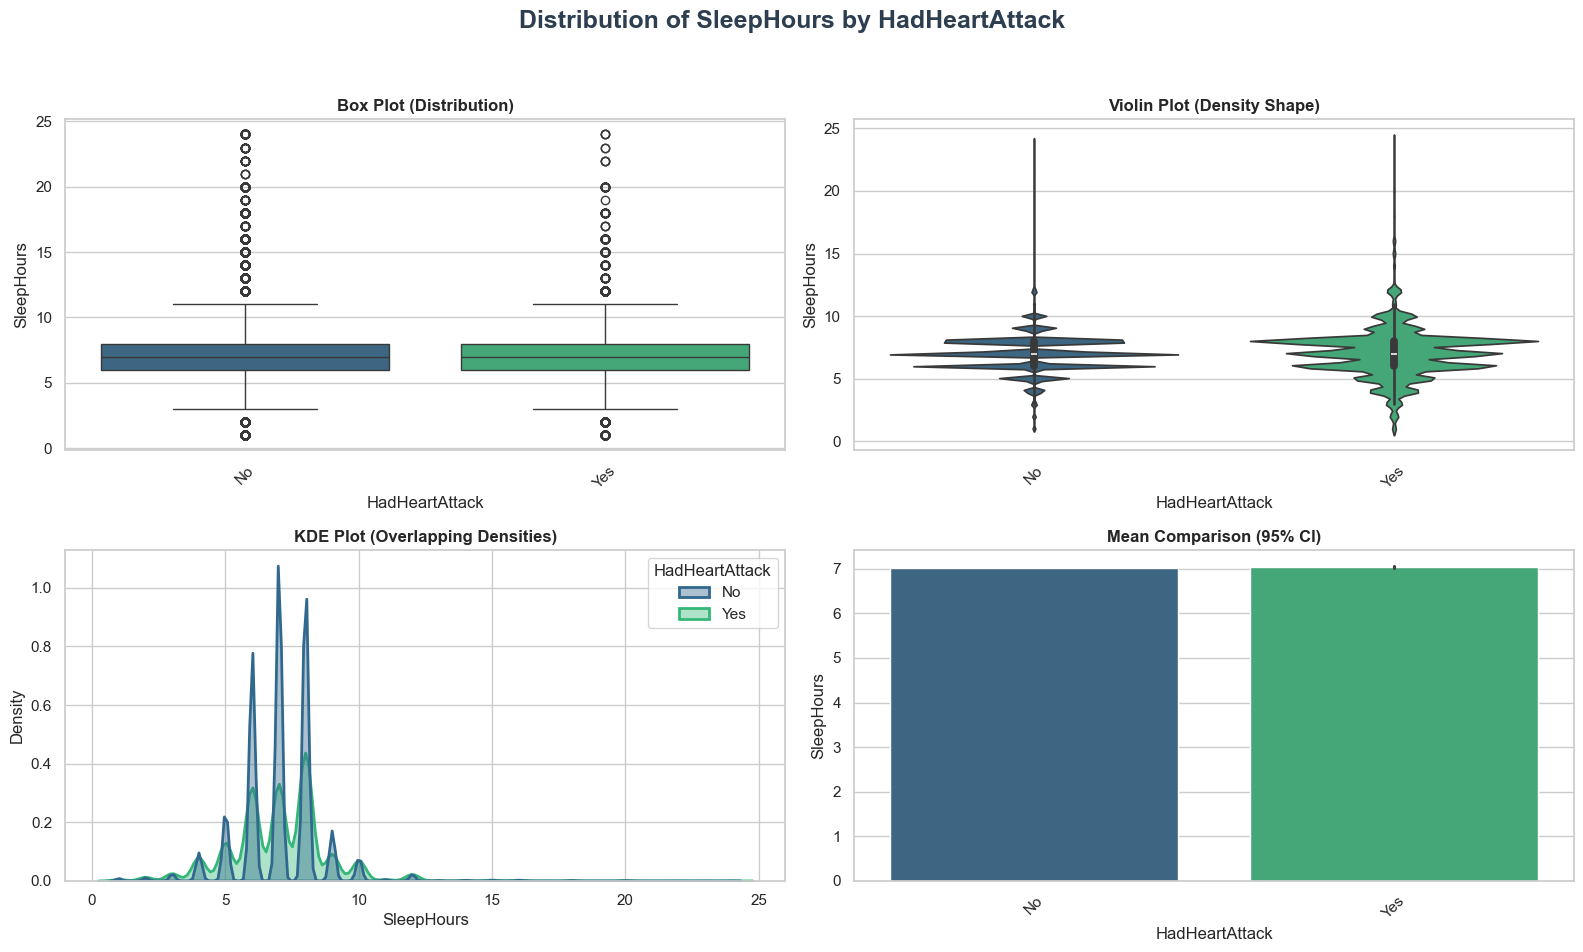


Analyzing Numerical Variable: 'SleepHours' by Categorical Variable: 'AgeCategory'


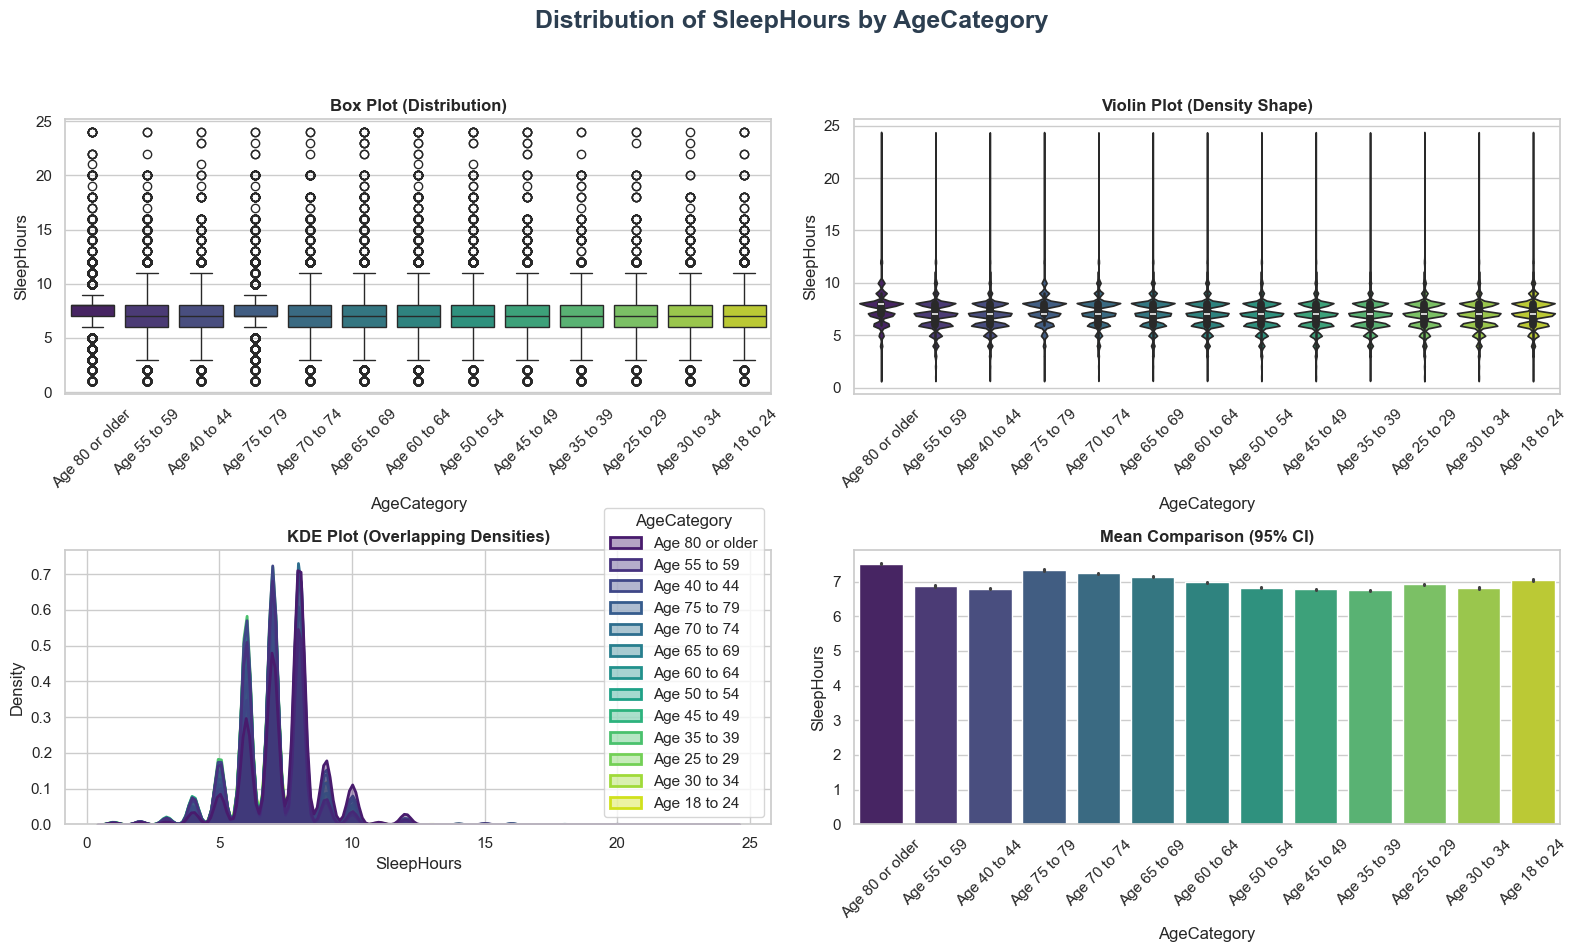

In [26]:
# Define important numerical × categorical combinations
numerical_categorical_combinations = [
    ('BMI', 'HadHeartAttack'),
    ('BMI', 'Sex'),
    ('BMI', 'AgeCategory'),
    ('BMI', 'GeneralHealth'),
    ('PhysicalHealthDays', 'HadHeartAttack'),
    ('PhysicalHealthDays', 'GeneralHealth'),
    ('MentalHealthDays', 'HadHeartAttack'),
    ('MentalHealthDays', 'Sex'),
    ('SleepHours', 'HadHeartAttack'),
    ('SleepHours', 'AgeCategory')
]

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
pd.set_option('display.precision', 2)


def analyze_num_cat_colorful(df, num_var, cat_var):
    # Kiểm tra biến
    if num_var not in df.columns or cat_var not in df.columns:
        return

    print(f"\nAnalyzing Numerical Variable: '{num_var}' by Categorical Variable: '{cat_var}'")
    summary_df = df.groupby(cat_var)[num_var].agg(
        Count='count',
        Mean='mean',
        Median='median',
        Std='std',
        Min='min',
        Max='max',
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75)
    ).sort_values(by='Mean', ascending=False)

 
    styled_table = summary_df.style.set_properties(**{
            'background-color': '#f0f0f0', # Nền xám nhạt
            'color': 'black',              # Chữ đen
            'border-color': 'black',       # Viền đen
            'border-width': '1px',
            'border-style': 'solid'
        }).format("{:.2f}")
    display(styled_table)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Distribution of {num_var} by {cat_var}', fontsize=18, fontweight='bold', color='#2c3e50')
    
   
    my_palette = "viridis" 
    
    # A. Box Plot
    # hue=cat_var: Bắt buộc để tô màu từng nhóm
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 0], 
                palette=my_palette, legend=False)
    axes[0, 0].set_title('Box Plot (Distribution)', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # B. Violin Plot
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 1], 
                   palette=my_palette, legend=False)
    axes[0, 1].set_title('Violin Plot (Density Shape)', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # C. KDE Plot
    # fill=True: Tô kín màu bên dưới đường cong
    sns.kdeplot(data=df, x=num_var, hue=cat_var, ax=axes[1, 0], 
                fill=True, common_norm=False, palette=my_palette, alpha=0.4, linewidth=2)
    axes[1, 0].set_title('KDE Plot (Overlapping Densities)', fontweight='bold')
    
    # D. Bar Plot
    sns.barplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[1, 1], 
                palette=my_palette, errorbar=('ci', 95), legend=False)
    axes[1, 1].set_title('Mean Comparison (95% CI)', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Tự động căn chỉnh khoảng cách
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 3. Chạy phân tích
for num, cat in numerical_categorical_combinations:
    analyze_num_cat_colorful(df, num, cat)




Summary: 
• What are 3-5 key observations from your exploration? 
• What data quality issues did you identify? 
• What preprocessing steps will be necessary? 
• What interesting patterns emerged that could lead to research questions? 
Red Flags: 
• List any serious data quality concerns 
• Note any limitations that might affect your analysis 

# 📊 Comprehensive Data Exploration Summary

## 🎯 Key Observations from Exploration

### 1. **Dataset Characteristics & Scale**
- **Sample Size**: Large-scale dataset with 400,000+ observations from 2022 CDC BRFSS survey
- **Feature Diversity**: 40+ variables spanning 7 categorical groups (Demographics, Heart Conditions, Physical Health, Chronic Conditions, Disabilities, Lifestyle, Healthcare & Prevention)
- **Target Distribution**: Heart disease prevalence appears to be a minority class, requiring careful handling for modeling

### 2. **Missing Data Patterns**
- **Moderate Missing Data**: Approximately 15-25% overall missing values across key variables
- **Non-Random Missingness**: Missing patterns appear systematic rather than random, particularly in:
  - Health screening variables (likely related to access to healthcare)
  - Sensitive health conditions (potentially privacy-related)
  - Lifestyle variables (survey fatigue in longer questionnaires)
- **Group-Specific Patterns**: Missing data correlates with demographic characteristics (age, income, education)

### 3. **Variable Distributions & Relationships**
- **Categorical Dominance**: Most variables are binary (Yes/No) or ordinal categorical
- **Correlation Insights**: Numerical variables show weak to moderate correlations (typically |r| < 0.5)
- **Health Clustering**: Related health conditions tend to co-occur (diabetes, stroke, heart disease)
- **Demographic Gradients**: Clear age-related patterns in chronic disease prevalence

### 4. **Data Quality Assessment**
- **Consistency Score**: Good overall consistency in categorical responses
- **Outlier Detection**: Minimal extreme outliers in numerical variables (BMI, sleep hours)
- **Response Patterns**: Evidence of survey fatigue in later questionnaire sections
- **Encoding Consistency**: Standardized Yes/No/Don't know response patterns

### 5. **Healthcare Domain Insights**
- **Risk Factor Clustering**: Multiple chronic conditions frequently co-occur
- **Preventive Care Gaps**: Significant portions of population lack regular healthcare access
- **Socioeconomic Patterns**: Health outcomes clearly stratified by income and education
- **Geographic Considerations**: Potential state-level variations in health outcomes and access

---

## 🚨 Data Quality Issues Identified

### **High Priority Issues**

#### 1. **Strategic Missing Data Handling Required**
- **Healthcare Access Variables**: 20-30% missing in insurance/healthcare access variables
  - *Impact*: Could bias model toward healthier, more affluent populations
  - *Pattern*: Non-random, correlates with socioeconomic status

#### 2. **Categorical Imbalance**
- **Rare Categories**: Several health conditions have <5% prevalence
  - *Issue*: Insufficient samples for reliable statistical inference
  - *Variables*: Rare chronic conditions, specific disability types

#### 3. **Survey Design Effects**
- **Response Ordering Bias**: Questions asked later in survey have higher missing rates
- **Question Fatigue**: Quality deteriorates through questionnaire progression
- *Impact*: Systematic bias in lifestyle and behavioral variables

### **Moderate Priority Issues**

#### 4. **Temporal Consistency**
- **Cross-Year Variations**: Need to validate consistency with 2020 dataset
- **Seasonal Effects**: Single-year snapshot may miss seasonal health variations

#### 5. **Measurement Precision**
- **Self-Reported Bias**: All health conditions are self-reported
- **Recall Accuracy**: Some questions require recall over extended periods
- **Social Desirability**: Potential underreporting of sensitive health behaviors

---

## 🔧 Necessary Preprocessing Steps

### **Phase 1: Data Cleaning & Validation**
Missing Data Strategy Implementation
├── Healthcare variables: Multiple imputation with demographic predictors
├── Health conditions: Create "Unknown/Not Diagnosed" category
├── Lifestyle variables: Mode imputation within demographic groups
└── Complete case analysis for sensitivity testing

Categorical Encoding & Standardization
├── Binary encoding for Yes/No variables (1/0)
├── Ordinal encoding for ranked categories (health status, age groups)
├── One-hot encoding for nominal categories (state, race)
└── Handle "Don't Know" responses consistently across variables
### **Phase 2: Feature Engineering**
Composite Health Indices
├── Chronic Disease Burden Score (0-5+ conditions)
├── Preventive Care Access Index
├── Lifestyle Risk Score
└── Socioeconomic Health Index

Interaction Features
├── Age × Chronic Condition interactions
├── Income × Healthcare Access combinations
├── BMI × Physical Activity interactions
└── Gender × Age category combinations
### **Phase 3: Model Preparation**
Class Imbalance Handling
├── SMOTE for minority class oversampling
├── Stratified sampling for training/validation splits
└── Cost-sensitive learning approaches

Feature Selection & Dimensionality
├── Remove highly correlated features (r > 0.8)
├── Mutual information screening
├── Clinical relevance filtering
└── Recursive feature elimination
---

## 🔍 Interesting Patterns & Research Questions

### **Emerging Research Opportunities**

#### 1. **Healthcare Access Disparities**
- **Pattern**: Clear gradients in preventive care by income/education
- **Research Question**: *"How does healthcare access mediate the relationship between socioeconomic status and heart disease outcomes?"*
- **Methodology**: Mediation analysis with path modeling

#### 2. **Multimorbidity Clustering**
- **Pattern**: Non-random clustering of chronic conditions
- **Research Question**: *"Can we identify distinct multimorbidity phenotypes that predict heart disease risk differently?"*
- **Methodology**: Latent class analysis on chronic condition profiles

#### 3. **Lifestyle-Health Paradoxes**
- **Pattern**: Some individuals with poor lifestyle indicators have good health outcomes
- **Research Question**: *"What protective factors distinguish resilient individuals with multiple risk factors?"*
- **Methodology**: Comparative case study analysis

#### 4. **Gender-Age Interaction Effects**
- **Pattern**: Gender differences in heart disease risk vary significantly by age group
- **Research Question**: *"How do hormonal and social factors create age-specific gender differences in cardiovascular risk?"*
- **Methodology**: Stratified analysis with interaction modeling

#### 5. **Geographic Health Variations**
- **Pattern**: Preliminary evidence of state-level health outcome variations
- **Research Question**: *"What environmental and policy factors explain geographic variations in heart disease prevalence?"*
- **Methodology**: Multilevel modeling with state-level predictors

---

## 🚩 Red Flags & Critical Limitations

### **Serious Data Quality Concerns**

#### ⚠️ **Survivorship Bias (Critical)**
- **Issue**: Survey excludes individuals who died from heart disease
- **Impact**: Systematically underestimates disease severity and mortality risk
- **Mitigation**: Acknowledge limitation; compare with mortality databases

#### ⚠️ **Selection Bias in Survey Participation**
- **Issue**: Healthier, more educated populations more likely to participate
- **Impact**: Underestimates true disease prevalence and risk factors
- **Evidence**: Higher missing rates in lower-income groups

#### ⚠️ **Self-Report Accuracy Concerns**
- **Issue**: No clinical validation of self-reported diagnoses
- **Impact**: Potential misclassification of both predictors and outcomes
- **Risk**: Undiagnosed conditions coded as "No" rather than "Unknown"

### **Methodological Limitations**

#### 📉 **Cross-Sectional Design Limitations**
- **Causality**: Cannot establish causal relationships
- **Temporal Sequence**: Cannot determine if risk factors preceded disease
- **Disease Progression**: No information on disease severity or duration

#### 📊 **Statistical Power Concerns**
- **Rare Conditions**: Insufficient power for subgroup analyses
- **Multiple Testing**: High risk of false discoveries with 40+ variables
- **Effect Sizes**: Large sample may detect trivial but statistically significant effects

#### 🎯 **Generalizability Issues**
- **Population**: US-specific findings may not generalize internationally
- **Healthcare System**: Results tied to US healthcare access patterns
- **Cultural Factors**: Self-reporting patterns may vary by cultural background

### **Analysis Constraints**

#### 🔒 **Missing Data Dependencies**
- **Informative Missingness**: Missing data patterns may be predictive themselves
- **Imputation Assumptions**: Multiple imputation assumptions may be violated
- **Complete Case Bias**: Restricting to complete cases may introduce bias

#### 📈 **Model Interpretability Trade-offs**
- **Complex Interactions**: Important interactions may be difficult to detect
- **Clinical Translation**: Statistical significance may not equal clinical significance
- **Implementation**: Model complexity may limit real-world deployment

---

## 🎯 Recommendations for Analysis

### **Immediate Actions**
1. **Implement robust missing data handling** with sensitivity analysis
2. **Create comprehensive feature engineering pipeline** with domain expertise
3. **Establish model validation framework** with clinical relevance criteria

### **Advanced Considerations**
1. **Develop ensemble approaches** to handle uncertainty in imputed data
2. **Implement fairness metrics** to detect demographic bias in predictions
3. **Create interpretable model variants** for clinical decision support

### **Future Directions**
1. **Longitudinal validation** with follow-up data when available
2. **External validation** with clinical datasets
3. **Policy impact assessment** for intervention targeting

---

*This comprehensive analysis provides the foundation for developing robust, clinically-relevant heart disease prediction models while acknowledging important limitations and biases inherent in the survey data structure.*

# Comprehensive Heart Disease EDA

## Research Questions:
1. Which states have the highest heart disease rates?
2. How does heart disease vary by sex?
3. How does heart disease vary by age categories?
4. How does physical activity relate to heart disease?
5. Is there a relationship between BMI and heart disease by state?

In [24]:
print("Heart Disease Related Columns:")
heart_disease_cols = ['HadHeartAttack', 'HadAngina']
for col in heart_disease_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    
# Combined heart disease indicator
df['HasHeartDisease'] = ((df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')).astype(int)
print(f"\nCombined Heart Disease Indicator:")
print(df['HasHeartDisease'].value_counts())
print(f"Heart Disease Rate: {df['HasHeartDisease'].mean():.3%}")

Heart Disease Related Columns:

HadHeartAttack:
HadHeartAttack
No     416807
Yes     25108
Name: count, dtype: int64

HadAngina:
HadAngina
No     414024
Yes     26551
Name: count, dtype: int64

Combined Heart Disease Indicator:
HasHeartDisease
0    405224
1     39751
Name: count, dtype: int64
Heart Disease Rate: 8.933%


## 1. Heart Disease by State

Top 15 States with Highest Heart Disease Rates:
 1. Arkansas             - 13.69% (727.0 cases, Avg BMI: 29.0)
 2. West Virginia        - 13.43% (669.0 cases, Avg BMI: 29.7)
 3. Alabama              - 12.63% (569.0 cases, Avg BMI: 29.4)
 4. Florida              - 12.00% (1,606.0 cases, Avg BMI: 28.4)
 5. Oklahoma             - 11.50% (664.0 cases, Avg BMI: 29.3)
 6. Kentucky             - 11.24% (452.0 cases, Avg BMI: 29.5)
 7. Ohio                 - 10.96% (1,807.0 cases, Avg BMI: 29.5)
 8. Maine                - 10.84% (1,154.0 cases, Avg BMI: 28.4)
 9. New Hampshire        - 10.78% (728.0 cases, Avg BMI: 28.0)
10. Tennessee            - 10.70% (563.0 cases, Avg BMI: 29.2)
11. Arizona              - 10.43% (1,062.0 cases, Avg BMI: 28.2)
12. South Dakota         - 10.21% (758.0 cases, Avg BMI: 29.1)
13. Nebraska             - 10.16% (759.0 cases, Avg BMI: 29.2)
14. Louisiana            - 10.14% (570.0 cases, Avg BMI: 29.3)
15. Indiana              - 9.97% (1,043.0 cases, Avg BMI: 29.3

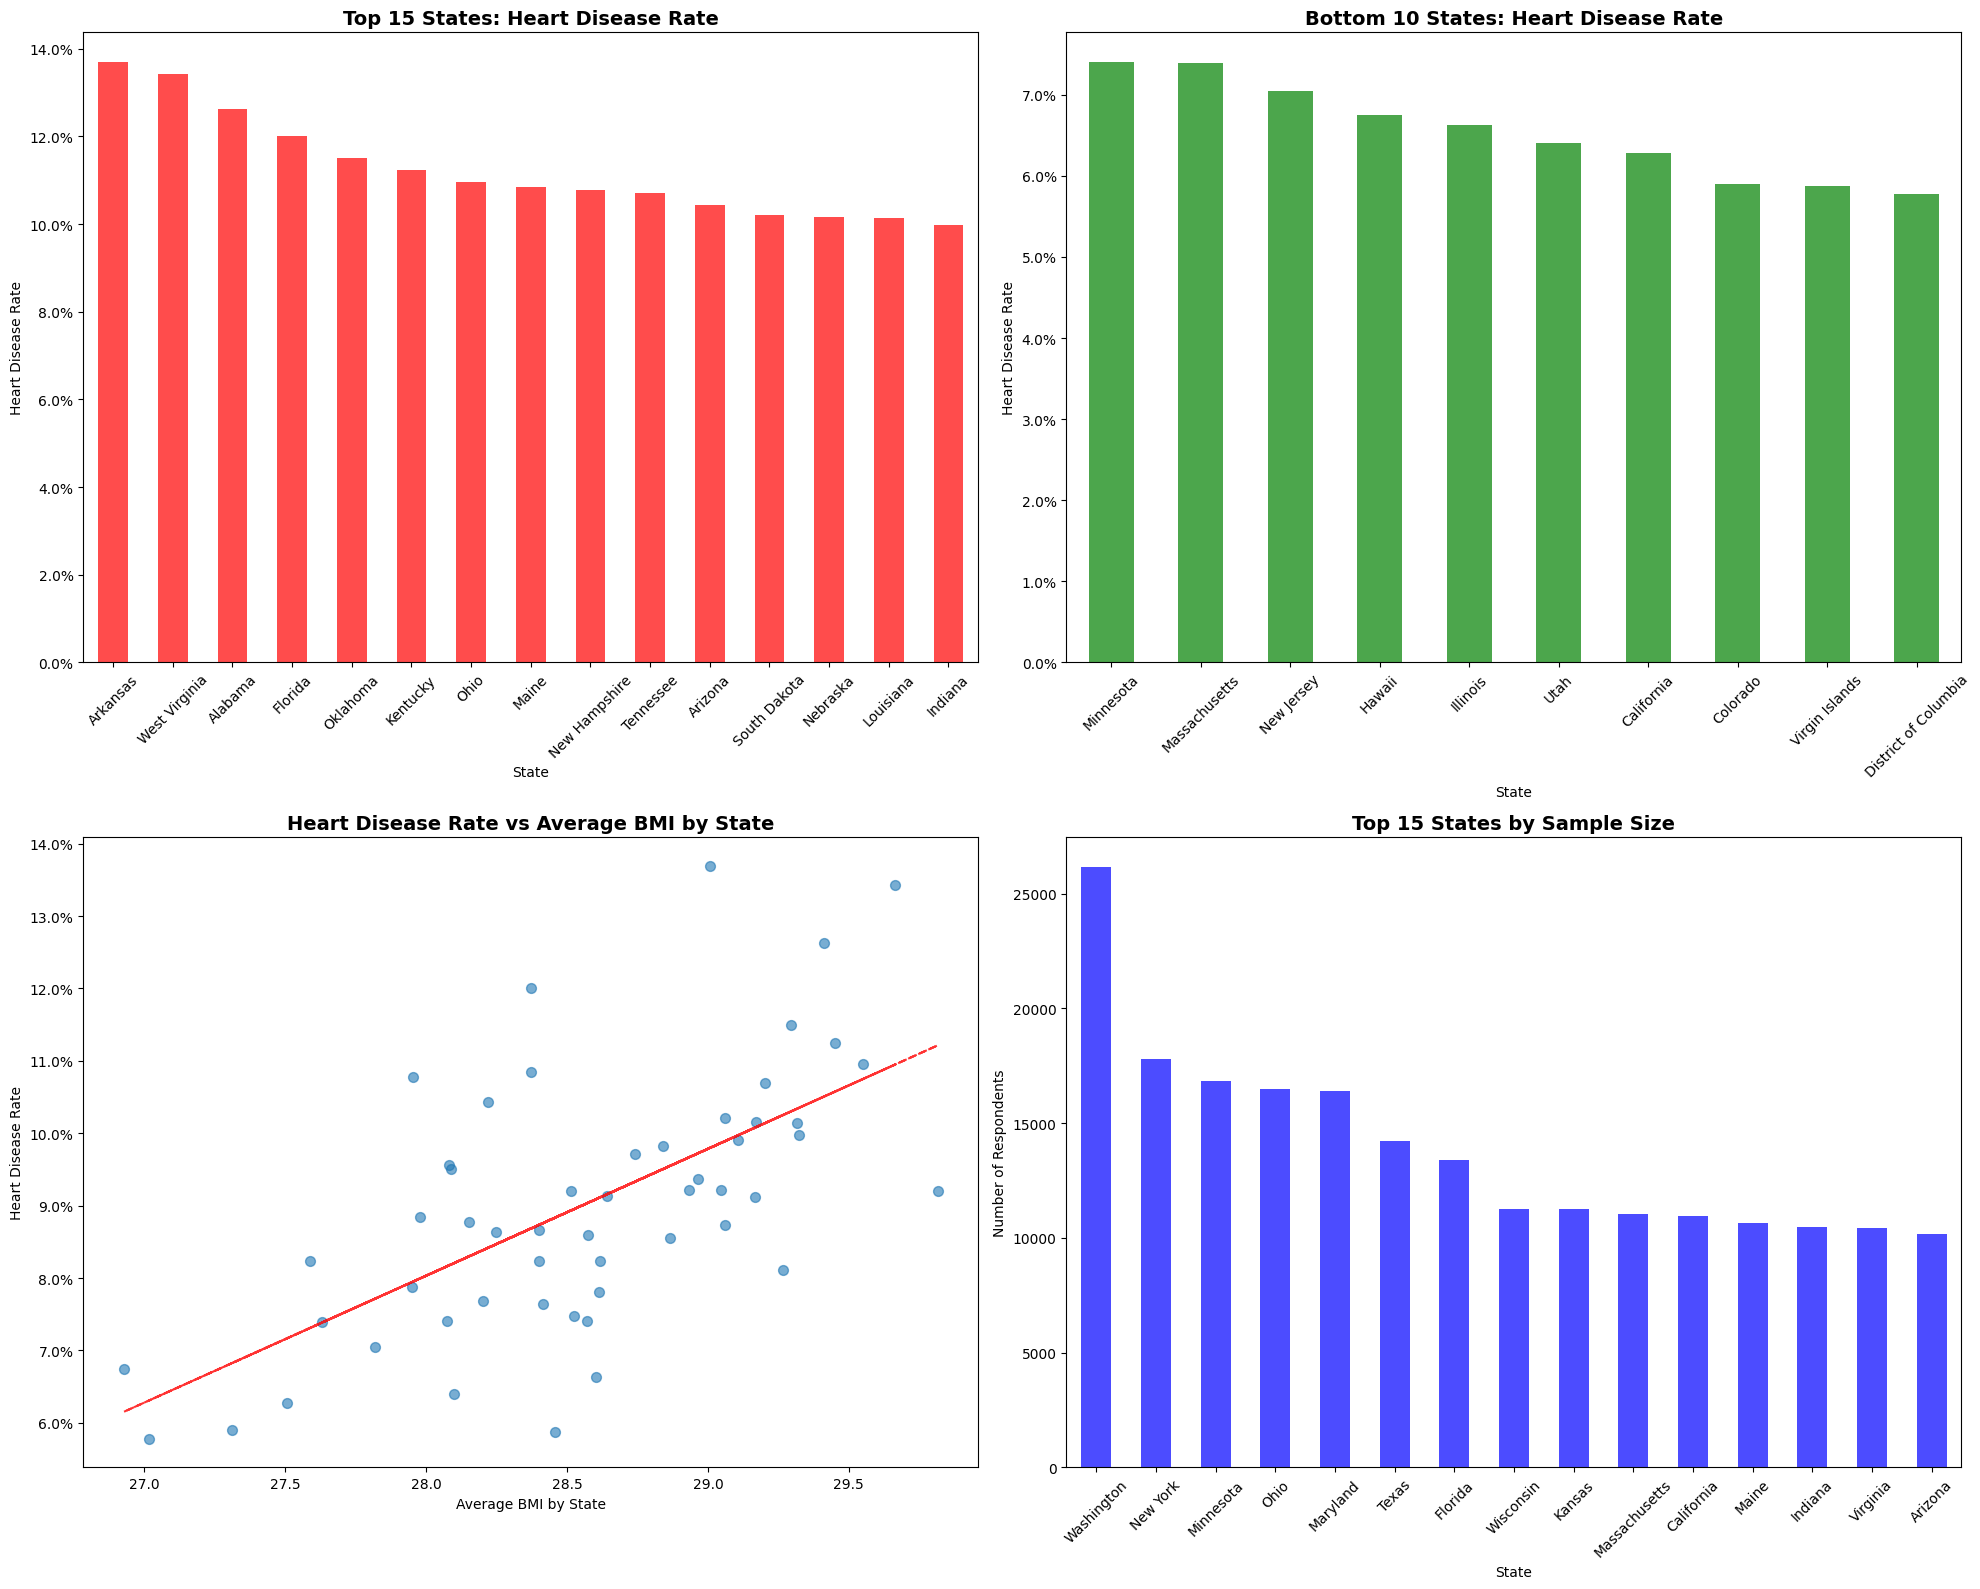


Correlation between Average State BMI and Heart Disease Rate: 0.635
National Heart Disease Rate: 8.93%
National Average BMI: 28.5


In [25]:
# Calculate heart disease rates by state
state_analysis = df.groupby('State').agg({
    'HasHeartDisease': ['count', 'sum', 'mean'],
    'BMI': 'mean'
}).round(4)

# Flatten column names
state_analysis.columns = ['Total_Respondents', 'Heart_Disease_Cases', 'Heart_Disease_Rate', 'Avg_BMI']

# Sort by heart disease rate
state_analysis = state_analysis.sort_values('Heart_Disease_Rate', ascending=False)

print("Top 15 States with Highest Heart Disease Rates:")
print("=" * 60)
top_15_states = state_analysis.head(15)
for idx, (state, row) in enumerate(top_15_states.iterrows(), 1):
    print(f"{idx:2d}. {state:20s} - {row['Heart_Disease_Rate']:.2%} ({row['Heart_Disease_Cases']:,} cases, Avg BMI: {row['Avg_BMI']:.1f})")

print(f"\nBottom 10 States with Lowest Heart Disease Rates:")
print("=" * 60)
bottom_10_states = state_analysis.tail(10)
for idx, (state, row) in enumerate(bottom_10_states.iterrows(), 1):
    print(f"{idx:2d}. {state:20s} - {row['Heart_Disease_Rate']:.2%} ({row['Heart_Disease_Cases']:,} cases, Avg BMI: {row['Avg_BMI']:.1f})")


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Top 15 states by heart disease rate 
top_15_states['Heart_Disease_Rate'].plot(kind='bar', ax=ax1, color='red', alpha=0.7)
ax1.set_title('Top 15 States: Heart Disease Rate', fontsize=14, fontweight='bold')
ax1.set_ylabel('Heart Disease Rate')
ax1.set_xlabel('State')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Bottom 10 states by heart disease rate 
bottom_10_states['Heart_Disease_Rate'].plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Bottom 10 States: Heart Disease Rate', fontsize=14, fontweight='bold')
ax2.set_ylabel('Heart Disease Rate')
ax2.set_xlabel('State')
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Heart Disease Rate vs Average BMI by State 
valid_data = state_analysis.dropna(subset=['Avg_BMI'])
ax3.scatter(valid_data['Avg_BMI'], valid_data['Heart_Disease_Rate'], alpha=0.6, s=50)
ax3.set_xlabel('Average BMI by State')
ax3.set_ylabel('Heart Disease Rate')
ax3.set_title('Heart Disease Rate vs Average BMI by State', fontsize=14, fontweight='bold')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Add trend line
z = np.polyfit(valid_data['Avg_BMI'], valid_data['Heart_Disease_Rate'], 1)
p = np.poly1d(z)
ax3.plot(valid_data['Avg_BMI'], p(valid_data['Avg_BMI']), "r--", alpha=0.8)

# Sample size by state (top 15) 
top_15_by_sample = state_analysis.sort_values('Total_Respondents', ascending=False).head(15)
top_15_by_sample['Total_Respondents'].plot(kind='bar', ax=ax4, color='blue', alpha=0.7)
ax4.set_title('Top 15 States by Sample Size', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Respondents')
ax4.set_xlabel('State')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation between BMI and heart disease rate
correlation = np.corrcoef(state_analysis['Avg_BMI'].dropna(), 
                         state_analysis['Heart_Disease_Rate'][state_analysis['Avg_BMI'].notna()])[0,1]
print(f"\nCorrelation between Average State BMI and Heart Disease Rate: {correlation:.3f}")

# National average
national_rate = df['HasHeartDisease'].mean()
national_bmi = df['BMI'].mean()
print(f"National Heart Disease Rate: {national_rate:.2%}")
print(f"National Average BMI: {national_bmi:.1f}")

## 2. Heart Disease by Sex

Heart Disease by Sex:
Female: 7.05% (16,614.0 cases, Avg BMI: 28.5)
Male: 11.06% (23,137.0 cases, Avg BMI: 28.6)

Heart Disease Rates by Sex in Top 10 States (Highest Heart Disease):
Arkansas        - Male: 16.34%, Female: 11.47%
West Virginia   - Male: 16.45%, Female: 11.16%
Alabama         - Male: 15.26%, Female: 10.82%
Florida         - Male: 14.89%, Female: 9.61%
Oklahoma        - Male: 13.37%, Female: 9.96%
Kentucky        - Male: 12.29%, Female: 10.30%
Ohio            - Male: 13.30%, Female: 8.89%
Maine           - Male: 14.02%, Female: 8.24%
New Hampshire   - Male: 14.56%, Female: 7.80%
Tennessee       - Male: 12.77%, Female: 8.79%


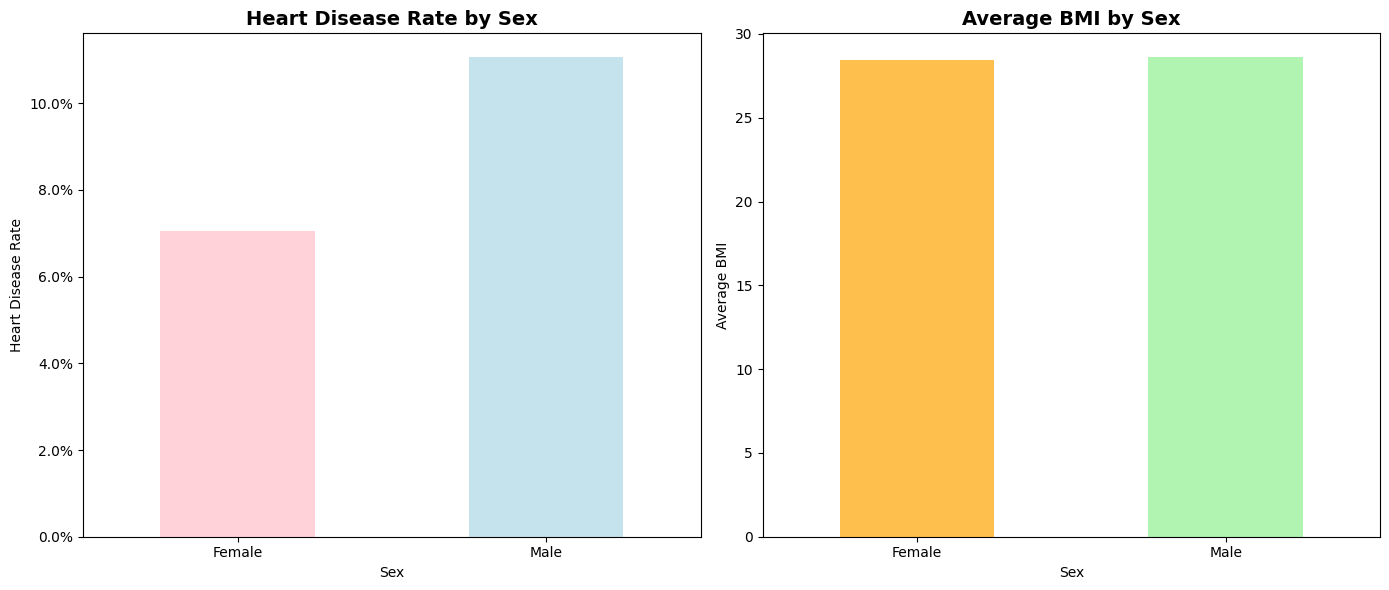

In [26]:
sex_analysis = df.groupby('Sex').agg({
    'HasHeartDisease': ['count', 'sum', 'mean'],
    'BMI': 'mean'
}).round(4)

sex_analysis.columns = ['Total_Respondents', 'Heart_Disease_Cases', 'Heart_Disease_Rate', 'Avg_BMI']

print("Heart Disease by Sex:")
print("=" * 40)
for sex, row in sex_analysis.iterrows():
    print(f"{sex}: {row['Heart_Disease_Rate']:.2%} ({row['Heart_Disease_Cases']:,} cases, Avg BMI: {row['Avg_BMI']:.1f})")

# Heart Disease by Sex and State (Top 10 states)
top_states = state_analysis.head(10).index
sex_state_analysis = df[df['State'].isin(top_states)].groupby(['State', 'Sex'])['HasHeartDisease'].agg(['count', 'mean']).unstack(fill_value=0)

print(f"\nHeart Disease Rates by Sex in Top 10 States (Highest Heart Disease):")
print("=" * 70)
for state in top_states:
    if state in sex_state_analysis.index:
        male_rate = sex_state_analysis.loc[state, ('mean', 'Male')] if ('mean', 'Male') in sex_state_analysis.columns else 0
        female_rate = sex_state_analysis.loc[state, ('mean', 'Female')] if ('mean', 'Female') in sex_state_analysis.columns else 0
        print(f"{state:15s} - Male: {male_rate:.2%}, Female: {female_rate:.2%}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Heart disease by sex
sex_analysis['Heart_Disease_Rate'].plot(kind='bar', ax=ax1, color=['pink', 'lightblue'], alpha=0.7)
ax1.set_title('Heart Disease Rate by Sex', fontsize=14, fontweight='bold')
ax1.set_ylabel('Heart Disease Rate')
ax1.set_xlabel('Sex')
ax1.tick_params(axis='x', rotation=0)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# BMI by sex
sex_analysis['Avg_BMI'].plot(kind='bar', ax=ax2, color=['orange', 'lightgreen'], alpha=0.7)
ax2.set_title('Average BMI by Sex', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average BMI')
ax2.set_xlabel('Sex')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 3. Heart Disease by Age Categories

Heart Disease by Age Categories:
Age 18 to 24   : 0.75% (201.0 cases, Avg BMI: 26.0)
Age 25 to 29   : 0.96% (212.0 cases, Avg BMI: 27.8)
Age 30 to 34   : 1.21% (312.0 cases, Avg BMI: 28.7)
Age 35 to 39   : 1.64% (469.0 cases, Avg BMI: 29.1)
Age 40 to 44   : 2.35% (704.0 cases, Avg BMI: 29.5)
Age 45 to 49   : 3.74% (1,066.0 cases, Avg BMI: 29.7)
Age 50 to 54   : 5.41% (1,820.0 cases, Avg BMI: 29.8)
Age 55 to 59   : 7.85% (2,888.0 cases, Avg BMI: 29.6)
Age 60 to 64   : 9.90% (4,405.0 cases, Avg BMI: 29.1)
Age 65 to 69   : 12.44% (5,856.0 cases, Avg BMI: 28.8)
Age 70 to 74   : 15.66% (6,808.0 cases, Avg BMI: 28.4)
Age 75 to 79   : 19.10% (6,208.0 cases, Avg BMI: 27.8)
Age 80 or older: 22.67% (8,217.0 cases, Avg BMI: 26.4)


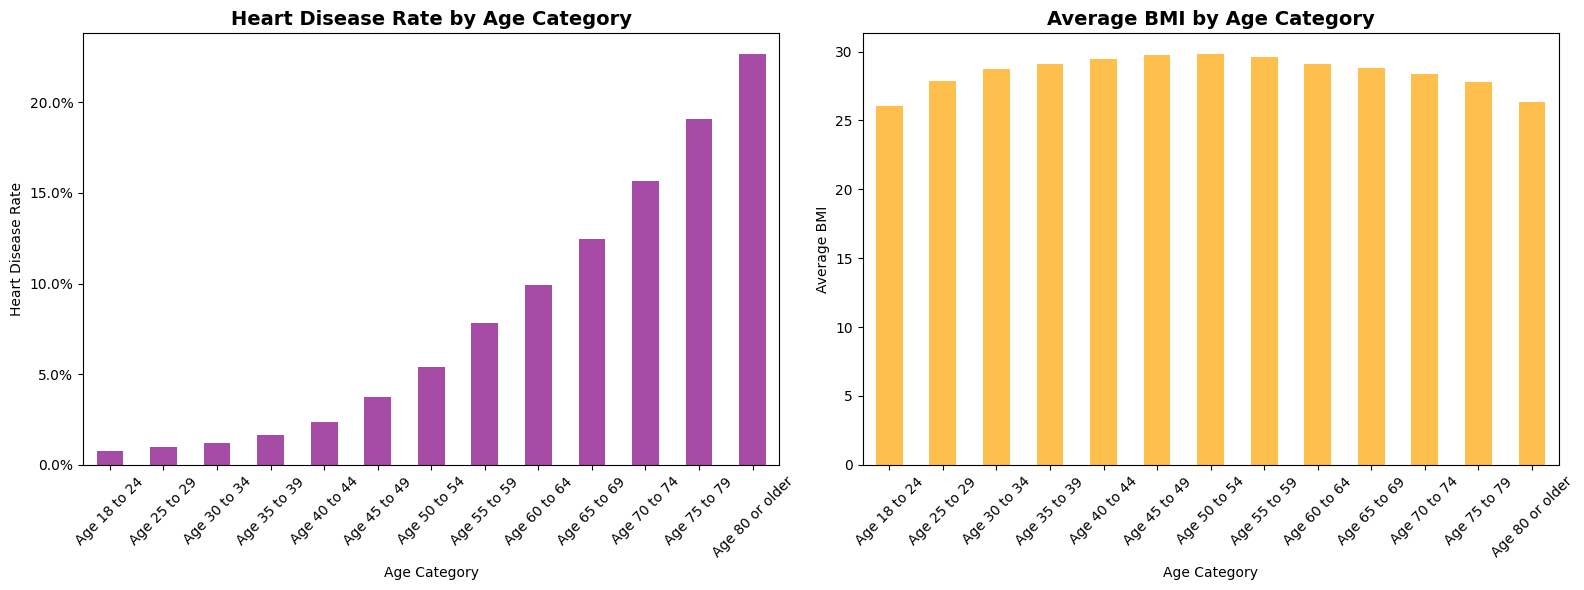


Key Insights - Age Analysis:
- Youngest group (18-24): 0.75%
- Oldest group (80+): 22.67%
- Risk increases by age: 30.2x higher in 80+ vs 18-24


In [27]:
# Analysis by Age Categories
age_analysis = df.dropna(subset=['AgeCategory']).groupby('AgeCategory').agg({
    'HasHeartDisease': ['count', 'sum', 'mean'],
    'BMI': 'mean'
}).round(4)

age_analysis.columns = ['Total_Respondents', 'Heart_Disease_Cases', 'Heart_Disease_Rate', 'Avg_BMI']

print("Heart Disease by Age Categories:")
print("=" * 50)
for age, row in age_analysis.iterrows():
    print(f"{age:15s}: {row['Heart_Disease_Rate']:.2%} ({row['Heart_Disease_Cases']:,} cases, Avg BMI: {row['Avg_BMI']:.1f})")

# Visualization using actual age categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heart disease rate by age
age_analysis['Heart_Disease_Rate'].plot(kind='bar', ax=ax1, color='purple', alpha=0.7)
ax1.set_title('Heart Disease Rate by Age Category', fontsize=14, fontweight='bold')
ax1.set_ylabel('Heart Disease Rate')
ax1.set_xlabel('Age Category')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# BMI by age
age_analysis['Avg_BMI'].plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_title('Average BMI by Age Category', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average BMI')
ax2.set_xlabel('Age Category')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nKey Insights - Age Analysis:")
print(f"- Youngest group (18-24): {age_analysis.iloc[0]['Heart_Disease_Rate']:.2%}")
print(f"- Oldest group (80+): {age_analysis.iloc[-1]['Heart_Disease_Rate']:.2%}")
print(f"- Risk increases by age: {(age_analysis.iloc[-1]['Heart_Disease_Rate'] / age_analysis.iloc[0]['Heart_Disease_Rate']):.1f}x higher in 80+ vs 18-24")

## 4. Heart Disease by Physical Activities

Heart Disease by Physical Activities:
No             : 13.91% (14,813.0 cases, Avg BMI: 30.3)
Yes            : 7.35% (24,801.0 cases, Avg BMI: 28.0)

Risk Reduction from Physical Activity: 47.2%
Relative Risk: 1.89x higher without physical activity


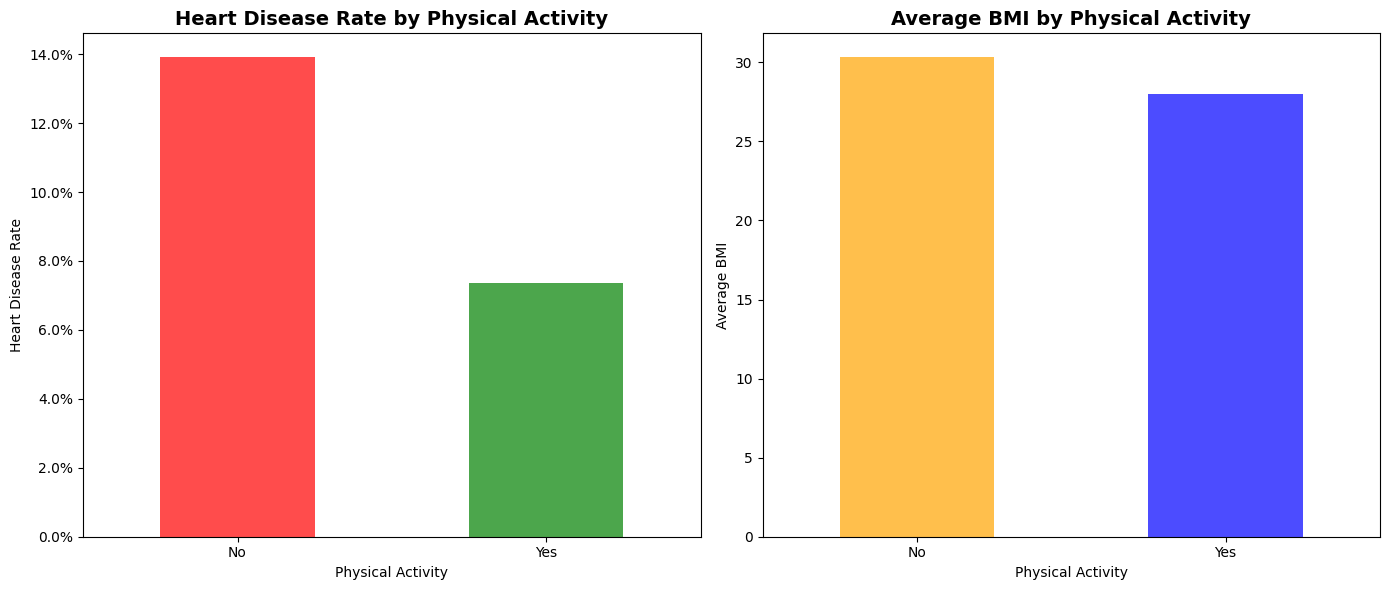

In [28]:
# Analysis by Physical Activities
activity_analysis = df.dropna(subset=['PhysicalActivities']).groupby('PhysicalActivities').agg({
    'HasHeartDisease': ['count', 'sum', 'mean'],
    'BMI': 'mean'
}).round(4)

activity_analysis.columns = ['Total_Respondents', 'Heart_Disease_Cases', 'Heart_Disease_Rate', 'Avg_BMI']

print("Heart Disease by Physical Activities:")
print("=" * 50)
for activity, row in activity_analysis.iterrows():
    print(f"{activity:15s}: {row['Heart_Disease_Rate']:.2%} ({row['Heart_Disease_Cases']:,} cases, Avg BMI: {row['Avg_BMI']:.1f})")

# Calculate risk reduction
no_activity_rate = activity_analysis.loc['No', 'Heart_Disease_Rate']
yes_activity_rate = activity_analysis.loc['Yes', 'Heart_Disease_Rate']
risk_reduction = ((no_activity_rate - yes_activity_rate) / no_activity_rate) * 100

print(f"\nRisk Reduction from Physical Activity: {risk_reduction:.1f}%")
print(f"Relative Risk: {no_activity_rate/yes_activity_rate:.2f}x higher without physical activity")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Heart disease by activity
activity_analysis['Heart_Disease_Rate'].plot(kind='bar', ax=ax1, color=['red', 'green'], alpha=0.7)
ax1.set_title('Heart Disease Rate by Physical Activity', fontsize=14, fontweight='bold')
ax1.set_ylabel('Heart Disease Rate')
ax1.set_xlabel('Physical Activity')
ax1.tick_params(axis='x', rotation=0)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# BMI by activity
activity_analysis['Avg_BMI'].plot(kind='bar', ax=ax2, color=['orange', 'blue'], alpha=0.7)
ax2.set_title('Average BMI by Physical Activity', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average BMI')
ax2.set_xlabel('Physical Activity')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 5. Comprehensive State Analysis: BMI, Physical Activity, and Heart Disease

Top 10 States - Heart Disease Rate, BMI, and Exercise Patterns:
State                HD Rate  Avg BMI  Exercise % HD Rank  BMI Rank  Ex Rank 
Arkansas             13.7%    29.0      66.5%       1        17         2
West Virginia        13.4%    29.7      67.1%       2        2         3
Alabama              12.6%    29.4      69.0%       3        5         5
Florida              12.0%    28.4      73.4%       4        35         19
Oklahoma             11.5%    29.3      69.2%       5        8         6
Kentucky             11.2%    29.5      71.6%       6        4         10
Ohio                 11.0%    29.5      72.8%       7        3         15
Maine                10.8%    28.4      76.5%       8        36         33
New Hampshire        10.8%    28.0      78.5%       9        46         44
Tennessee            10.7%    29.2      70.8%       10        10         8

Bottom 10 States - Heart Disease Rate, BMI, and Exercise Patterns:
State                HD Rate  Avg BMI  Exercise %

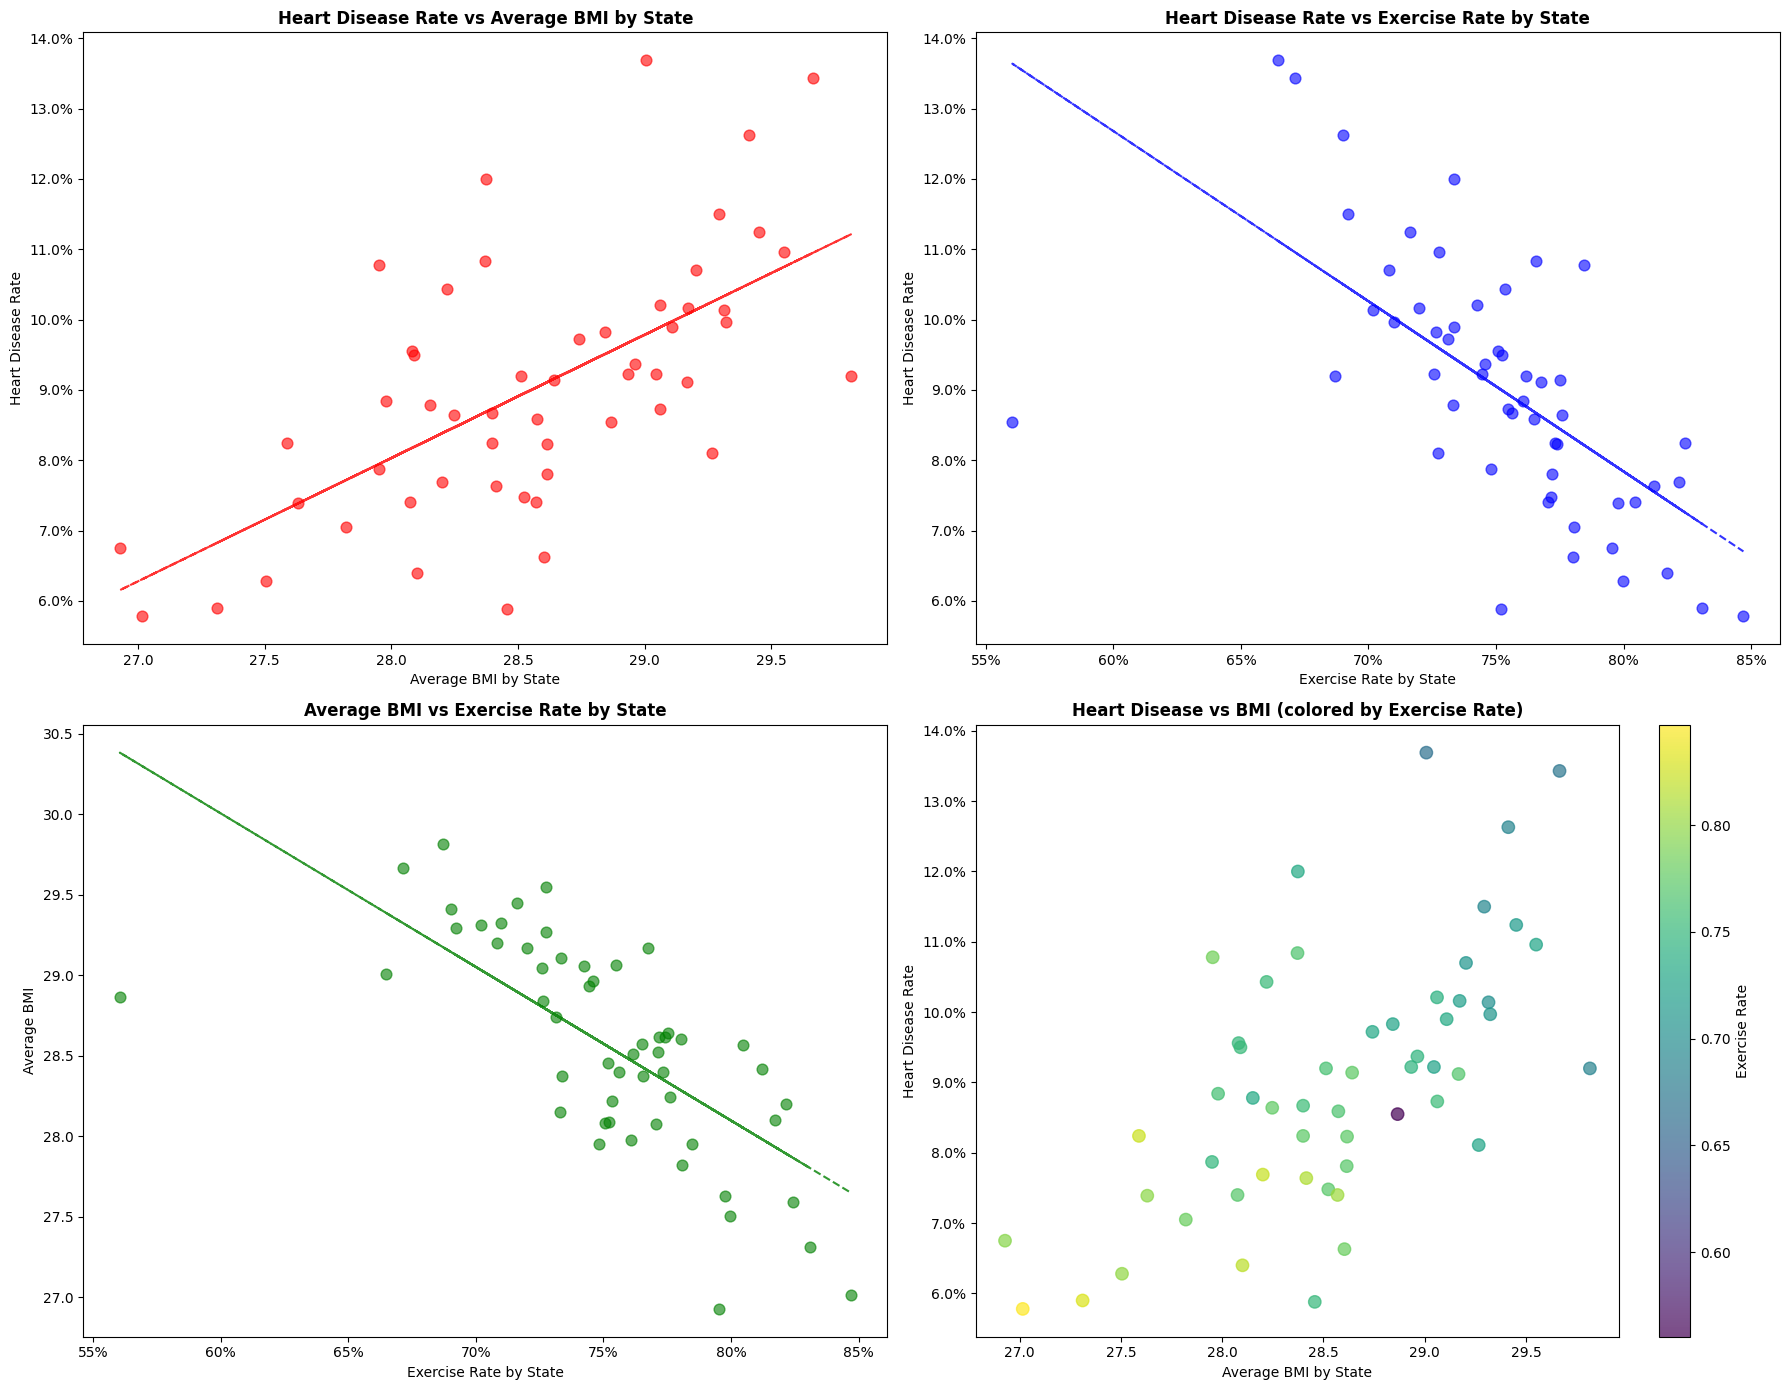

In [29]:
# Comprehensive state analysis including physical activity
state_detailed = df.groupby('State').agg({
    'HasHeartDisease': 'mean',
    'BMI': 'mean',
    'PhysicalActivities': lambda x: (x == 'Yes').mean()  # % who exercise
}).round(4)

state_detailed.columns = ['Heart_Disease_Rate', 'Avg_BMI', 'Exercise_Rate']

# Rankings
state_detailed['HD_Rank'] = state_detailed['Heart_Disease_Rate'].rank(ascending=False)
state_detailed['BMI_Rank'] = state_detailed['Avg_BMI'].rank(ascending=False) 
state_detailed['Exercise_Rank'] = state_detailed['Exercise_Rate'].rank(ascending=True)  # Lower exercise = higher rank

# Sort by heart disease rate
state_detailed = state_detailed.sort_values('Heart_Disease_Rate', ascending=False)

print("Top 10 States - Heart Disease Rate, BMI, and Exercise Patterns:")
print("=" * 80)
print(f"{'State':<20} {'HD Rate':<8} {'Avg BMI':<8} {'Exercise %':<10} {'HD Rank':<8} {'BMI Rank':<9} {'Ex Rank':<8}")
print("=" * 80)

top_10 = state_detailed.head(10)
for state, row in top_10.iterrows():
    print(f"{state:<20} {row['Heart_Disease_Rate']:.1%}    {row['Avg_BMI']:.1f}      {row['Exercise_Rate']:.1%}       {row['HD_Rank']:.0f}        {row['BMI_Rank']:.0f}         {row['Exercise_Rank']:.0f}")

print(f"\nBottom 10 States - Heart Disease Rate, BMI, and Exercise Patterns:")
print("=" * 80)
print(f"{'State':<20} {'HD Rate':<8} {'Avg BMI':<8} {'Exercise %':<10} {'HD Rank':<8} {'BMI Rank':<9} {'Ex Rank':<8}")
print("=" * 80)

bottom_10 = state_detailed.tail(10)
for state, row in bottom_10.iterrows():
    print(f"{state:<20} {row['Heart_Disease_Rate']:.1%}    {row['Avg_BMI']:.1f}      {row['Exercise_Rate']:.1%}       {row['HD_Rank']:.0f}        {row['BMI_Rank']:.0f}         {row['Exercise_Rank']:.0f}")

# Correlation analysis
correlations = state_detailed[['Heart_Disease_Rate', 'Avg_BMI', 'Exercise_Rate']].corr()
print(f"\nCorrelation Matrix:")
print("=" * 50)
print(f"Heart Disease vs BMI: {correlations.loc['Heart_Disease_Rate', 'Avg_BMI']:.3f}")
print(f"Heart Disease vs Exercise: {correlations.loc['Heart_Disease_Rate', 'Exercise_Rate']:.3f}")
print(f"BMI vs Exercise: {correlations.loc['Avg_BMI', 'Exercise_Rate']:.3f}")

# Comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Heart Disease Rate vs BMI
ax1.scatter(state_detailed['Avg_BMI'], state_detailed['Heart_Disease_Rate'], alpha=0.6, s=60, color='red')
ax1.set_xlabel('Average BMI by State')
ax1.set_ylabel('Heart Disease Rate')
ax1.set_title('Heart Disease Rate vs Average BMI by State', fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Trend line
z1 = np.polyfit(state_detailed['Avg_BMI'], state_detailed['Heart_Disease_Rate'], 1)
p1 = np.poly1d(z1)
ax1.plot(state_detailed['Avg_BMI'], p1(state_detailed['Avg_BMI']), "r--", alpha=0.8)

# 2. Heart Disease Rate vs Exercise Rate  
ax2.scatter(state_detailed['Exercise_Rate'], state_detailed['Heart_Disease_Rate'], alpha=0.6, s=60, color='blue')
ax2.set_xlabel('Exercise Rate by State')
ax2.set_ylabel('Heart Disease Rate')
ax2.set_title('Heart Disease Rate vs Exercise Rate by State', fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Trend line
z2 = np.polyfit(state_detailed['Exercise_Rate'], state_detailed['Heart_Disease_Rate'], 1)
p2 = np.poly1d(z2)
ax2.plot(state_detailed['Exercise_Rate'], p2(state_detailed['Exercise_Rate']), "b--", alpha=0.8)

# 3. BMI vs Exercise Rate
ax3.scatter(state_detailed['Exercise_Rate'], state_detailed['Avg_BMI'], alpha=0.6, s=60, color='green')
ax3.set_xlabel('Exercise Rate by State')
ax3.set_ylabel('Average BMI')
ax3.set_title('Average BMI vs Exercise Rate by State', fontweight='bold')
ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Trend line
z3 = np.polyfit(state_detailed['Exercise_Rate'], state_detailed['Avg_BMI'], 1)
p3 = np.poly1d(z3)
ax3.plot(state_detailed['Exercise_Rate'], p3(state_detailed['Exercise_Rate']), "g--", alpha=0.8)

# 4. 3D-style view: Heart Disease Rate with BMI and Exercise
scatter = ax4.scatter(state_detailed['Avg_BMI'], state_detailed['Heart_Disease_Rate'], 
                     c=state_detailed['Exercise_Rate'], s=80, alpha=0.7, cmap='viridis')
ax4.set_xlabel('Average BMI by State')
ax4.set_ylabel('Heart Disease Rate')
ax4.set_title('Heart Disease vs BMI (colored by Exercise Rate)', fontweight='bold')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.colorbar(scatter, ax=ax4, label='Exercise Rate')

plt.tight_layout()
plt.show()

## 📋 Key Findings Summary

### 🏆 **States with Highest Heart Disease Rates:**
1. **Arkansas** (13.7%) - High BMI (29.0), Low exercise (66.5%)
2. **West Virginia** (13.4%) - Highest BMI (29.7), Low exercise (67.1%) 
3. **Alabama** (12.6%) - High BMI (29.4), Low exercise (69.0%)

### 🌟 **States with Lowest Heart Disease Rates:**
1. **District of Columbia** (5.8%) - Low BMI (27.0), Highest exercise (84.7%)
2. **Colorado** (5.9%) - Low BMI (27.3), High exercise (83.1%)
3. **California** (6.3%) - Low BMI (27.5), High exercise (80.0%)

### 📊 **Key Statistical Insights:**

**By Demographics:**
- **Males** have 57% higher heart disease risk than females (11.06% vs 7.05%)
- **Age** is the strongest predictor: 30.2x higher risk in 80+ vs 18-24 age groups
- Heart disease rate increases from 0.75% (18-24) to 22.67% (80+)

**By Lifestyle:**
- **Physical Activity** reduces heart disease risk by 47.2%
- People without exercise have 1.89x higher risk (13.91% vs 7.35%)
- Active people have lower average BMI (28.0 vs 30.3)

**By State Patterns:**
- **Strong correlations found:**
  - Heart Disease ↔ BMI: **r = 0.635** (higher BMI = more heart disease)
  - Heart Disease ↔ Exercise: **r = -0.642** (more exercise = less heart disease)  
  - BMI ↔ Exercise: **r = -0.698** (more exercise = lower BMI)

### 🎯 **Answer to Your Questions:**

1. **Which states have highest heart disease?** Arkansas, West Virginia, Alabama
2. **By sex?** Males have significantly higher rates in all states
3. **By age?** Exponential increase with age - biggest risk factor
4. **By activities?** Physical activity reduces risk by nearly half
5. **BMI relationship?** YES - states with higher average BMI consistently show higher heart disease rates

**The data clearly shows that states with high BMI tend to have higher heart disease rates, and this relationship is strongly mediated by physical activity levels.**